# Projeto análise de dados: Pipeline de dados de Bot de Telegram

In [ ]:
display(Image(url='https://thumbnails.production.thenounproject.com/haHB8D_nxspSn6GHZABmLsbOCdI=/fit-in/1000x1000/photos.production.thenounproject.com/photos/business_people_gathering_in_hallway_of_an_office-scopio-1a51b29c-c974-4c6b-90cd-_QLD6j3f.jpg',width=1000))


## Introdução

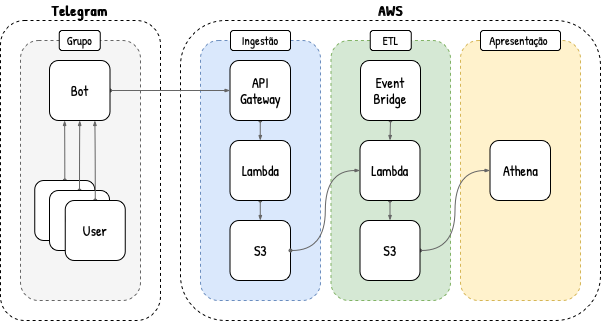

Nesse Projeto será construído um bot do Telegram com dados de Recursos Humanos, trazendo informações a respeito dos funcionários do dataset conforme a categoria escolhida, como veremos logo a seguir. Isso permite que usuários do grupo de RH do Telegram obtenham facilmente informações via bot, tirando a dependência direta do pessoal de dados, aliviando assim, a carga operacional e agilizando processos internos. Além disso, será feito um pipeline de dados com as conversas do Telegram, envolvendo etapas de ingestão de dados, ETL e apresentação no ambiente da Amazon Web Service. E por fim trabalharemos com orientação a coluna em cima do dataset de RH com boas práticas de big data. Para fazer o*download* do dataset de RH: [link](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set)

**Atributos do dataset**:


* **Employee_Name**: Nome do funcionário.
* **EmpID**: Identificação única do funcionário.
* **MarriedID**: Indica se o funcionário é casado (1) ou não (0).
* **MaritalStatusID**: Identificação do estado civil do funcionário.
* **GenderID**: Identificação do gênero do funcionário.
* **EmpStatusID**: Identificação do status do emprego do funcionário.
* **DeptID**: Identificação do departamento em que o funcionário trabalha.
* **PerfScoreID**: Identificação do nível de desempenho do funcionário.
* **FromDiversityJobFairID**: Indica se o funcionário participou de uma feira de empregos para diversidade (1) ou não (0).
* **Salary**: Salário do funcionário.
* **Termd**: Indica se o funcionário foi encerrado (1) ou não (0).
* **PositionID**: Identificação do cargo do funcionário.
* **Position**: Cargo do funcionário.
* **State**: Estado em que o funcionário está localizado.
* **Zip**: Código postal do funcionário.
* **DOB**: Data de nascimento do funcionário.
* **Sex**: Sexo do funcionário.
* **MaritalDesc**: Descrição do estado civil do funcionário.
* **CitizenDesc**: Descrição da cidadania do funcionário.
* **HispanicLatino**: Indica se o funcionário é hispânico/latino (Sim ou Não).
* **RaceDesc**: Descrição da raça do funcionário.
* **DateofHire**: Data de contratação do funcionário.
* **DateofTermination**: Data de término do emprego do funcionário (NaN se ainda estiver empregado).
* **TermReason**: Razão para o término do emprego do funcionário.
* **EmploymentStatus**: Status atual de emprego do funcionário.
* **Department**: Departamento em que o funcionário trabalha.
* **ManagerName**: Nome do gerente do funcionário.
* **ManagerID**: Identificação única do gerente do funcionário.
* **RecruitmentSource**: Fonte de recrutamento do funcionário.
* **PerformanceScore**: Pontuação de desempenho do funcionário.
* **EngagementSurvey**: Resultado da pesquisa de engajamento do funcionário.
* **EmpSatisfaction**: Nível de satisfação do funcionário.
* **SpecialProjectsCount**: Contagem de projetos especiais atribuídos ao funcionário.
* **LastPerformanceReview_Date**: Data da última avaliação de desempenho do funcionário.
* **DaysLateLast30**: Número de dias em atraso nos últimos 30 dias.
* **Absences**: Número de faltas do funcionário.


## Pré-Processamento

In [ ]:
! pip install pytelegrambotapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pytelegrambotapi: filename=pyTelegramBotAPI-4.14.0-py3-none-any.whl size=215252 sha256=1f3b1ad96a478c34745d12ff292cef4e1ac28641e8a05091a5385513e16a2121
  Stored in directory: /root/.cache/pip/wheels/25/51/2d/24b40a366c85c37928d5aa36ddf257e5a79fad25e1ecd11b2c
Successfully built pytelegrambotapi


Importando as bibliotecas:

In [ ]:
import telebot
import pandas as pd
from datetime import datetime
import json
import requests
from IPython.display import Image, display

Carregando os dados:

In [ ]:
HR = pd.read_csv('HRDataset_v14 (1).csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
HR.head(5)

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  \
0            1       5            4                       0   62506      0   
1            5       3            3                       0  104437      1   
2            5       5            3                       0   64955      1   
3            1       5            3                       0   64991      0   
4            5       5            3                       0   50825      1   

   PositionID                  Position State   Zip       DOB Sex MaritalDesc  \
0          19   Production Technician I    MA  1960  07/10/83  M       Single   
1          27                   Sr. DBA    MA  2148  05/05/75  M      Married   
2          20  Production Technician II    MA  1810  09/19/88   F     Married   
3          19   Production Technician I    MA  1886  09/27/88   F     Married   
4          19   Production Technician I    MA  2169  09/08/89   F    Divorced   

  CitizenDesc HispanicLatino RaceDesc DateofHire DateofTermination  \
0  US Citizen             No    White   7/5/2011               NaN   
1  US Citizen             No    White  3/30/2015         6/16/2016   
2  US Citizen             No    White   7/5/2011         9/24/2012   
3  US Citizen             No    White   1/7/2008               NaN   
4  US Citizen             No    White  7/11/2011          9/6/2016   

          TermReason        EmploymentStatus         Department  \
0  N/A-StillEmployed                  Active  Production          
1      career change  Voluntarily Terminated              IT/IS   
2              hours  Voluntarily Terminated  Production          
3  N/A-StillEmployed                  Active  Production          
4   return to school  Voluntarily Terminated  Production          

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert       22.0          LinkedIn          Exceeds   
1      Simon Roup        4.0            Indeed      Fully Meets   
2  Kissy Sullivan       20.0          LinkedIn      Fully Meets   
3    Elijiah Gray       16.0            Indeed      Fully Meets   
4  Webster Butler       39.0     Google Search      Fully Meets   

   EngagementSurvey  EmpSatisfaction  SpecialProjectsCount  \
0              4.60                5                     0   
1              4.96                3                     6   
2              3.02                3                     0   
3              4.84                5                     0   
4              5.00                4                     0   

  LastPerformanceReview_Date  DaysLateLast30  Absences  
0                  1/17/2019               0         1  
1                  2/24/2016               0        17  
2                  5/15/2012               0         3  
3                   1/3/2019               0        15  
4                   2/1/2016               0         2

Verificando se há valores nulos:

In [ ]:
valores_nulos = HR.isnull().values.any()

if valores_nulos:
  print("Há valores nulos na tabela.")
else:
  print("Não há valores nulos na tabela.")

Há valores nulos na tabela.


In [ ]:
valores_nulos = HR.isnull().sum()
print(valores_nulos)

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

Tratando os valores nulos:

In [ ]:
HR['DateofTermination'] = HR['DateofTermination'].fillna('1/11/2001')

In [ ]:
HR['ManagerID'] = HR['ManagerID'].fillna(0.0)

In [ ]:
valores_nulos = HR.isnull().values.any()

if valores_nulos:
  print("Há valores nulos na tabela.")
else:
  print("Não há valores nulos na tabela.")

Não há valores nulos na tabela.


Verificando a estrutura dos dados:

In [ ]:
HR.shape

(311, 36)

In [ ]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [ ]:
HR.describe(include='object')

Employee_Name                 Position State       DOB  Sex  \
count                   311                      311   311       311  311   
unique                  311                       32    28       307    2   
top     Adinolfi, Wilson  K  Production Technician I    MA  09/09/65    F   
freq                      1                      137   276         2  176   

       MaritalDesc CitizenDesc HispanicLatino RaceDesc DateofHire  \
count          311         311            311      311        311   
unique           5           3              4        6        101   
top         Single  US Citizen             No    White  1/10/2011   
freq           137         295            282      187         14   

       DateofTermination         TermReason EmploymentStatus  \
count                311                311              311   
unique                97                 18                3   
top            1/11/2001  N/A-StillEmployed           Active   
freq                 207                207              207   

               Department     ManagerName RecruitmentSource PerformanceScore  \
count                 311             311               311              311   
unique                  6              21                 9                4   
top     Production         Michael Albert            Indeed      Fully Meets   
freq                  209              22                87              243   

       LastPerformanceReview_Date  
count                         311  
unique                        137  
top                     1/14/2019  
freq                           18

In [ ]:
HR.describe(include='number')

EmpID   MarriedID  MaritalStatusID    GenderID  EmpStatusID  \
count    311.000000  311.000000       311.000000  311.000000   311.000000   
mean   10156.000000    0.398714         0.810289    0.434084     2.392283   
std       89.922189    0.490423         0.943239    0.496435     1.794383   
min    10001.000000    0.000000         0.000000    0.000000     1.000000   
25%    10078.500000    0.000000         0.000000    0.000000     1.000000   
50%    10156.000000    0.000000         1.000000    0.000000     1.000000   
75%    10233.500000    1.000000         1.000000    1.000000     5.000000   
max    10311.000000    1.000000         4.000000    1.000000     5.000000   

           DeptID  PerfScoreID  FromDiversityJobFairID         Salary  \
count  311.000000   311.000000              311.000000     311.000000   
mean     4.610932     2.977492                0.093248   69020.684887   
std      1.083487     0.587072                0.291248   25156.636930   
min      1.000000     1.000000                0.000000   45046.000000   
25%      5.000000     3.000000                0.000000   55501.500000   
50%      5.000000     3.000000                0.000000   62810.000000   
75%      5.000000     3.000000                0.000000   72036.000000   
max      6.000000     4.000000                1.000000  250000.000000   

            Termd  PositionID           Zip   ManagerID  EngagementSurvey  \
count  311.000000  311.000000    311.000000  311.000000        311.000000   
mean     0.334405   16.845659   6555.482315   14.196141          4.110000   
std      0.472542    6.223419  16908.396884    8.301386          0.789938   
min      0.000000    1.000000   1013.000000    0.000000          1.120000   
25%      0.000000   18.000000   1901.500000    9.500000          3.690000   
50%      0.000000   19.000000   2132.000000   14.000000          4.280000   
75%      1.000000   20.000000   2355.000000   19.000000          4.700000   
max      1.000000   30.000000  98052.000000   39.000000          5.000000   

       EmpSatisfaction  SpecialProjectsCount  DaysLateLast30    Absences  
count       311.000000            311.000000      311.000000  311.000000  
mean          3.890675              1.218650        0.414791   10.237942  
std           0.909241              2.349421        1.294519    5.852596  
min           1.000000              0.000000        0.000000    1.000000  
25%           3.000000              0.000000        0.000000    5.000000  
50%           4.000000              0.000000        0.000000   10.000000  
75%           5.000000              0.000000        0.000000   15.000000  
max           5.000000              8.000000        6.000000   20.000000

Tratando os valores da coluna "HispanicLatino":

In [ ]:
HR.HispanicLatino.value_counts()

No     282
Yes     27
no       1
yes      1
Name: HispanicLatino, dtype: int64

In [ ]:
HR['HispanicLatino'] = HR['HispanicLatino'].replace(['no','yes'], ['No', 'Yes'])

In [ ]:
HR.HispanicLatino.value_counts()

No     283
Yes     28
Name: HispanicLatino, dtype: int64

Convertendo as colunas de data para o formato datetime:



LastPerformanceReview_Date:



In [ ]:
HR['LastPerformanceReview_Date'] = HR['LastPerformanceReview_Date'].apply(lambda date: datetime.strptime(date.split(sep=' ')[0], '%m/%d/%Y').strftime('%Y-%m-%d'))

In [ ]:
HR['LastPerformanceReview_Date'] = pd.to_datetime(HR['LastPerformanceReview_Date'])

DateofHire:

In [ ]:
HR['DateofHire'] = HR['DateofHire'].apply(lambda date: datetime.strptime(date.split(sep=' ')[0], '%m/%d/%Y').strftime('%Y-%m-%d'))

In [ ]:
HR['DateofHire'] = pd.to_datetime(HR['DateofHire'])

DateofTermination	:

In [ ]:
HR['DateofTermination'] = HR['DateofTermination'].apply(lambda date: datetime.strptime(date.split(sep=' ')[0], '%m/%d/%Y').strftime('%Y-%m-%d'))

In [ ]:
HR['DateofTermination'] = pd.to_datetime(HR['DateofTermination'])

DOB	:

In [ ]:
HR['DOB'] = HR['DOB'].apply(lambda date: datetime.strptime(date.split(sep=' ')[0], '%m/%d/%y').strftime('%Y-%m-%d'))

In [ ]:
HR['DOB'] = pd.to_datetime(HR['DOB'])

Agora vamos verificar as conversões:

In [ ]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [ ]:
HR.head()

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  \
0            1       5            4                       0   62506      0   
1            5       3            3                       0  104437      1   
2            5       5            3                       0   64955      1   
3            1       5            3                       0   64991      0   
4            5       5            3                       0   50825      1   

   PositionID                  Position State   Zip        DOB Sex  \
0          19   Production Technician I    MA  1960 1983-07-10  M    
1          27                   Sr. DBA    MA  2148 1975-05-05  M    
2          20  Production Technician II    MA  1810 1988-09-19   F   
3          19   Production Technician I    MA  1886 1988-09-27   F   
4          19   Production Technician I    MA  2169 1989-09-08   F   

  MaritalDesc CitizenDesc HispanicLatino RaceDesc DateofHire  \
0      Single  US Citizen             No    White 2011-07-05   
1     Married  US Citizen             No    White 2015-03-30   
2     Married  US Citizen             No    White 2011-07-05   
3     Married  US Citizen             No    White 2008-01-07   
4    Divorced  US Citizen             No    White 2011-07-11   

  DateofTermination         TermReason        EmploymentStatus  \
0        2001-01-11  N/A-StillEmployed                  Active   
1        2016-06-16      career change  Voluntarily Terminated   
2        2012-09-24              hours  Voluntarily Terminated   
3        2001-01-11  N/A-StillEmployed                  Active   
4        2016-09-06   return to school  Voluntarily Terminated   

          Department     ManagerName  ManagerID RecruitmentSource  \
0  Production         Michael Albert       22.0          LinkedIn   
1              IT/IS      Simon Roup        4.0            Indeed   
2  Production         Kissy Sullivan       20.0          LinkedIn   
3  Production           Elijiah Gray       16.0            Indeed   
4  Production         Webster Butler       39.0     Google Search   

  PerformanceScore  EngagementSurvey  EmpSatisfaction  SpecialProjectsCount  \
0          Exceeds              4.60                5                     0   
1      Fully Meets              4.96                3                     6   
2      Fully Meets              3.02                3                     0   
3      Fully Meets              4.84                5                     0   
4      Fully Meets              5.00                4                     0   

  LastPerformanceReview_Date  DaysLateLast30  Absences  
0                 2019-01-17               0         1  
1                 2016-02-24               0        17  
2                 2012-05-15               0         3  
3                 2019-01-03               0        15  
4                 2016-02-01               0         2

## BOT do Telegram

Após a etapa de preparação dos dados, estamos prontos para desenvolver o chatbot do Telegram. Abrimos o chat com o botfather e definimos o nome e as configurações do bot e adicionamos ao grupo de RH em que ele fará interações com os usuários do grupo.

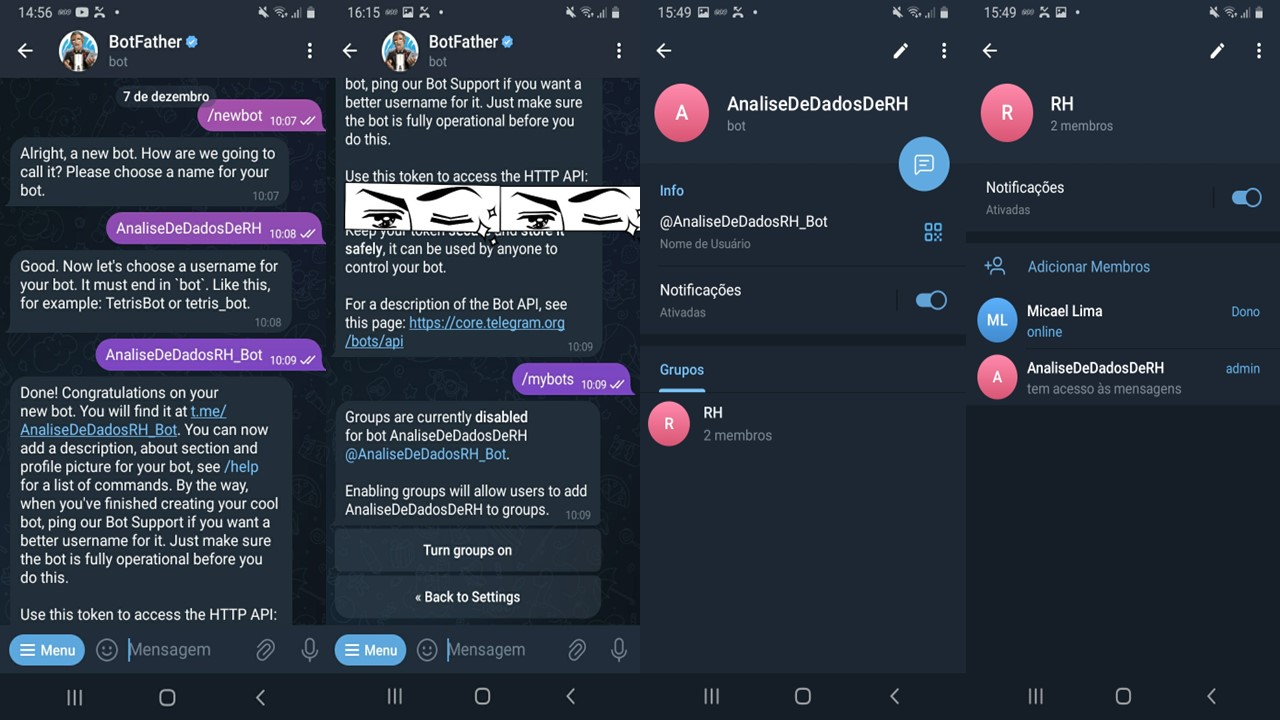

 * **DEFINIÇÃO DAS FUNÇÕES**:



Agora será definido o cálculo com funções que usaremos logo a seguir no bot para retornar análises sobre os dados de Recursos Humanos.

-> CÁLCULO DA SOMA DOS VALORES:

In [ ]:
def calcular_soma(dados, coluna):
    if coluna in dados.columns:
        resultado_soma = dados[coluna].sum()
        return resultado_soma
    else:
        return f"A coluna '{coluna}' não existe no DataFrame."


-> CÁLCULO DA MÉDIA DOS VALORES:

In [ ]:
def calcular_media(dados, coluna):
    if coluna in dados.columns:
       resultado_media = dados[coluna].mean()
       return resultado_media
    else:
       return f"A coluna '{coluna} não existe no Dataframe."

-> CÁLCULO DA DISTRIBUIÇÃO DOS VALORES:

In [ ]:
def calcular_distribuicao(dados, coluna):
    if coluna in dados.columns:
       resultado_contagem = dados[coluna].value_counts()
       return resultado_contagem
    else:
       return f"A coluna '{coluna}' não existe no Dataframe."

-> CÁLCULO DA MÉDIA POR GRUPO

In [ ]:
def calcular_media_por_grupo(dados, coluna_grupo, coluna_valor):
    if coluna_grupo in dados.columns and coluna_valor in dados.columns:
        media_por_grupo = dados.groupby(coluna_grupo)[coluna_valor].mean()
        return media_por_grupo
    else:
        return f"As colunas '{coluna_grupo}' ou '{coluna_valor}' não existem no DataFrame."

-> CÁLCULO DO TOTAL POR GRUPO

In [ ]:
def calcular_total_por_grupo(dados, coluna_grupo, coluna_valor):
    if coluna_grupo in dados.columns and coluna_valor in dados.columns:
        total_por_grupo = dados.groupby(coluna_grupo)[coluna_valor].sum()
        return total_por_grupo
    else:
        return f"As colunas '{coluna_grupo}' ou '{coluna_valor}' não existem no DataFrame."

-> CÁLCULO DA DISTRIBUIÇÃO POR GRUPO

In [ ]:
def calcular_distribuicao_por_grupo(dados, coluna_grupo, coluna_valor):
    if coluna_grupo in dados.columns and coluna_valor in dados.columns:
        contagem_por_grupo = dados.groupby(coluna_grupo)[coluna_valor].count()
        return contagem_por_grupo
    else:
      return f"As colunas '{coluna_grupo}' ou '{coluna_valor}' não existem no Dataframe"

-> CÁLCULO DA ESTATÍSTICA POR GRUPO

In [ ]:
def calcular_estatisticas_por_grupo(dados, coluna_grupo, coluna_valor):
    if coluna_grupo in dados.columns and coluna_valor in dados.columns:
        estatisticas_por_grupo = dados.groupby(coluna_grupo)[coluna_valor].agg(['mean', 'sum', 'median', 'min', 'max', 'std'])
        return estatisticas_por_grupo
    else:
        return f"As colunas '{coluna_grupo}' ou '{coluna_valor}' não existem no DataFrame."

* **Preparando o BOT**:

Nessa parte precisamos inserir o token que é dado na hora que criamos o bot.

In [ ]:
from getpass import getpass

token = getpass()

··········


In [ ]:
bot = telebot.TeleBot(token)

De acordo com a opção escolhida, o bot retornará a função correspondente. Essa função executará um cálculo e retornará um resultado.

In [ ]:
#opção 20 - Estatística de salário por gerentes
@bot.message_handler(commands=["opcao20"])
def opcao20(mensagem):
  estatistica = calcular_estatisticas_por_grupo(HR,'ManagerName','Salary')
  texto_estatistica = f"O resultado da estatística é:\n {estatistica}"
  bot.send_message(mensagem.chat.id, texto_estatistica)


#opção 19 - Distribição de motivo de curto prazo por status de emprego
@bot.message_handler(commands=["opcao19"])
def opcao19(mensagem):
  distribuicao_por_grupo3 = calcular_distribuicao_por_grupo(HR,'EmploymentStatus','TermReason')
  texto_distribuicao_por_grupo3 = f"O resultado da distribuição é:\n {distribuicao_por_grupo3}"
  bot.send_message(mensagem.chat.id, texto_distribuicao_por_grupo3)


#opção 18 - Distribuição de pontuação de desempenho por gerente
@bot.message_handler(commands=["opcao18"])
def opcao18(mensagem):
  distribuicao_por_grupo2 = calcular_distribuicao_por_grupo(HR,'ManagerName','PerformanceScore')
  texto_distribuicao_por_grupo2 = f"O resultado da distribuição é:\n {distribuicao_por_grupo2}"
  bot.send_message(mensagem.chat.id, texto_distribuicao_por_grupo2)


#opção 17 - Distribuicao de hispânico latino por forma de recrutamento
@bot.message_handler(commands=["opcao17"])
def opcao17(mensagem):
  distribuicao_por_grupo = calcular_distribuicao_por_grupo(HR,'RecruitmentSource','HispanicLatino')
  texto_distribuicao_por_grupo = f"O resultado da distribuição é:\n {distribuicao_por_grupo}"
  bot.send_message(mensagem.chat.id, texto_distribuicao_por_grupo)


#opção 16 - Total de Salário por hispânico latino
@bot.message_handler(commands=["opcao16"])
def opcao16(mensagem):
  total_por_grupo4 = calcular_total_por_grupo(HR,'HispanicLatino','Salary')
  texto_total_por_grupo4 = f"O resultado do total é:\n {total_por_grupo4}"
  bot.send_message(mensagem.chat.id, texto_total_por_grupo4)


#opção 15 - Total de salário por diversidade
@bot.message_handler(commands=["opcao15"])
def opcao15(mensagem):
  total_por_grupo3 = calcular_total_por_grupo(HR,'FromDiversityJobFairID','Salary')
  texto_total_por_grupo3 = f"O resultado do total é:\n {total_por_grupo3}"
  bot.send_message(mensagem.chat.id, texto_total_por_grupo3)


#opção 14 - Total de salário por estado civil
@bot.message_handler(commands=["opcao14"])
def opcao14(mensagem):
  total_por_grupo2 = calcular_total_por_grupo(HR,'MaritalDesc','Salary')
  texto_total_por_grupo2 = f"O resultado do total é:\n {total_por_grupo2}"
  bot.send_message(mensagem.chat.id, texto_total_por_grupo2)


#opção 13 - Total de salário por cidade
@bot.message_handler(commands=["opcao13"])
def opcao13(mensagem):
  total_por_grupo = calcular_total_por_grupo(HR,'CitizenDesc','Salary')
  texto_total_por_grupo = f"O resultado do total é:\n {total_por_grupo}"
  bot.send_message(mensagem.chat.id, texto_total_por_grupo)


#opção 12 - Média de salário por pontuação de desempenho
@bot.message_handler(commands=["opcao12"])
def opcao12(mensagem):
  media_por_grupo5 = calcular_media_por_grupo(HR,'PerformanceScore','Salary')
  texto_media_por_grupo5 = f"O resultado da média é:\n {media_por_grupo5}"
  bot.send_message(mensagem.chat.id, texto_media_por_grupo5)


#opção 11 - Média do salário por posição
@bot.message_handler(commands=["opcao11"])
def opcao11(mensagem):
  media_por_grupo4 = calcular_media_por_grupo(HR,'Position','Salary')
  texto_media_por_grupo4 = f"O resultado da média é:\n {media_por_grupo4}"
  bot.send_message(mensagem.chat.id, texto_media_por_grupo4)


#opção 10 - Média do salário por departamento
@bot.message_handler(commands=["opcao10"])
def opcao10(mensagem):
  media_por_grupo3 = calcular_media_por_grupo(HR,'Department','Salary')
  texto_media_por_grupo3 = f"O resultado da média é:\n {media_por_grupo3}"
  bot.send_message(mensagem.chat.id, texto_media_por_grupo3)


#opção 10 - Média do salário por departamento
@bot.message_handler(commands=["opcao10"])
def opcao10(mensagem):
  media_por_grupo2 = calcular_media_por_grupo(HR,'Department','Salary')
  texto_media_por_grupo2 = f"O resultado da média é:\n {media_por_grupo2}"
  bot.send_message(mensagem.chat.id, texto_media_por_grupo2)


#opção 9 - Média do salário por sexo
@bot.message_handler(commands=["opcao9"])
def opcao9(mensagem):
  media_por_grupo = calcular_media_por_grupo(HR,'Sex','Salary')
  texto_media_por_grupo = f"O resultado da média é:\n {media_por_grupo}"
  bot.send_message(mensagem.chat.id, texto_media_por_grupo)


#opção 8 - Média de faltas
@bot.message_handler(commands=["opcao8"])
def opcao8(mensagem):
  resultado_media2 = calcular_media(HR,'Absences')
  texto_resultado_media2 = f"O resultado da média é:\n {resultado_media2}"
  bot.send_message(mensagem.chat.id, texto_resultado_media2)


#opção 7 - Média do salário
@bot.message_handler(commands=["opcao7"])
def opcao7(mensagem):
  resultado_media = calcular_media(HR,'Salary')
  texto_resultado_media = f"O resultado da média é:\n {resultado_media}"
  bot.send_message(mensagem.chat.id, texto_resultado_media)


#opção 6 - Total de faltas
@bot.message_handler(commands=["opcao6"])
def opcao6(mensagem):
  resultado_total2 = calcular_soma(HR,'Absences')
  texto_resultado_total2 = f"O resultado do total é:\n {resultado_total2}"
  bot.send_message(mensagem.chat.id, texto_resultado_total2)


#opção 5 - Total do salário
@bot.message_handler(commands=["opcao5"])
def opcao5(mensagem):
  resultado_total = calcular_soma(HR,'Salary')
  texto_resultado_total = f"O resultado do total é:\n {resultado_total}"
  bot.send_message(mensagem.chat.id, texto_resultado_total)


#opção 4 - Distribuição por Estado
@bot.message_handler(commands=["opcao4"])
def opcao4(mensagem):
  resultado_contagem4 = calcular_distribuicao(HR,'State')
  texto_resultado_contagem4 = f"O resultado da distribuição é:\n {resultado_contagem4}"
  bot.send_message(mensagem.chat.id, texto_resultado_contagem4)


#opção 3 - Distribuição por casados
@bot.message_handler(commands=["opcao3"])
def opcao3(mensagem):
  resultado_contagem3 = calcular_distribuicao(HR,'MarriedID')
  texto_resultado_contagem3 = f"O resultado da distribuição é:\n {resultado_contagem3}"
  bot.send_message(mensagem.chat.id, texto_resultado_contagem3)


#opção 2 - Distribuicao por raça
@bot.message_handler(commands=["opcao2"])
def opcao2(mensagem):
    resultado_contagem2 = calcular_distribuicao(HR,'RaceDesc')
    texto_resultado_contagem2 = f"O resultado da distribuição é:\n {resultado_contagem2}"
    bot.send_message(mensagem.chat.id, texto_resultado_contagem2)


# Opção 1 - Distribuicao por sexo
@bot.message_handler(commands=["opcao1"])
def opcao1(mensagem):
    # Correção: chame a função calcular_distribuicao, não a variável resultado_contagem
    resultado_contagem = calcular_distribuicao(HR, 'Sex')
    texto_resultado_contagem = f"O resultado da distribuição é:\n {resultado_contagem}"
    bot.send_message(mensagem.chat.id, texto_resultado_contagem)



# Verificar a mensagem e mostrar as opções logo abaixo
def verifica(mensagem):
    return True

@bot.message_handler(func=verifica)
def responder(mensagem):
    texto = """
    Escolha uma opção para continuar (Clique para continuar)
    /opcao1 Distribuicao por sexo
    /opcao2 Distribuicao por raça
    /opcao3 Distribuição por casados
    /opcao4 Distribuição por Estado
    /opcao5 Total do salário
    /opcao6 Total de faltas
    /opcao7 Média do salário
    /opcao8 Média de faltas
    /opcao9 Média do salário por sexo
    /opcao10 Média do salário por departamento
    /opcao11 Média do salário por posição
    /opcao12 Média de salário por pontuação de desempenho
    /opcao13 Total de salário por cidade
    /opcao14 Total de salário por estado civil
    /opcao15 Total de salário por diversidade
    /opcao16 Total de Salário por hispânico latino
    /opcao17 Distribuição de hispânico latino por forma de recrutamento
    /opcao18 Distribuição de pontuação de desempenho por gerente
    /opcao19 Distribição de motivo de curto prazo por status de emprego
    /opcao20 Estatística de salário por gerentes
    Responder qualquer outra coisa não vai funcionar, clique em uma das opções! """

    bot.reply_to(mensagem, texto)

# Inicie o polling para que o bot receba mensagens
bot.polling()


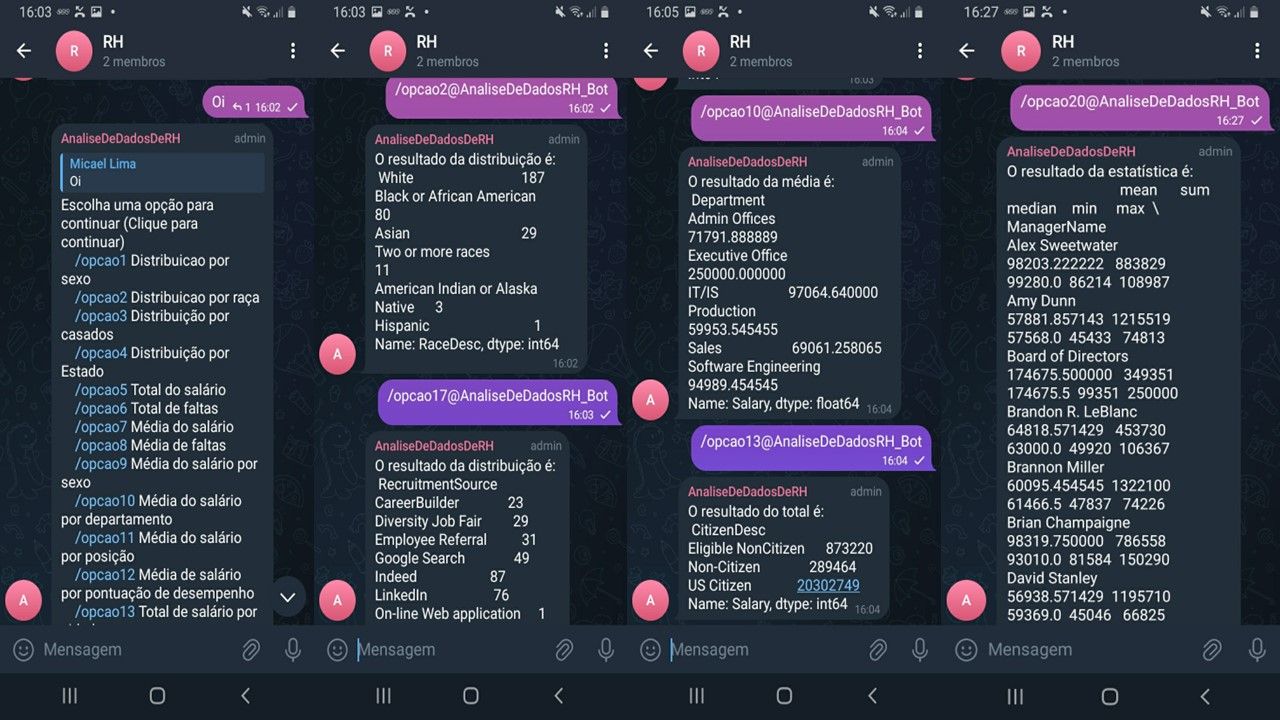

Poderíamos também fazer outras análises com base nos dados, no entanto, o bot ficaria muito extenso e já foi demonstrado o objetivo do bot.

* **Dados do BOT**:

In [ ]:
base_url = f'https://api.telegram.org/bot{token}'

-> getME

Irá retornar informações sobre o Bot.

In [ ]:
response = requests.get(url=f'{base_url}/getMe')
print(f'{base_url}/getMe')

print(json.dumps(json.loads(response.text), indent=2))

https://api.telegram.org/bot6845082646:AAFbrj7OcezHpOVCywHbMwW2HyoeKCbyi_U/getMe
{
  "ok": true,
  "result": {
    "id": 6845082646,
    "is_bot": true,
    "first_name": "AnaliseDeDadosRH",
    "username": "AnaliseDeDadosRH_bot",
    "can_join_groups": false,
    "can_read_all_group_messages": false,
    "supports_inline_queries": false
  }
}


-> getUpdates

Retorna as mensagens capturadas pelo Bot.

In [ ]:
response = requests.get(url=f'{base_url}/getUpdates')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": false,
  "error_code": 409,
  "description": "Conflict: can't use getUpdates method while webhook is active; use deleteWebhook to delete the webhook first"
}


> Acima, devido ao método webhook que vamos executar logo abaixo, não foi possível mostrar as mensagens capturadas, mas seria semelhante à descrição abaixo:

* Descrição:

```
{
  "update_id": 905928173,
  "message": {
    "message_id": 2,
    "from": {
      "id": 1448352330,
      "is_bot": false,
      "first_name": "Micael",
      "last_name": "Lima",
      "language_code": "pt-br"
    },
    "chat": {
      "id": -1001900844034,
      "title": "RH",
      "type": "supergroup"
    },
    "date": 1702296688,
    "text": "oi"
  }
}
```

| chave | tipo valor | opcional | descrição |
| -- | -- | -- | -- |
| updated_id | int | não | id da mensagem enviada ao **bot** |
| message_id | int | não | id da mensagem enviada ao grupo |
| from_id | int | sim | id do usuário que enviou a mensagem |
| from_is_bot | bool | sim | se o usuário que enviou a mensagem é um **bot** |
| from_first_name | str | sim | primeiro nome do usário que enviou a mensagem |
| chat_id | int | não | id do *chat* em que a mensagem foi enviada |
| chat_type | str | não | tipo do *chat*: private, group, supergroup ou channel |
| date | int | não | data de envio da mensagem no formato unix |
| text | str | sim | texto da mensagem |

## Ingestão

A fase de ingestão é encarregada de receber os dados transacionais em ambientes analíticos. Em geral, os dados são armazenados no formato original, sem alterações no conteúdo ou na estrutura (schema). Por exemplo, se os dados são provenientes de uma API web com formato REST, eles são persistidos no formato JSON. Essa abordagem oferece vantagens, como a capacidade de reprocessamento.

Existem duas maneiras de realizar a ingestão:

* **Batch**: Os dados são ingeridos em blocos em intervalos definidos, geralmente horas ou dias.

* **Streaming**: Os dados são ingeridos à medida que são gerados e disponibilizados.

No contexto deste projeto, as mensagens capturadas pelo bot no Telegram são ingeridas por meio da API web de bots do Telegram, entregues no formato JSON. Como o Telegram retém mensagens por apenas 24 horas em seus servidores, a ingestão via streaming é a escolha ideal. Para possibilitar esse tipo de ingestão, é utilizado um webhook para redirecionar automaticamente as mensagens para outra API web.

Para implementar isso, é necessário um serviço da AWS que forneça uma API web para receber os dados redirecionados, o `AWS API Gateway`. Conectando-o ao `AWS Lambda`, as mensagens são então armazenadas no seu formato original (JSON) em um bucket do `AWS S3`. Essa abordagem permite que sistemas reajam a eventos, sendo classificados como event-driven.

Portanto, precisamos:


 - Criar um *bucket* no `AWS S3`;
 - Criar uma função no `AWS Lambda`;
 - Criar uma API *web* no `AWS API Gateway`;
 - Configurar o *webhook* da API de *bots* do **Telegram**.


### AWS S3




Durante a fase de ingestão, o `AWS S3` atua como um repositório passivo para armazenar as mensagens coletadas pelo bot do Telegram em seu formato original, que é JSON. Para isso, é suficiente criar um bucket, seguindo o padrão de adicionar o sufixo `-raw` ao nome do bucket. É importante observar que um `data lake` é um repositório de dados em grande escala, organizado em zonas que contêm réplicas dos dados em diferentes estágios de processamento. As zonas comuns incluem raw, enriched, ou, em alguns casos, bronze, silver e gold.

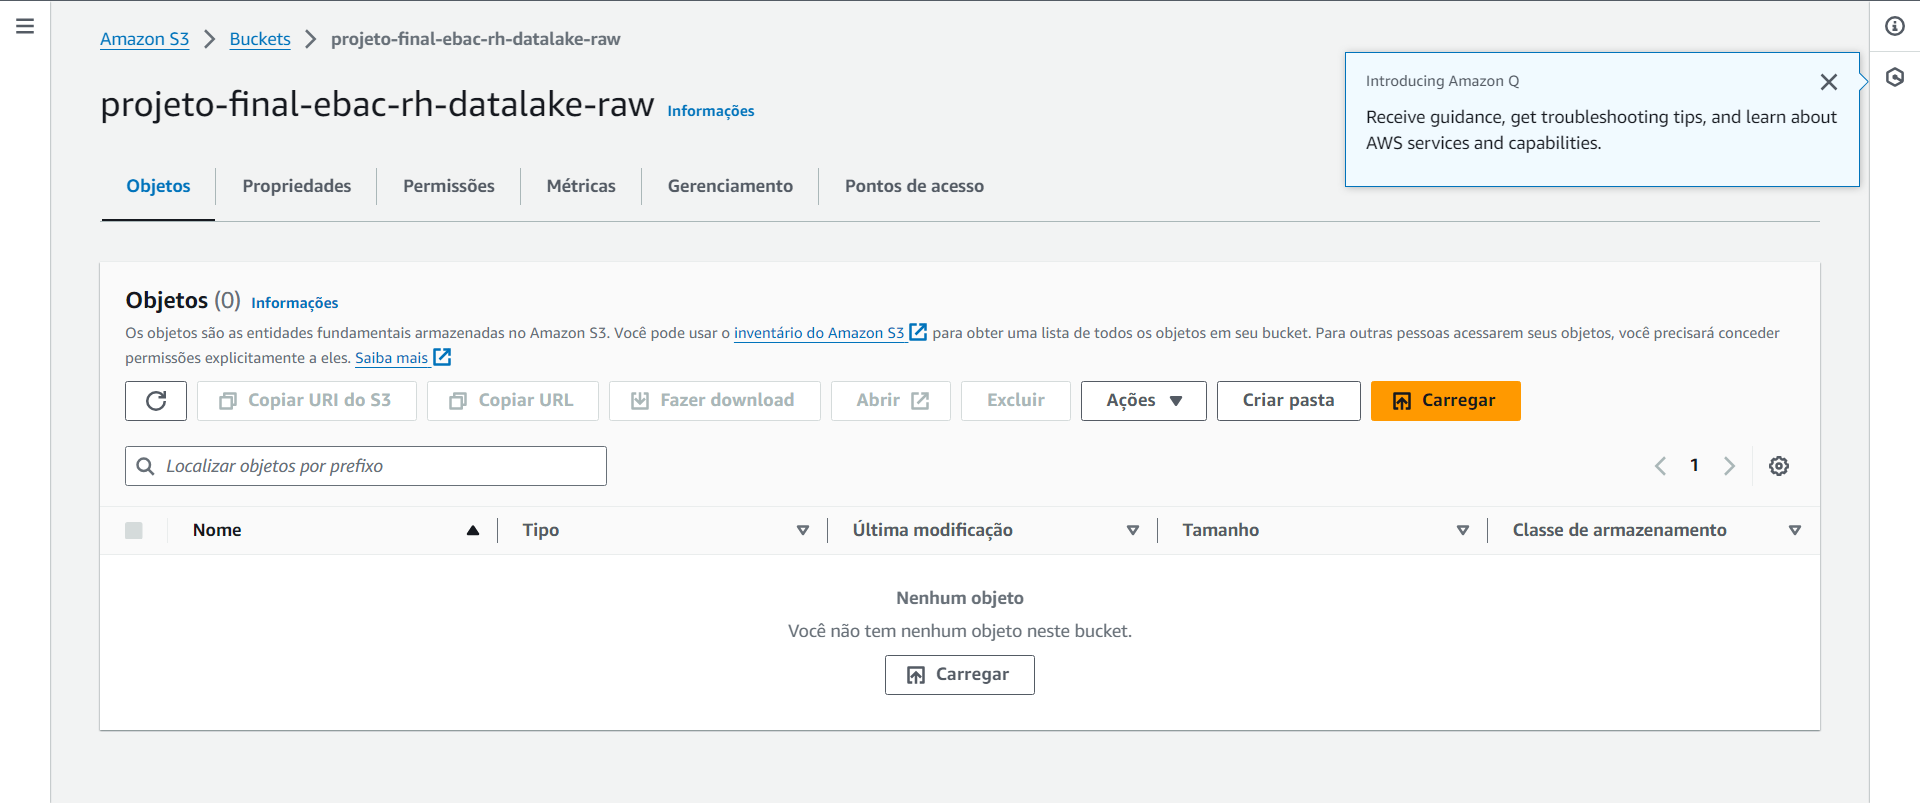

In [ ]:
display(Image(filename='imagem1.png'))

> O bucket acima será usado para armazenar os dados do bot do Telegram, inicialmente não inserimos nada.

### AWS Lambda



Durante a fase de ingestão, o `AWS Lambda` desempenha o papel ativo de armazenar as mensagens recebidas pelo bot do Telegram em um bucket do `AWS S3`. Para isso, criamos uma função que opera da seguinte forma:

* Recebe a mensagem como parâmetro event;
* Verifica se a mensagem é proveniente do grupo correto no Telegram;
* Armazena a mensagem no formato JSON no bucket do AWS S3;
* Retorna uma mensagem de sucesso à API de bots do Telegram com um código de retorno HTTP igual a 200.

É importante notar que, no Telegram, a opção de adicionar o bot a grupos pode ser restrita, mas ainda é possível iniciar uma conversa em um chat privado.

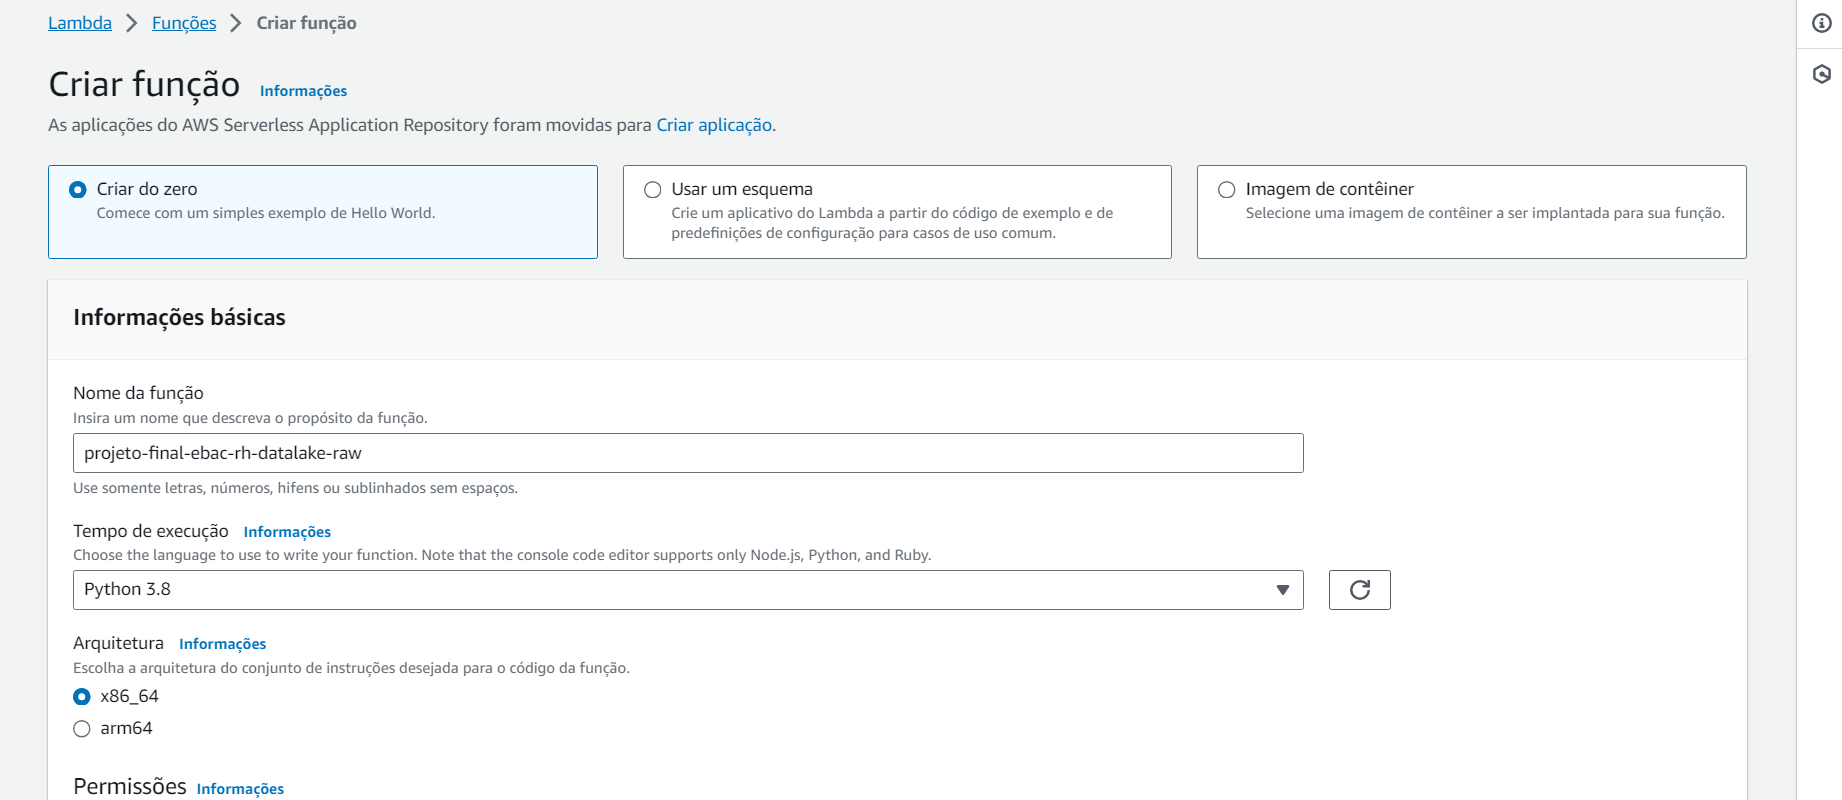

In [ ]:
display(Image(filename='imagem2.png'))

> Acima estamos dando o 1º passo para criar nossa função, damos o mesmo nome que foi dado ao bucket anteriormente e selecionamos a mesma versão do Python do nosso ambiente, sendo a 3.10 no momento que eu estou desenvolvendo esse projeto, assim mantemos um padrão a ser usado.

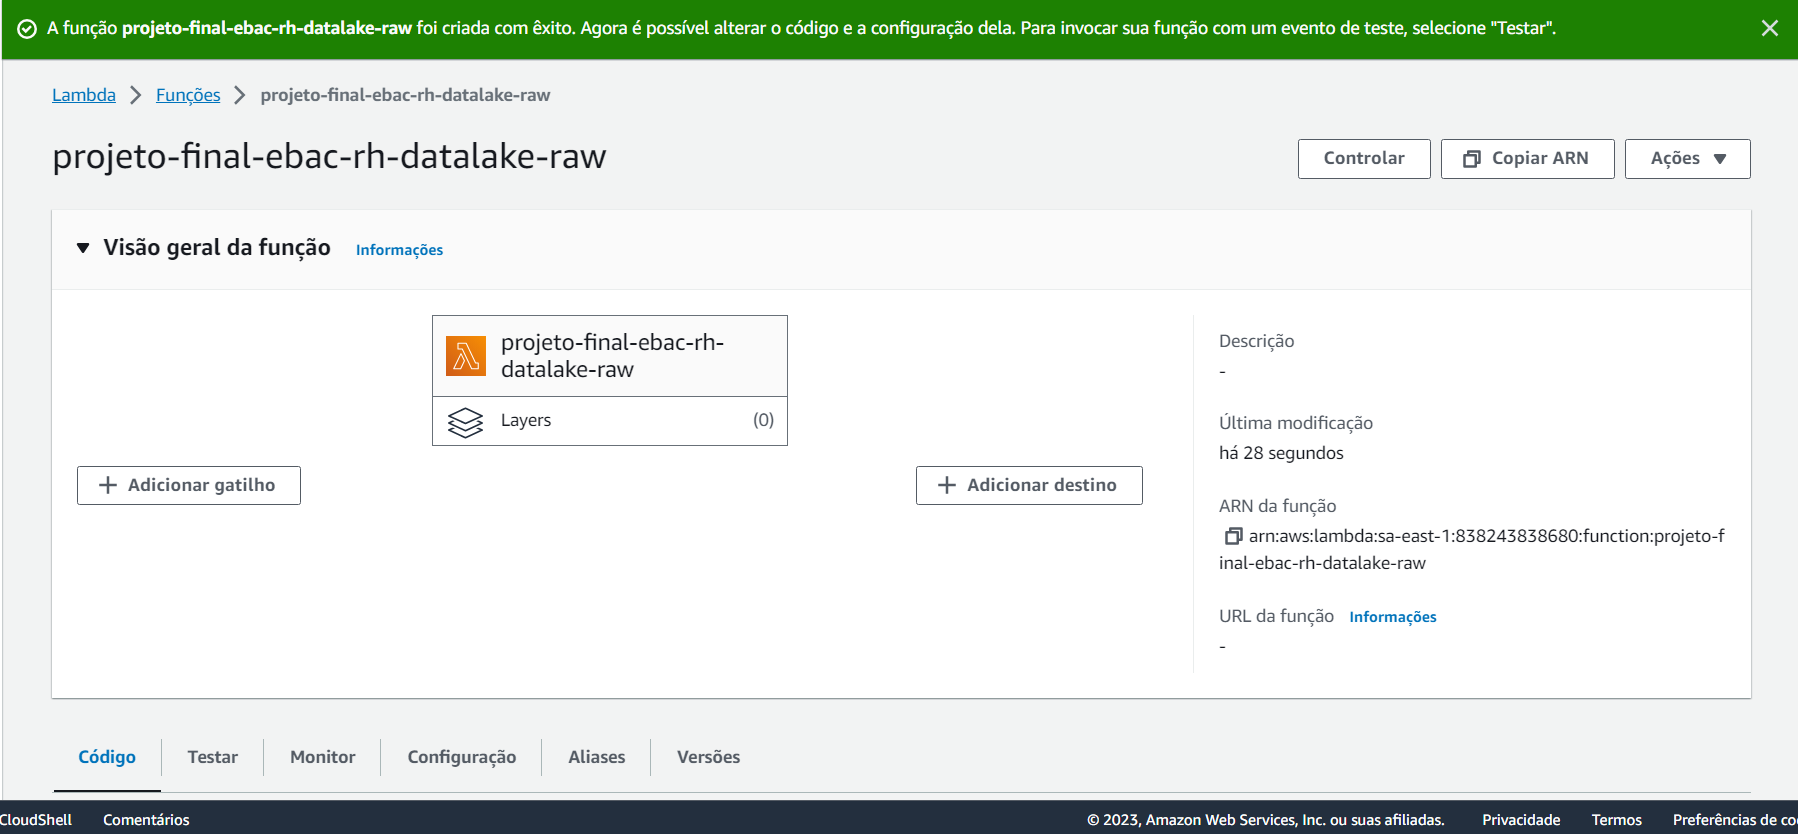

In [ ]:
display(Image(filename='imagem3.png'))

> Aqui temos uma visão geral da função criada.

Abaixo temos o código da função que será executada no ambiente:

```python
import os
import json
import logging
from datetime import datetime, timezone

import boto3


def lambda_handler(event: dict, context: dict) -> dict:

  '''
  Recebe uma mensagens do Telegram via AWS API Gateway, verifica no
  seu conteúdo se foi produzida em um determinado grupo e a escreve,
  em seu formato original JSON, em um bucket do AWS S3.
  '''

  # vars de ambiente

  BUCKET = os.environ['AWS_S3_BUCKET']
  TELEGRAM_CHAT_ID = int(os.environ['TELEGRAM_CHAT_ID'])

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = datetime.now(tzinfo).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  filename = f'{timestamp}.json'

  # código principal

  client = boto3.client('s3')

  try:

    message = json.loads(event["body"])
    chat_id = message["message"]["chat"]["id"]

    if chat_id == TELEGRAM_CHAT_ID:

      with open(f"/tmp/{filename}", mode='w', encoding='utf8') as fp:
        json.dump(message, fp)

      client.upload_file(f'/tmp/{filename}', BUCKET, f'telegram/context_date={date}/{filename}')

  except Exception as exc:
      logging.error(msg=exc)
      return dict(statusCode="500")

  else:
      return dict(statusCode="200")
```

Para que a função funcione corretamente, algumas configurações precisam ser feitas.



*   **variáveis de ambiente**



O código mencionado requer a configuração de duas variáveis de ambiente: `AWS_S3_BUCKET`, que deve conter o nome do bucket do `AWS S3`, e `TELEGRAM_CHAT_ID`, que deve conter o ID do chat do grupo no Telegram. Para adicionar essas variáveis em uma função do `AWS Lambda`, basta acessar as configurações e selecionar a opção de variáveis de ambiente no console da função. É importante destacar que as variáveis de ambiente são uma maneira segura de armazenar informações sensíveis.

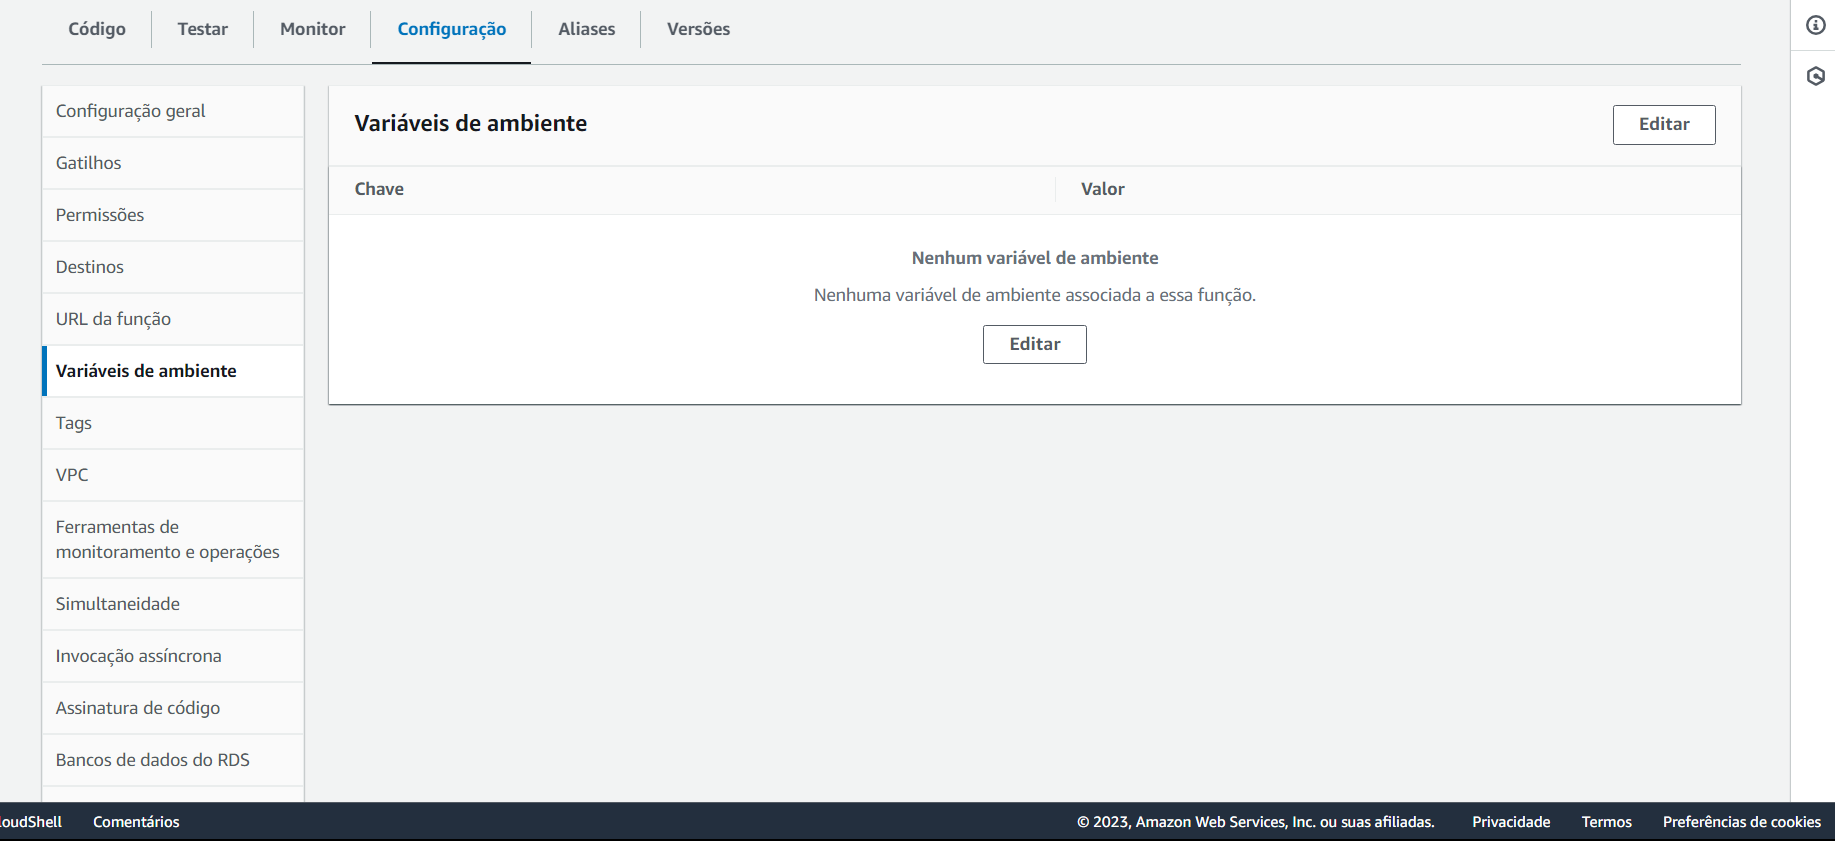

In [ ]:
display(Image(filename='imagem4.png'))

> Aqui é a o onde é criado as variáveis de ambiente.

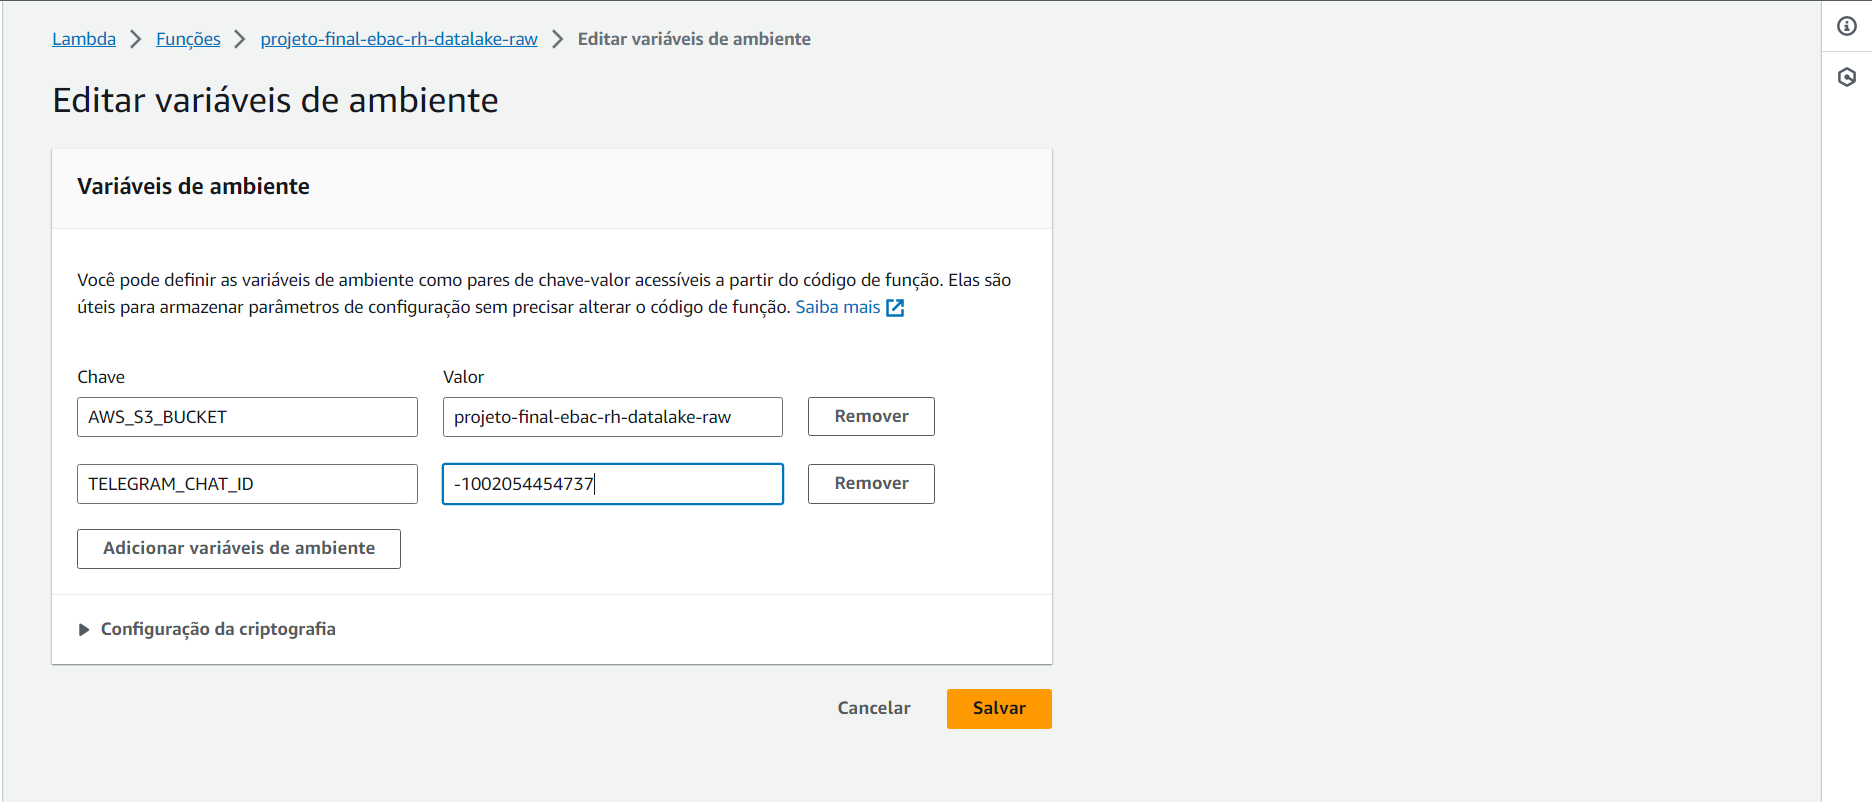

In [ ]:
display(Image(filename='imagem5.png'))

> Definimos as duas chaves que estamos usando o `AWS_S3_BUCKET` e o `TELEGRAM_CHAT_ID` e os seus respectivos valores, o qual são o nome do **bucket** criado e o id do grupo que verificamos anteriormente com o **getUpdates**. Vale lembrar que id de grupos são negativos e de usuários positivos.



*   **Permissão**


Por fim, precisamos adicionar a permissão de escrita no *bucket* do `AWS S3` para a função do `AWS Lambda` no `AWS IAM`.

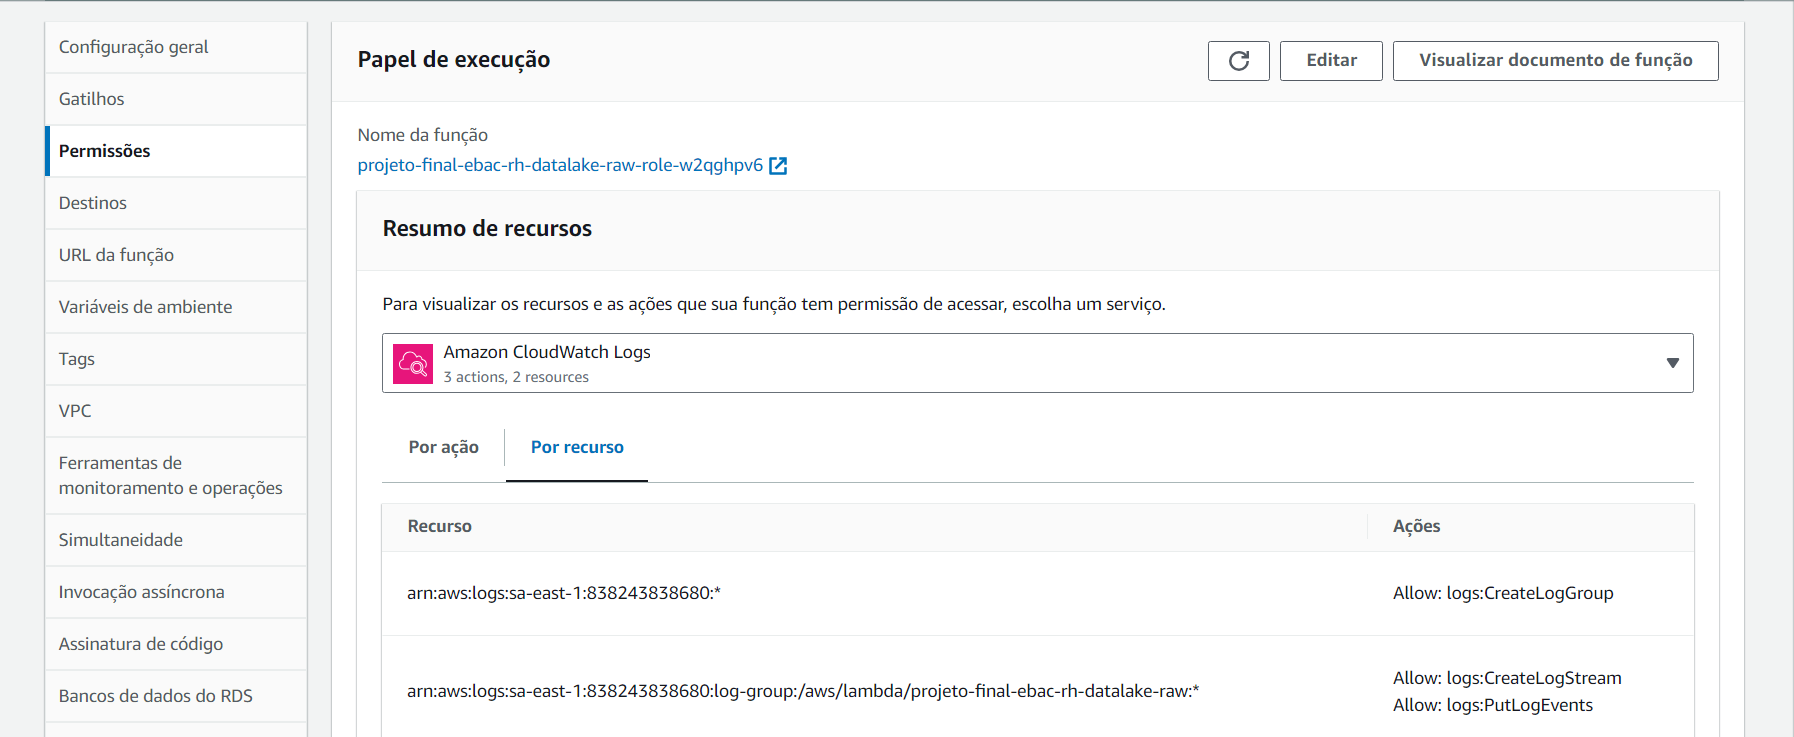

In [ ]:
display(Image(filename='imagem6.png'))


> Agora é o momento que adicionar as permissões necessárias. Bastando clicar no nome da função e sendo direcionado para o `AWS IAM`.

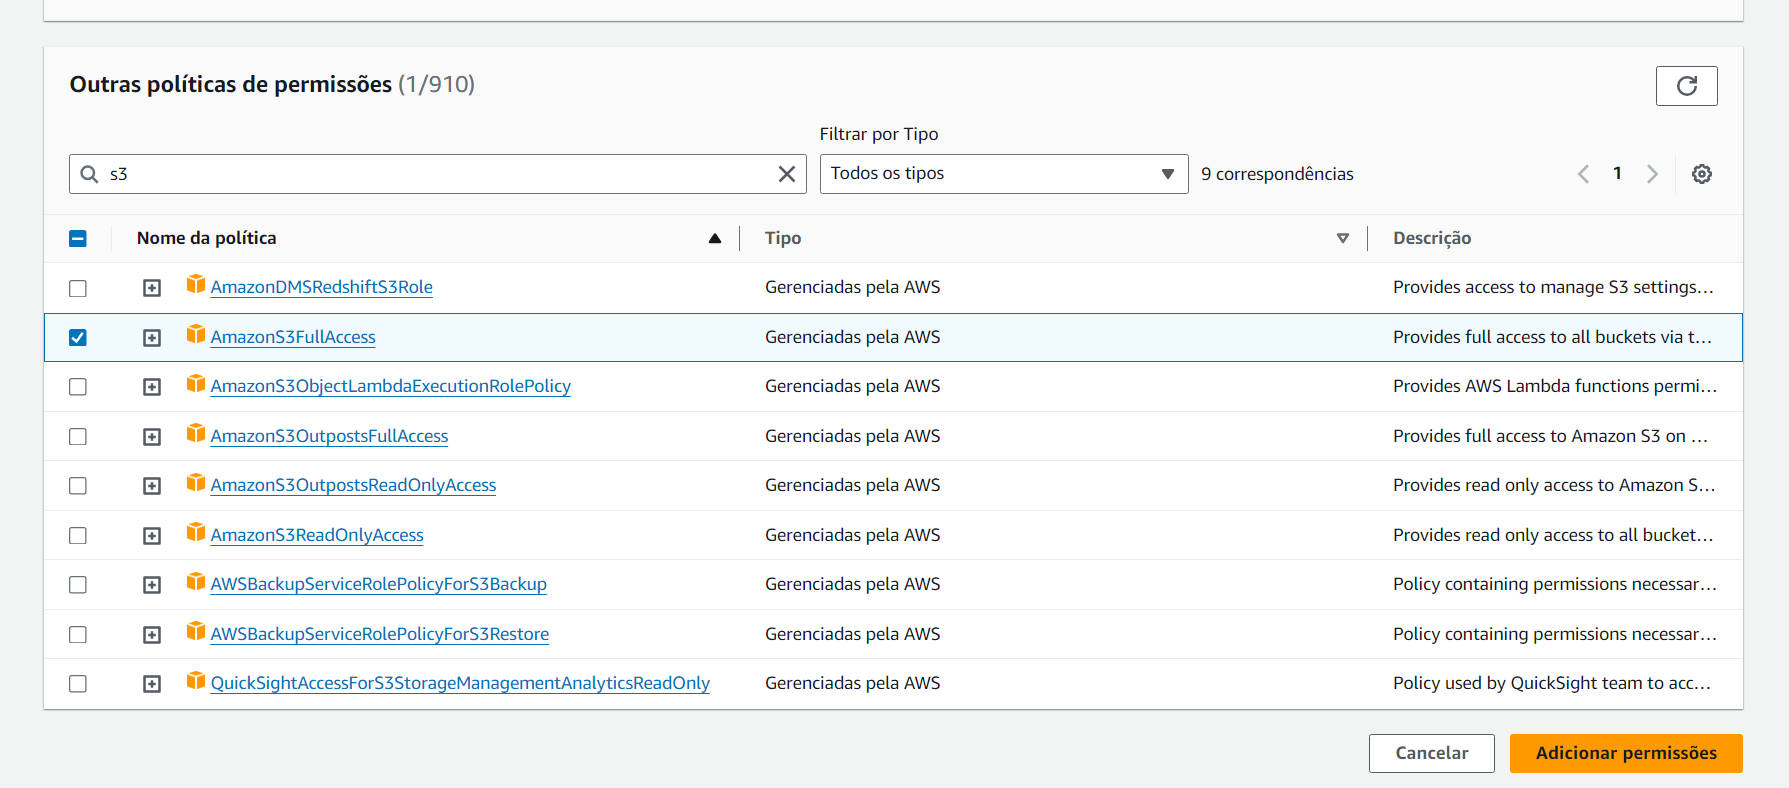

In [ ]:
display(Image(filename='imagem7.png'))

> Aqui anexamos as políticas de permissões para o nosso bucket, selecionamos acesso total, mas ao trabalhar em uma grande empresa esse tipo de acesso pode não ser o ideal, sendo necessário limitações em relação ao acesso do bucket.



*   **Teste**



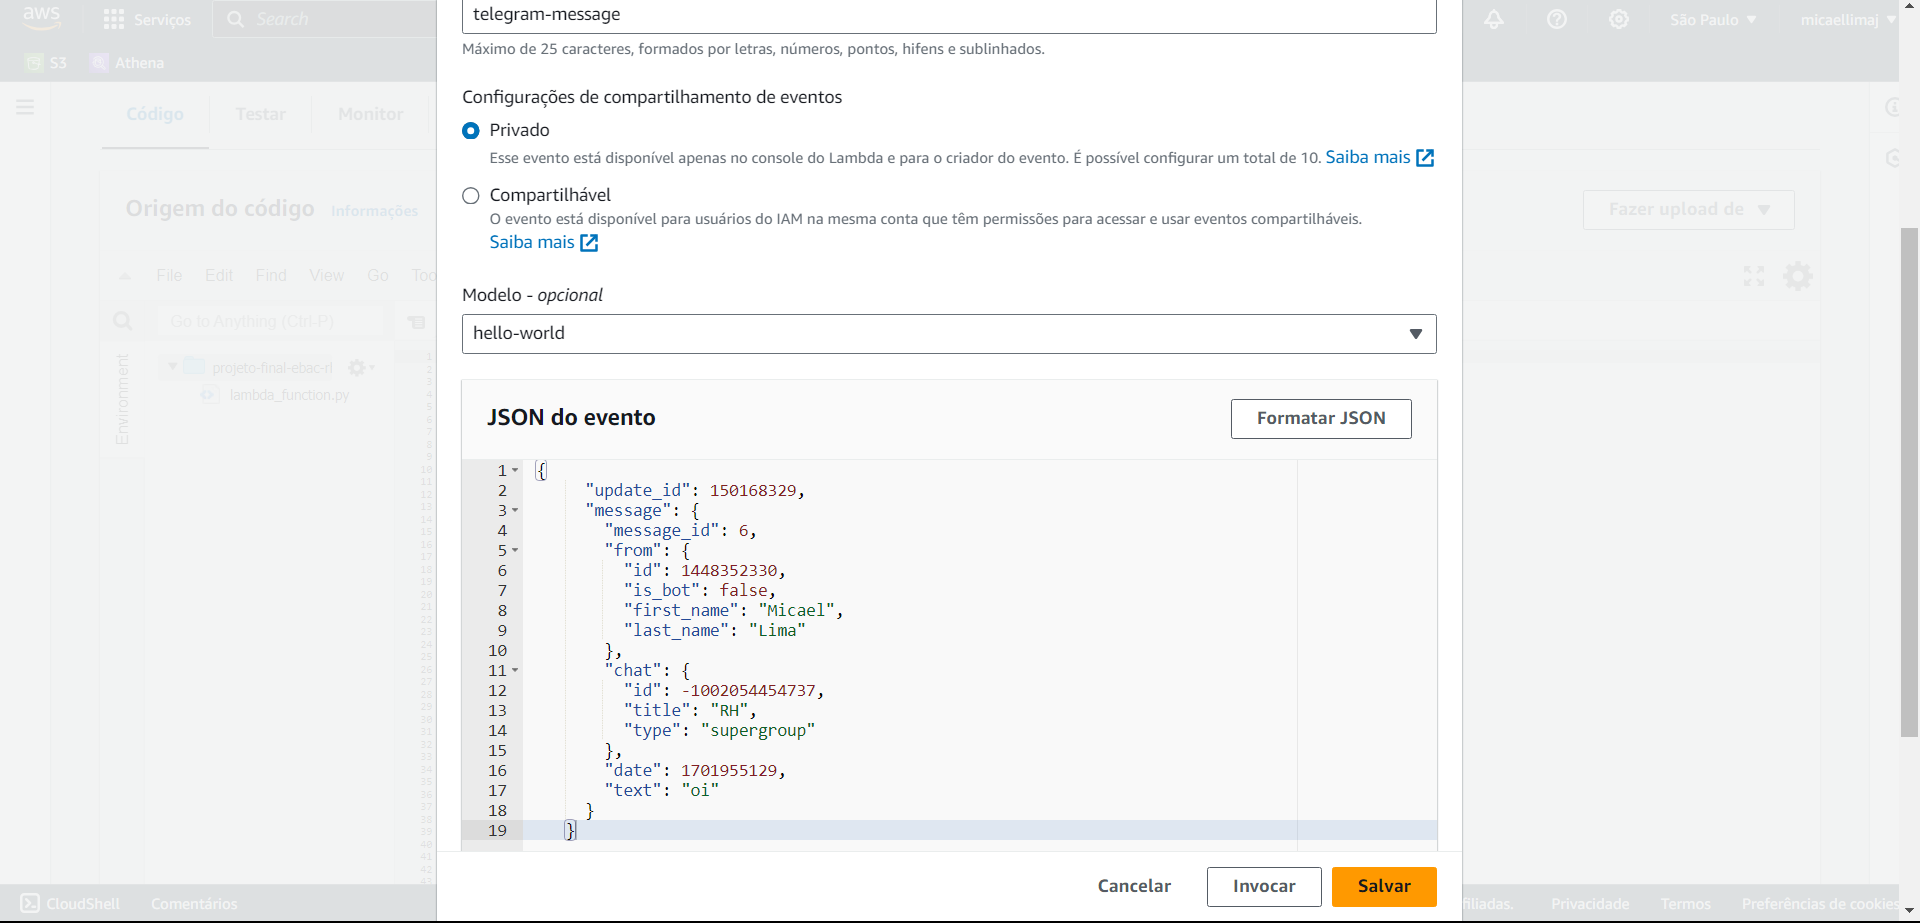

In [ ]:
display(Image(filename='imagem8.png'))

> Aqui colamos o conteúdo da mensagem que capturamos anteriormente com o getUpdates e executamos o teste com o código da função.

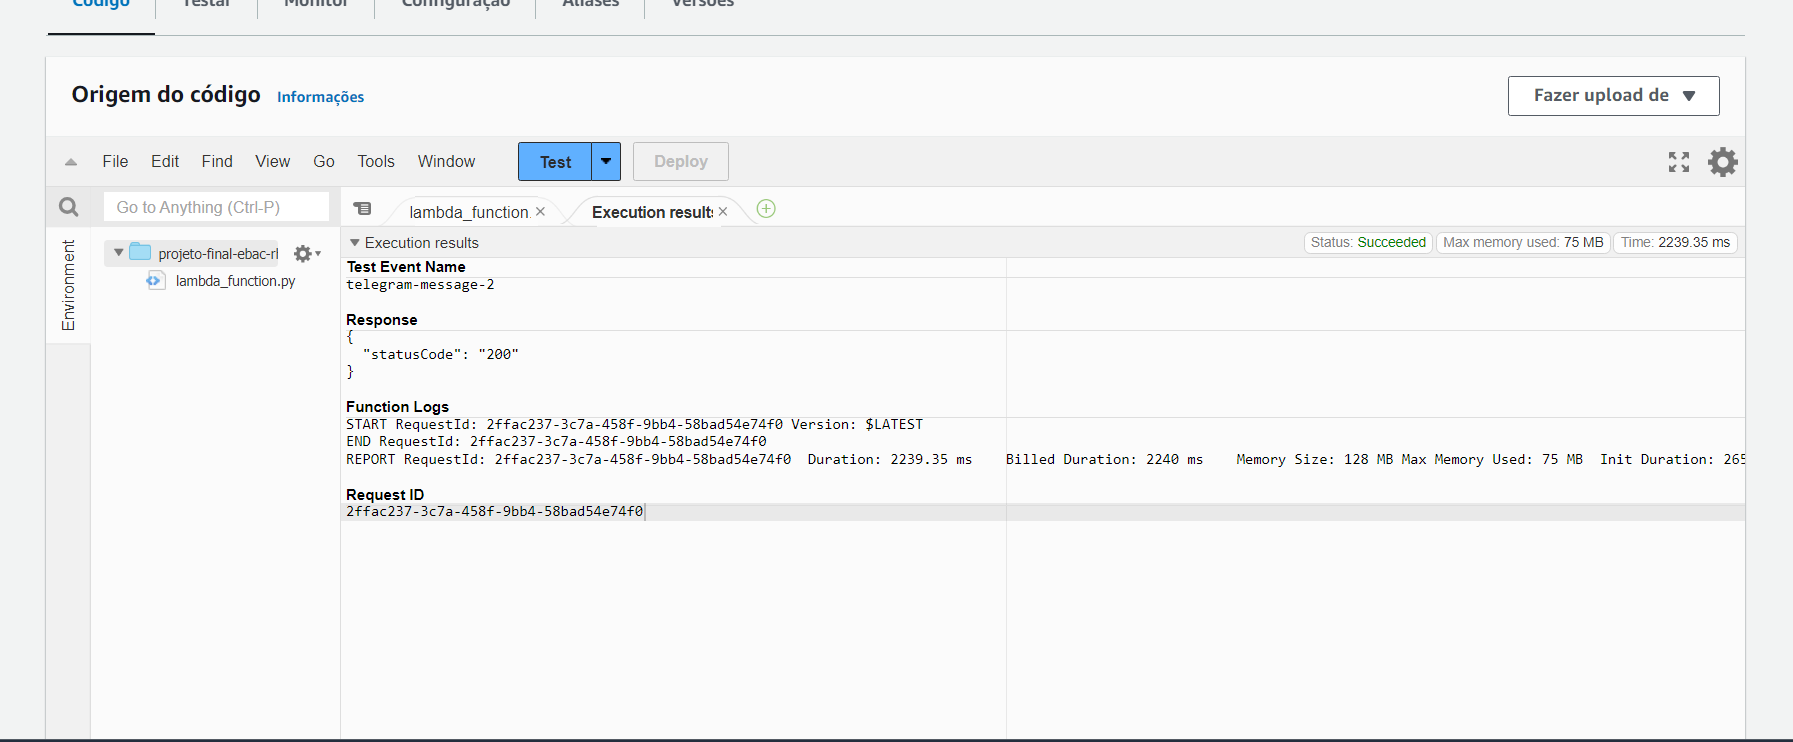

In [ ]:
display(Image(filename='imagem9.png'))

> Acima vemos que tudo ocorreu como esperado.

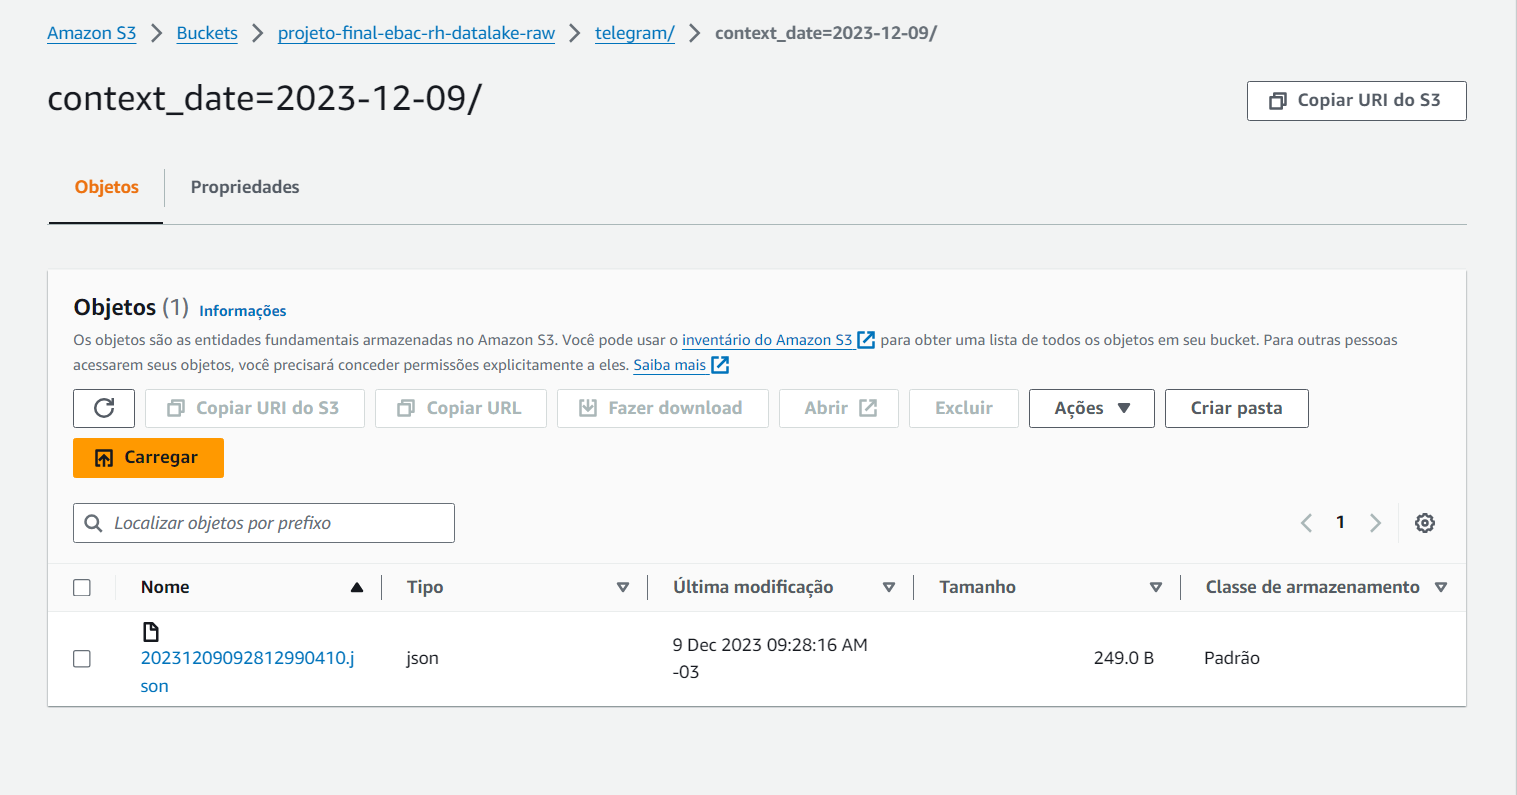

In [ ]:
display(Image(filename='imagem10.png'))

> E o conteúdo da mensagem inserido na etapa de teste acabou sendo salvo no nosso bucket.

### API Gateway

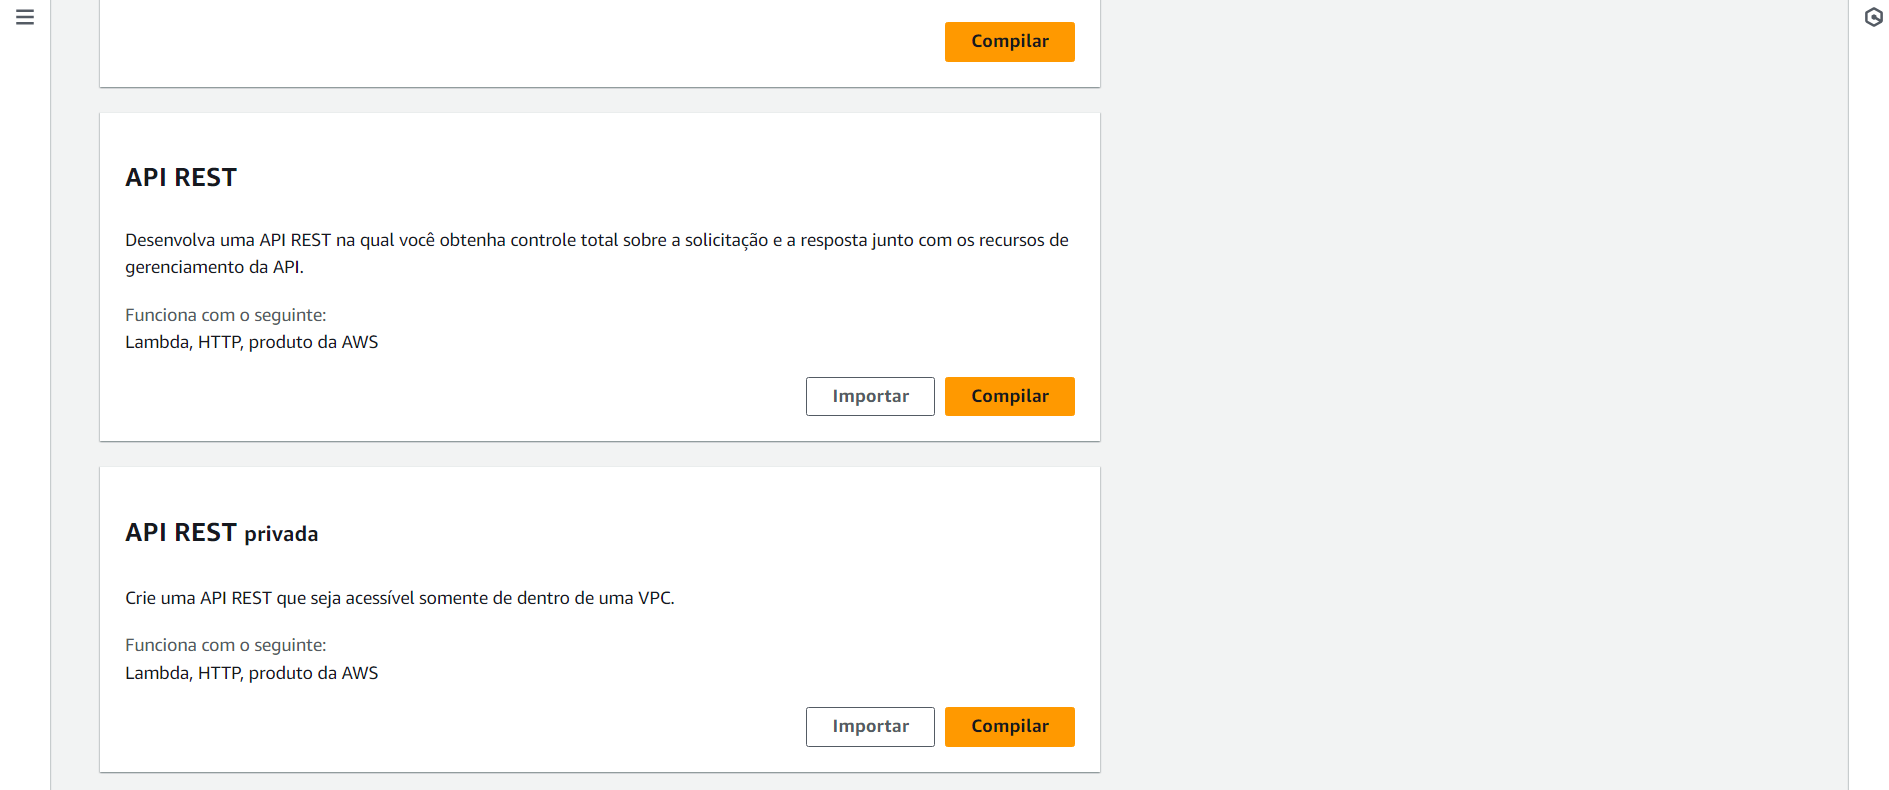

In [ ]:
display(Image(filename='imagem11.png'))

> Nessa parte estamos acessando o serviço da `AWS API Gateway` e criamos uma API REST.

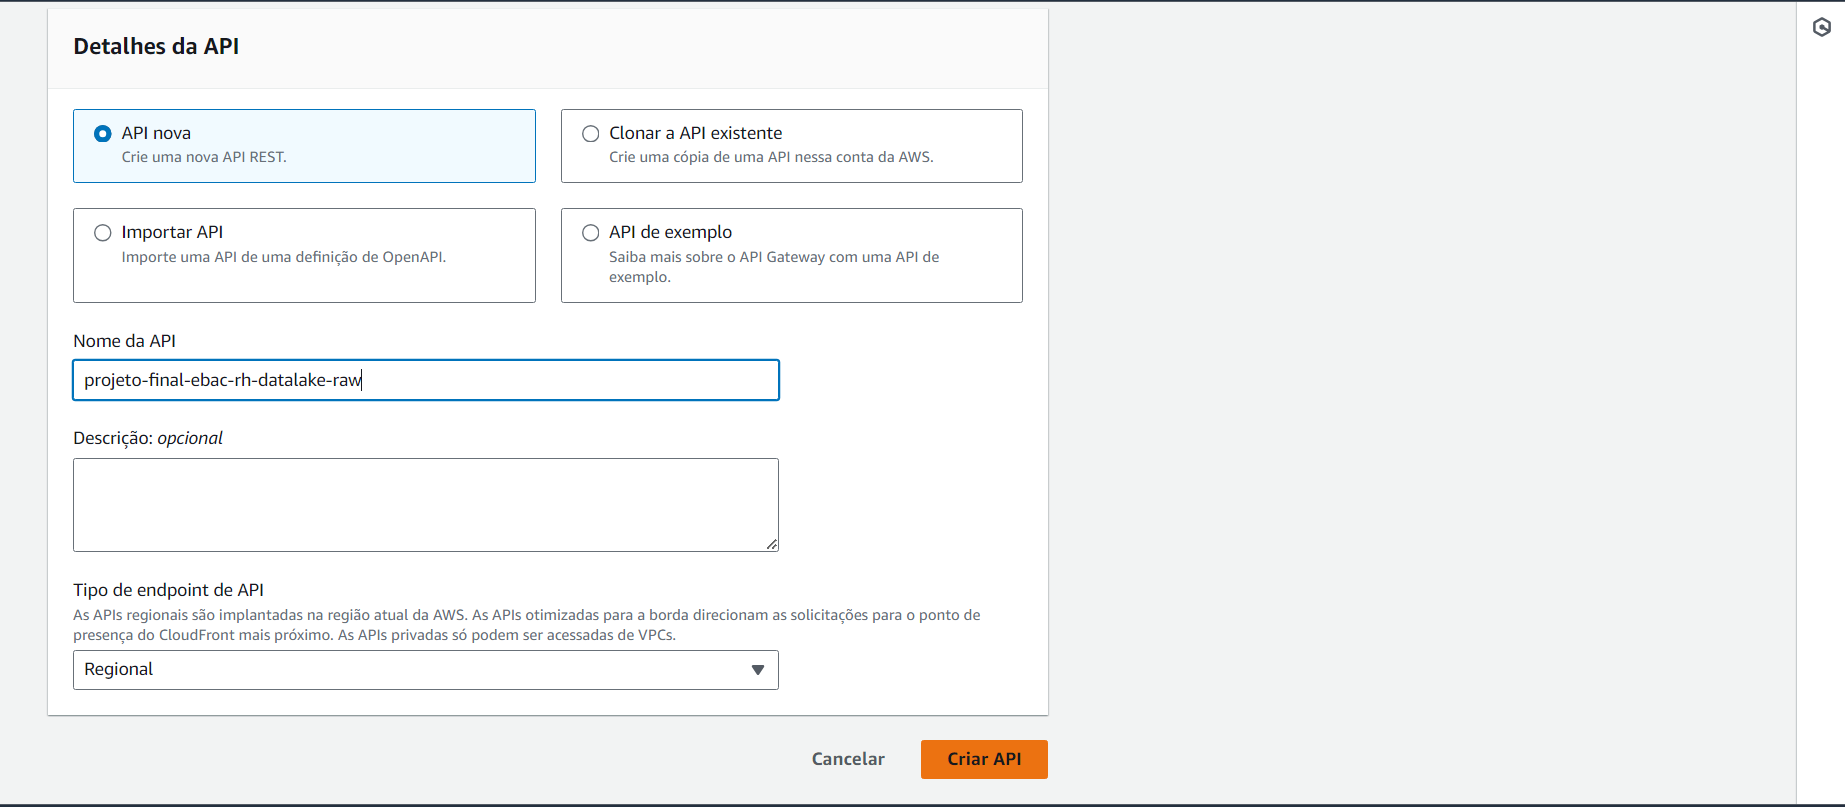

In [ ]:
display(Image(filename='imagem12.png'))

> Aqui selecionamos um nome como padrão, foi inserido o nome com sufixo `-api`, como boa prática recomendada, mas na captura de tela acima consta antes da mudança de nome.

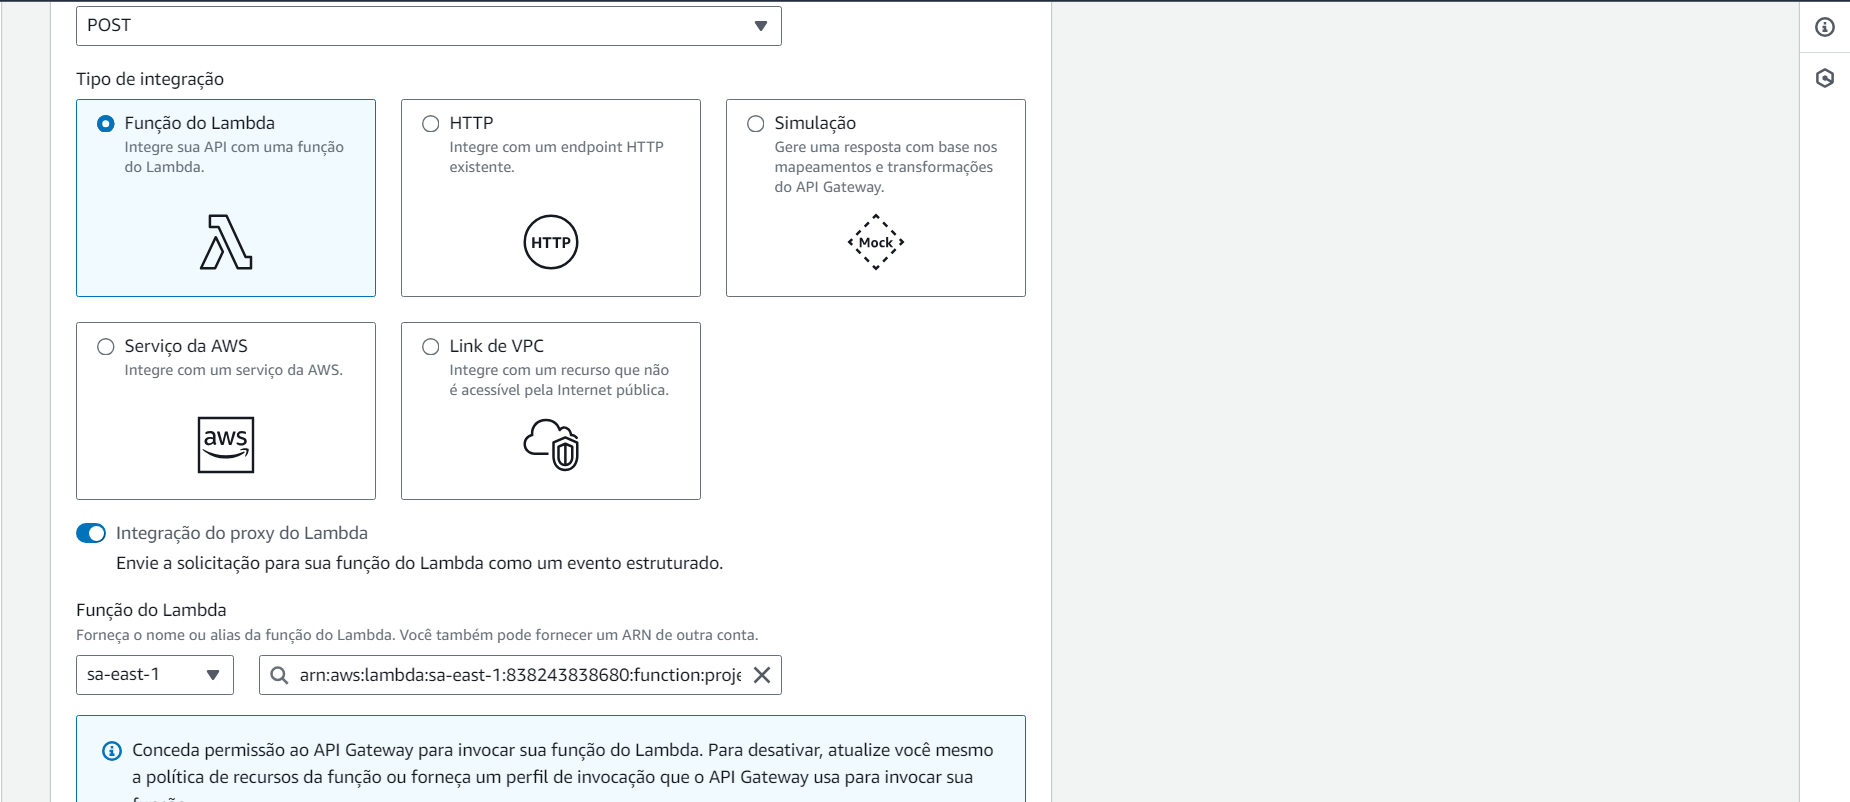

In [ ]:
display(Image(filename='imagem13.png'))

> Aqui escolhemos integramos nossa API a função lambda utilizando o método POST.

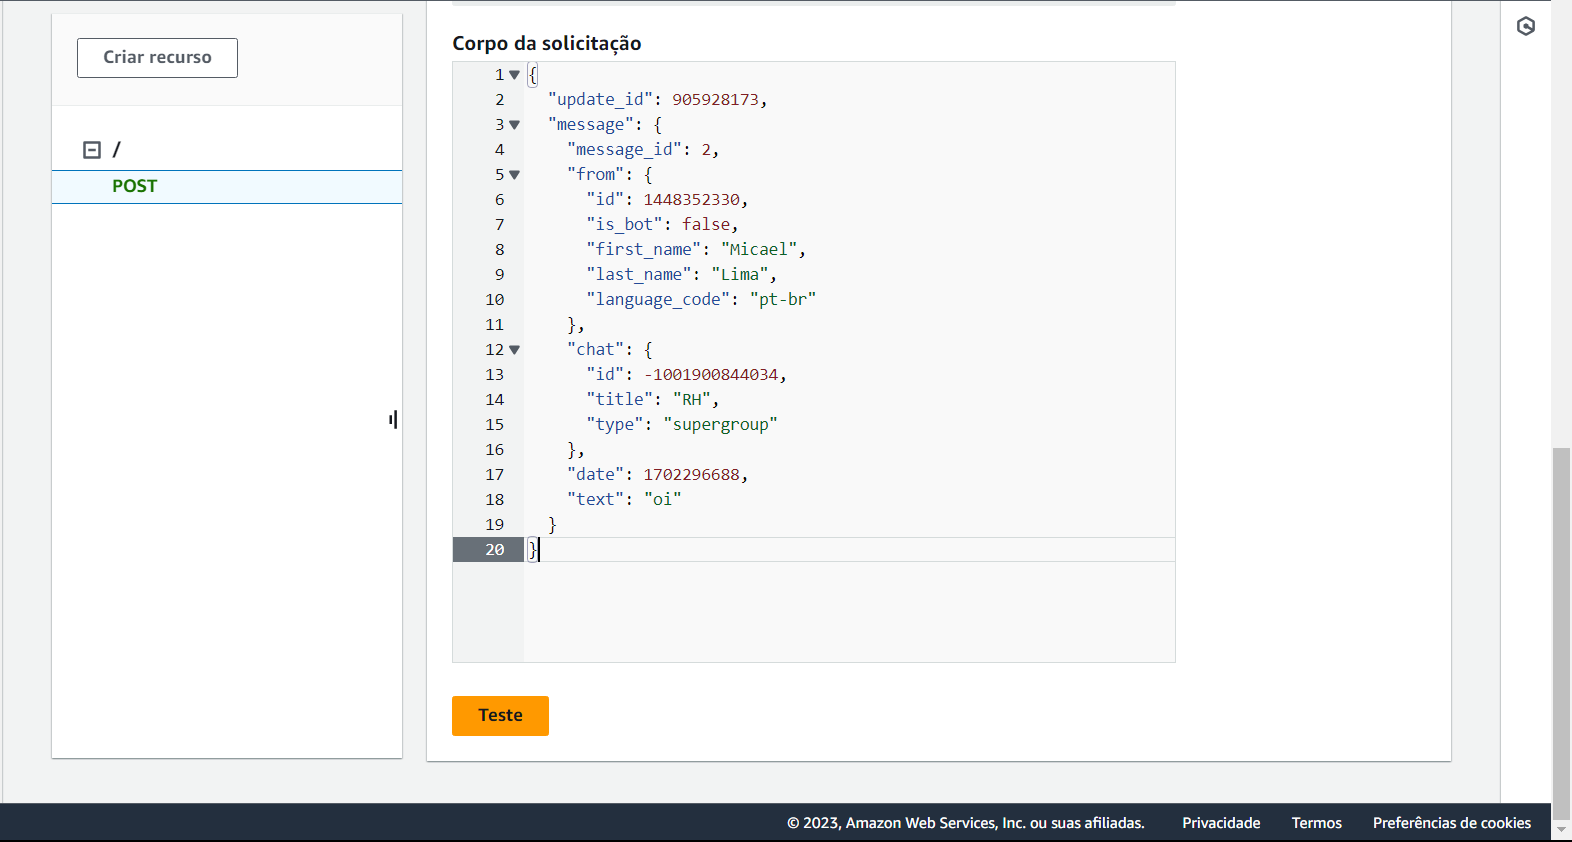

In [ ]:
display(Image(filename='imagem14.png'))

> Estamos realizando um teste semelhante ao ambiente do lambda anteriormente com o conteúdo da nossa mensagem.

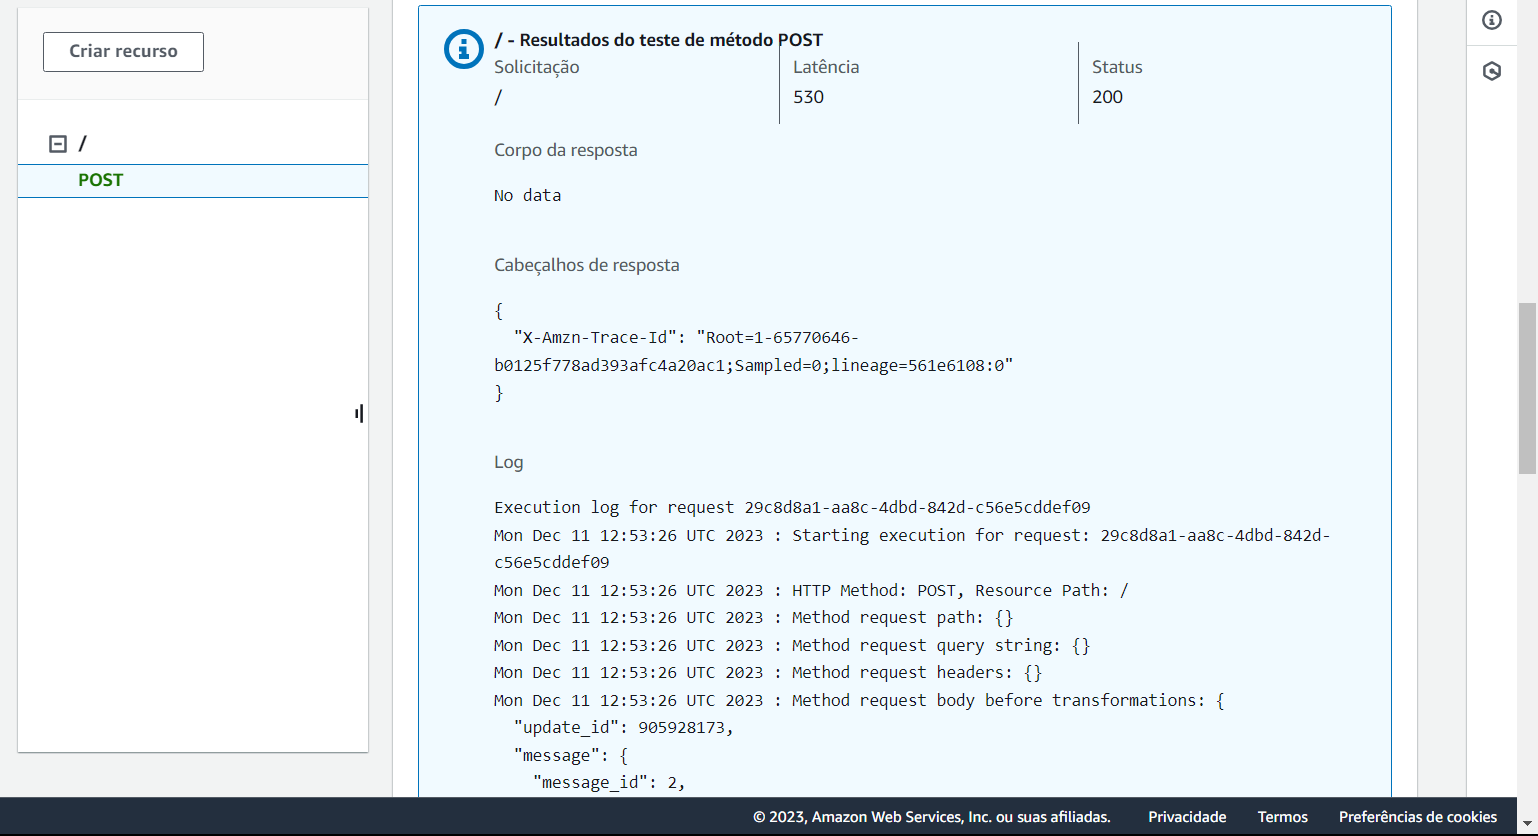

In [ ]:
display(Image(filename='imagem15.png'))

> Recebemos status 200, significando que está indo como planejado.

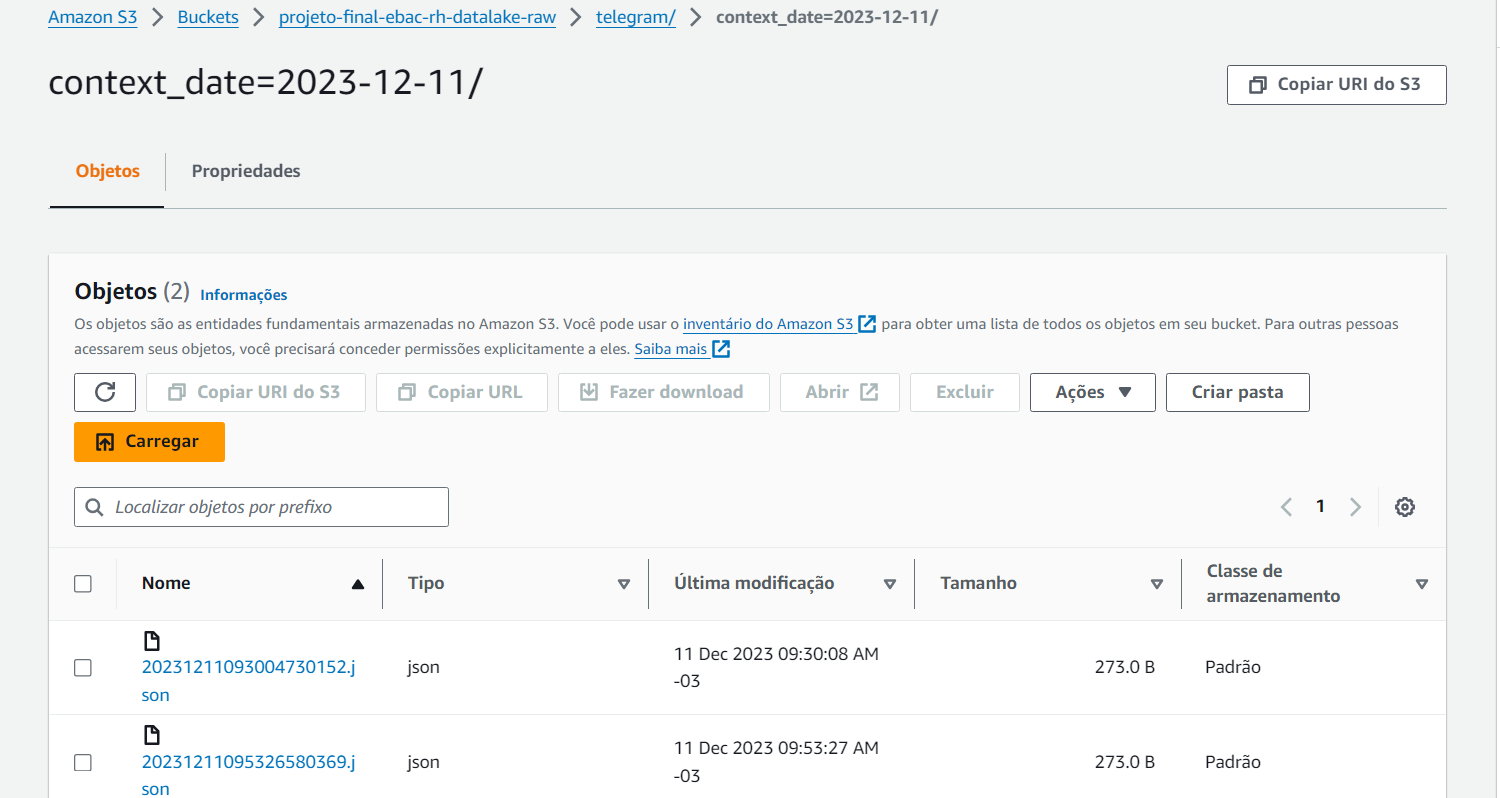

In [ ]:
display(Image(filename='imagem16.png'))

> E verificamos que mais um arquivo foi armazenado no nosso bucket, agora referente ao teste anterior.

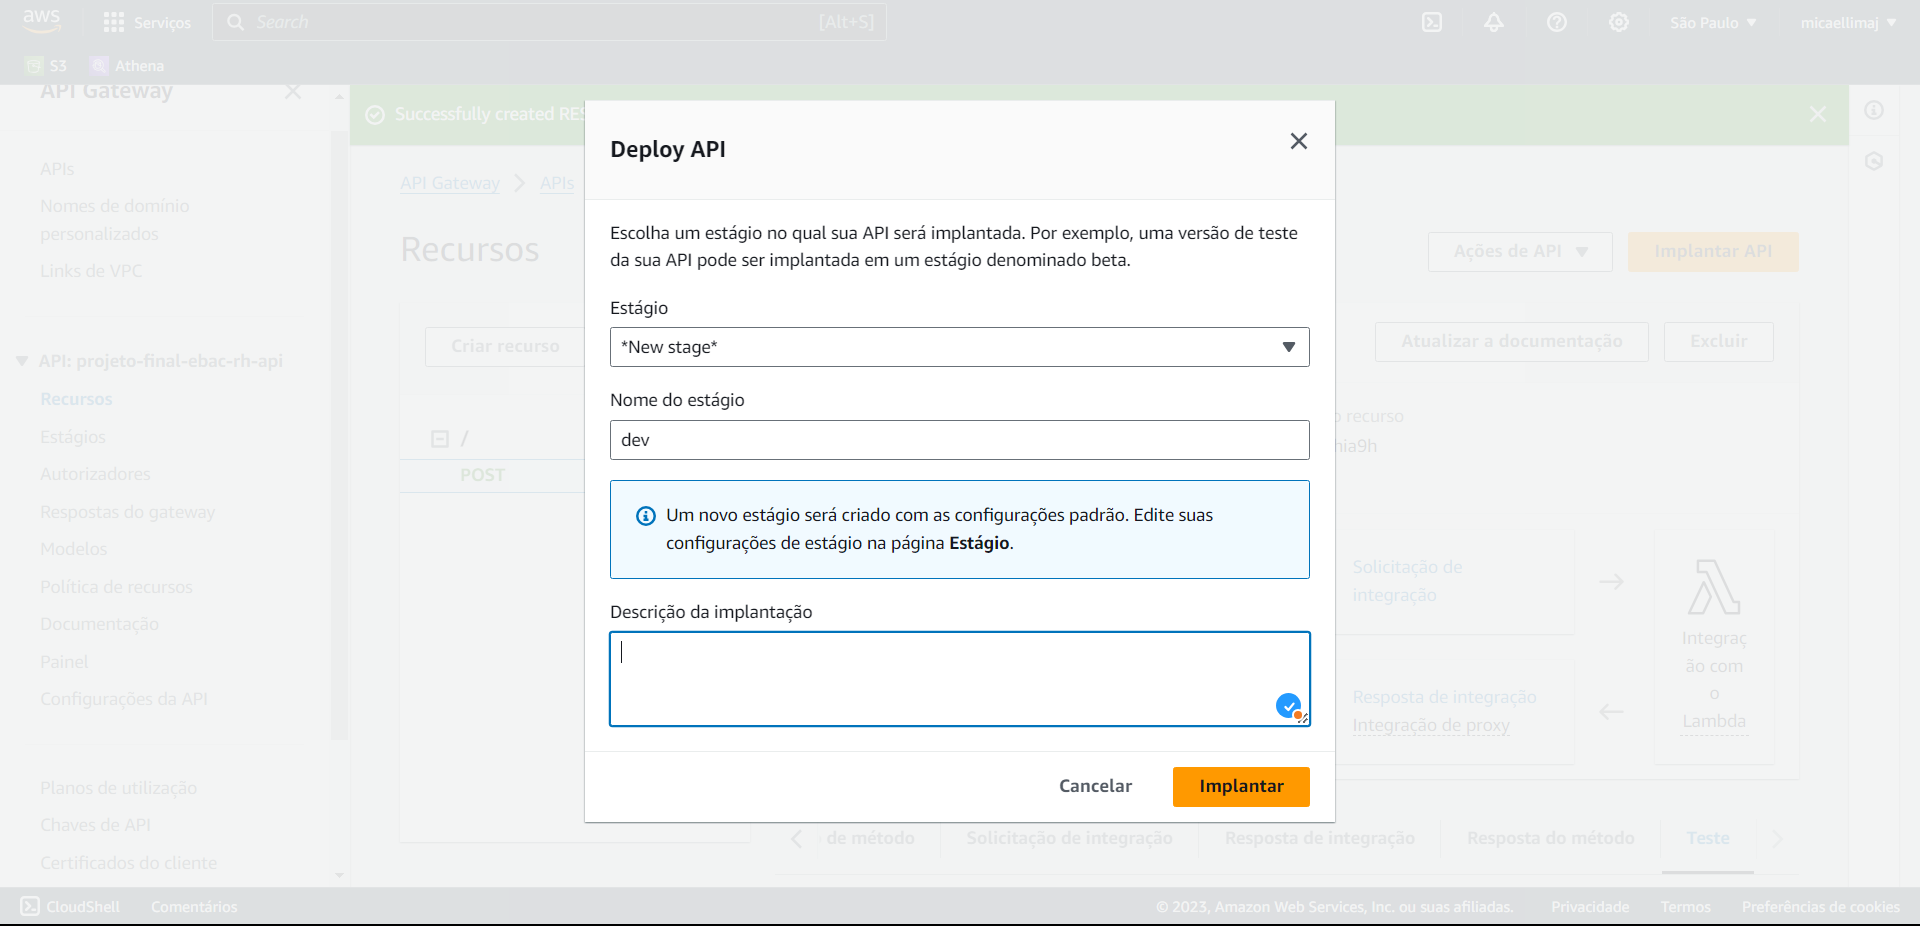

In [ ]:
display(Image(filename='imagem17.png'))

In [ ]:
aws_api_gateway_url = getpass()

··········




### Telegram


Vamos configurar o *webhook* para redirecionar as mensagens para a `url` do `AWS API Gateway`.

 - **setWebhook**

O método `setWebhook` configura o redirecionamento das mensagens captadas pelo *bot* para o endereço *web* do parâmetro `url`.

In [ ]:
response = requests.get(url=f'{base_url}/setWebhook?url={aws_api_gateway_url}')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": true,
  "description": "Webhook is already set"
}


> **Nota**: os métodos `getUpdates` e `setWebhook` são mutualmente exclusivos, ou seja, enquanto o *webhook* estiver ativo, o método `getUpdates` não funcionará. Para desativar o *webhook*, basta utilizar o método `deleteWebhook`.

 - **getWebhookInfo**

O método `getWebhookInfo` retorna as informações sobre o *webhook* configurado.

In [ ]:
response = requests.get(url=f'{base_url}/getWebhookInfo')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": {
    "url": "https://6f8pu6qlyh.execute-api.sa-east-1.amazonaws.com/dev",
    "has_custom_certificate": false,
    "pending_update_count": 0,
    "max_connections": 40,
    "ip_address": "52.67.86.214"
  }
}


## ETL

O processo ETL é responsável por extrair dados de sistemas transacionais, transformá-los em um formato adequado para análise e carregá-los em um sistema analítico. No projeto, as mensagens de um dia serão extraídas da camada crua, transformadas em um arquivo comprimido e orientado a colunas e carregadas na camada enriquecida. Para isso, será utilizada uma função do `AWS Lambda` como motor de processamento e um bucket do `AWS S3` como camada enriquecida. Uma regra do `AWS Event Bridge` será configurada para disparar a função diariamente.

### AWS S3

No processo ETL, o  `AWS S3 ` é responsável por armazenar os dados processados de um dia em um único arquivo no formato Parquet.
Para isso, basta criar um bucket no AWS S3. O nome do bucket deve seguir com o sufixo `-enriched` como padrão.

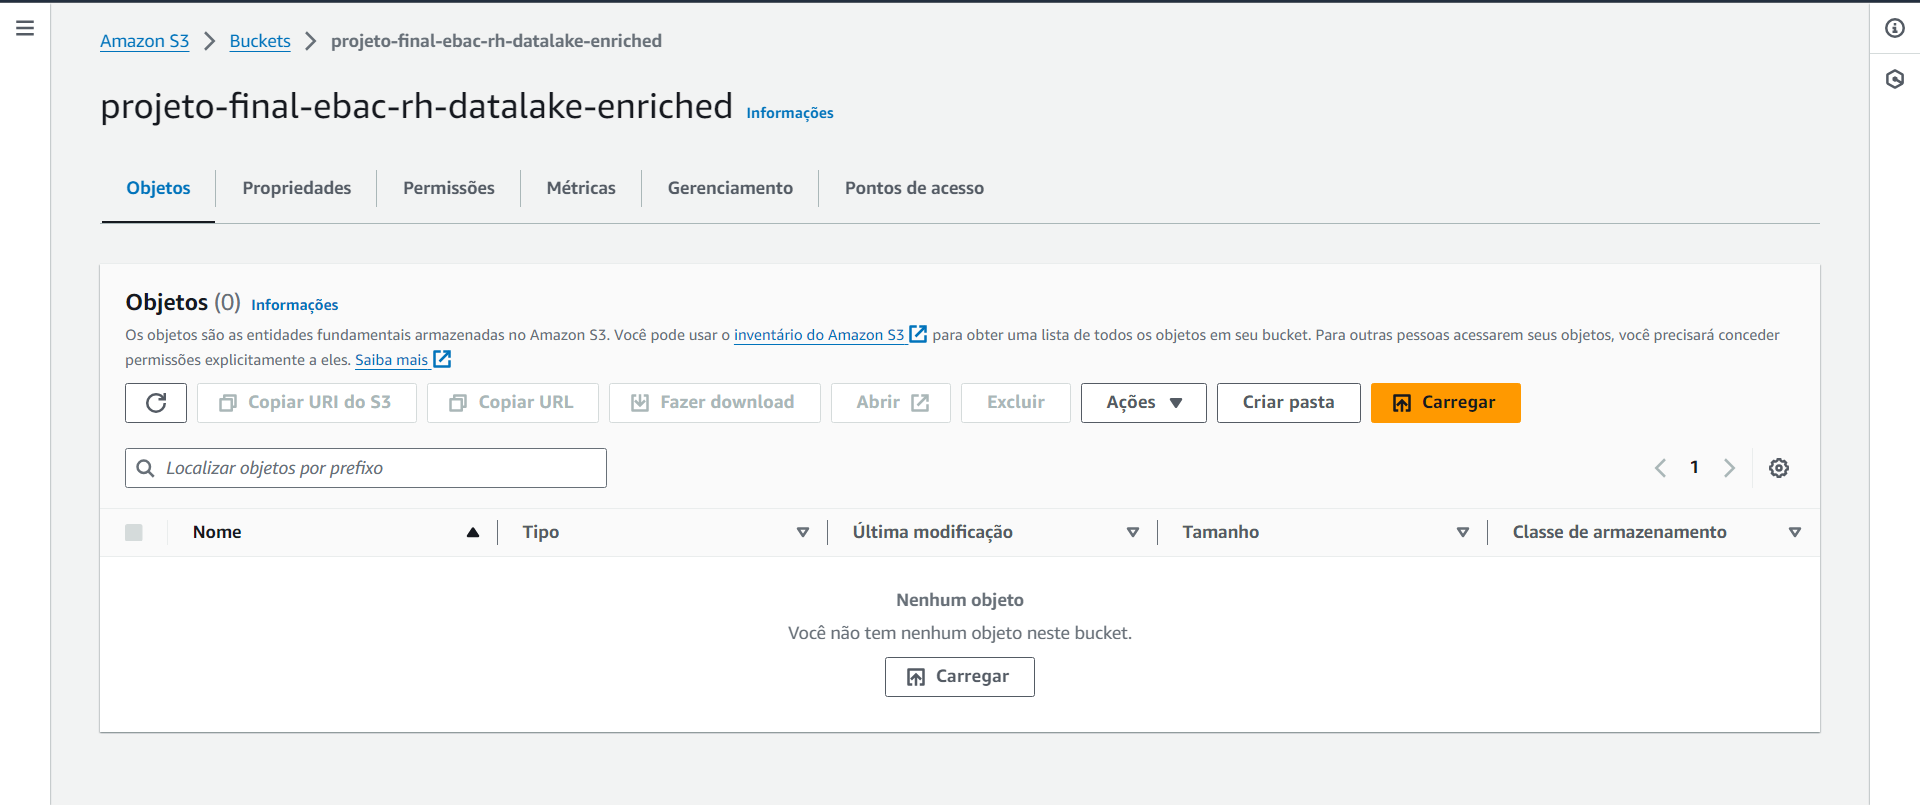

In [ ]:
display(Image(filename='imagem18.png'))

> Inicialmente não temos nada armazenado.

### AWS Lambda

No processo ETL, o `AWS Lambda` é responsável por processar as mensagens captadas pelo bot do Telegram. Para isso, a função do `AWS Lambda` realiza as seguintes etapas:

1. Lista todos os arquivos JSON da camada crua no bucket do `AWS S3`.

2. Para cada arquivo listado:
* Faz o download do arquivo e carrega o conteúdo da mensagem.
* Executa uma função de data wrangling para limpar, padronizar e transformar os dados.
* Cria uma tabela do PyArrow com os dados processados.
* Adiciona a tabela ao final de uma tabela existente.

3. Persiste a tabela no formato Parquet na camada enriquecida no bucket do `AWS S3`.

Notas adicionais:

* O uso de duas camadas de armazenamento e processamento permite que os dados crus sejam reprocessados quantas vezes forem necessárias.
* A função do `AWS Lambda` processa as mensagens do dia anterior (D-1).

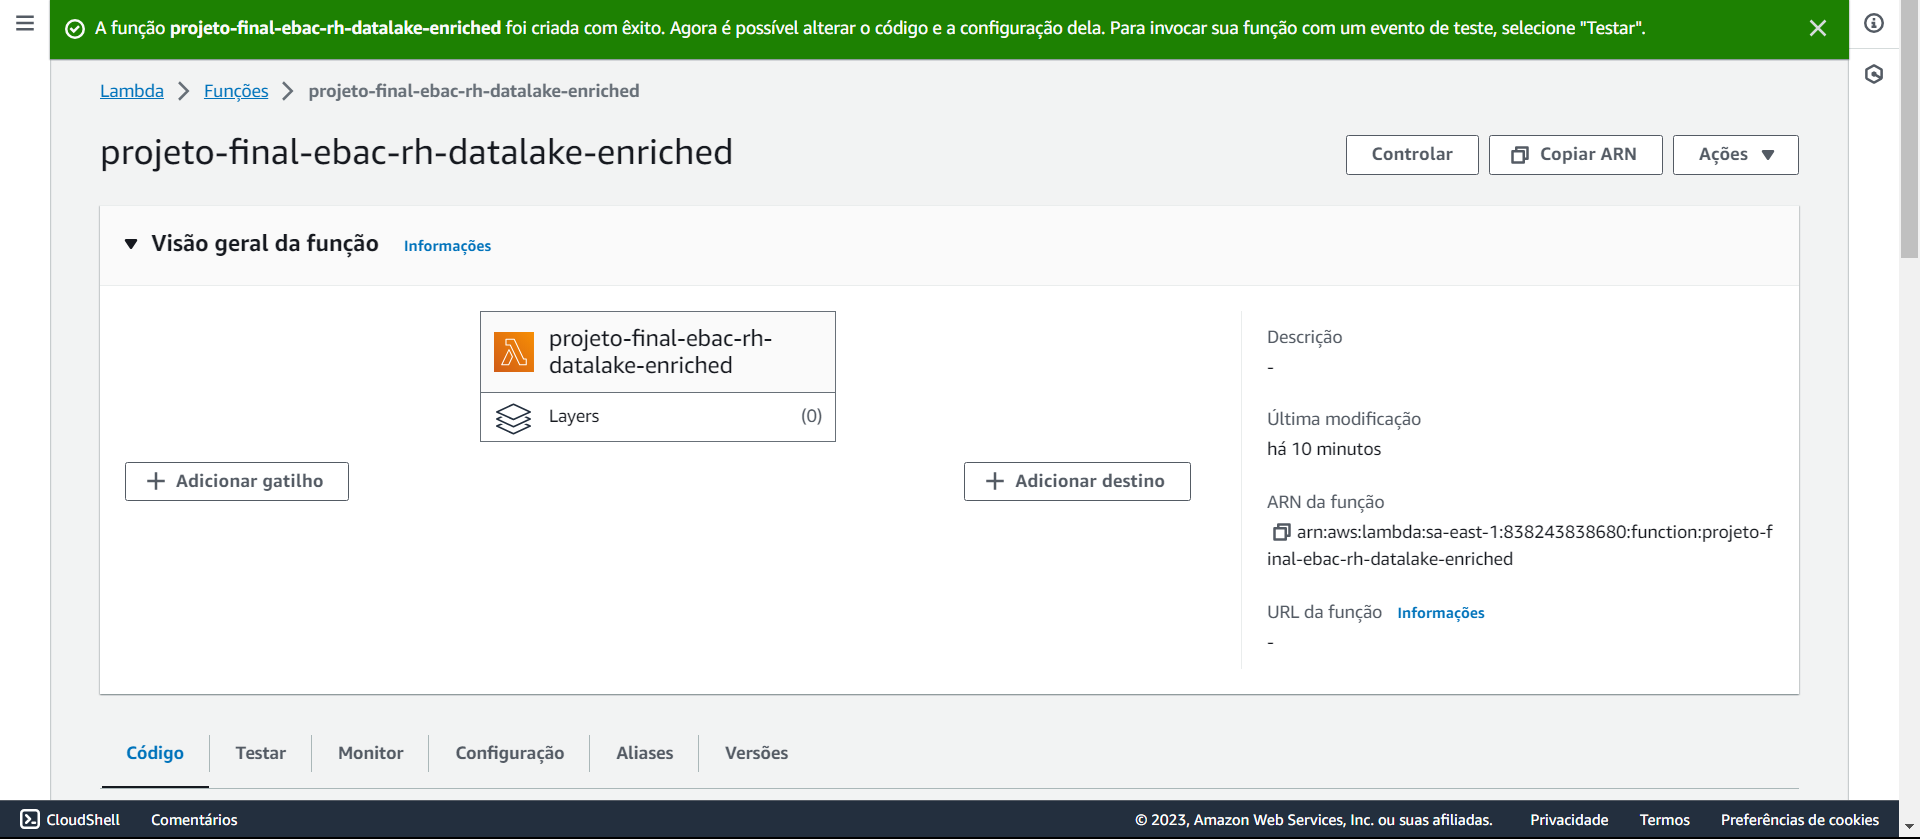

In [ ]:
display(Image(filename='imagem19.png'))

> Aqui temos uma visão geral da nossa função.

O Código da Função:

```python
import os
import json
import logging
from datetime import datetime, timedelta, timezone

import boto3
import pyarrow as pa
import pyarrow.parquet as pq


def lambda_handler(event: dict, context: dict) -> bool:

  '''
  Diariamente é executado para compactar as diversas mensagensm, no formato
  JSON, do dia anterior, armazenadas no bucket de dados cru, em um único
  arquivo no formato PARQUET, armazenando-o no bucket de dados enriquecidos
  '''

  # vars de ambiente

  RAW_BUCKET = os.environ['AWS_S3_BUCKET']
  ENRICHED_BUCKET = os.environ['AWS_S3_ENRICHED']

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  # código principal

  table = None
  client = boto3.client('s3')

  try:

      response = client.list_objects_v2(Bucket=RAW_BUCKET, Prefix=f'telegram/context_date={date}')

      for content in response['Contents']:

        key = content['Key']
        client.download_file(RAW_BUCKET, key, f"/tmp/{key.split('/')[-1]}")

        with open(f"/tmp/{key.split('/')[-1]}", mode='r', encoding='utf8') as fp:

          data = json.load(fp)
          data = data["message"]

        parsed_data = parse_data(data=data)
        iter_table = pa.Table.from_pydict(mapping=parsed_data)

        if table:

          table = pa.concat_tables([table, iter_table])

        else:

          table = iter_table
          iter_table = None

      pq.write_table(table=table, where=f'/tmp/{timestamp}.parquet')
      client.upload_file(f"/tmp/{timestamp}.parquet", ENRICHED_BUCKET, f"telegram/context_date={date}/{timestamp}.parquet")

      return True

  except Exception as exc:
      logging.error(msg=exc)
      return False
```

O código da função de *data wrangling*:

```python
def parse_data(data: dict) -> dict:

  date = datetime.now().strftime('%Y-%m-%d')
  timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

  parsed_data = dict()

  for key, value in data.items():

      if key == 'from':
          for k, v in data[key].items():
              if k in ['id', 'is_bot', 'first_name']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key == 'chat':
          for k, v in data[key].items():
              if k in ['id', 'type']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key in ['message_id', 'date', 'text']:
          parsed_data[key] = [value]

  if not 'text' in parsed_data.keys():
    parsed_data['text'] = [None]

  return parsed_data
  
```

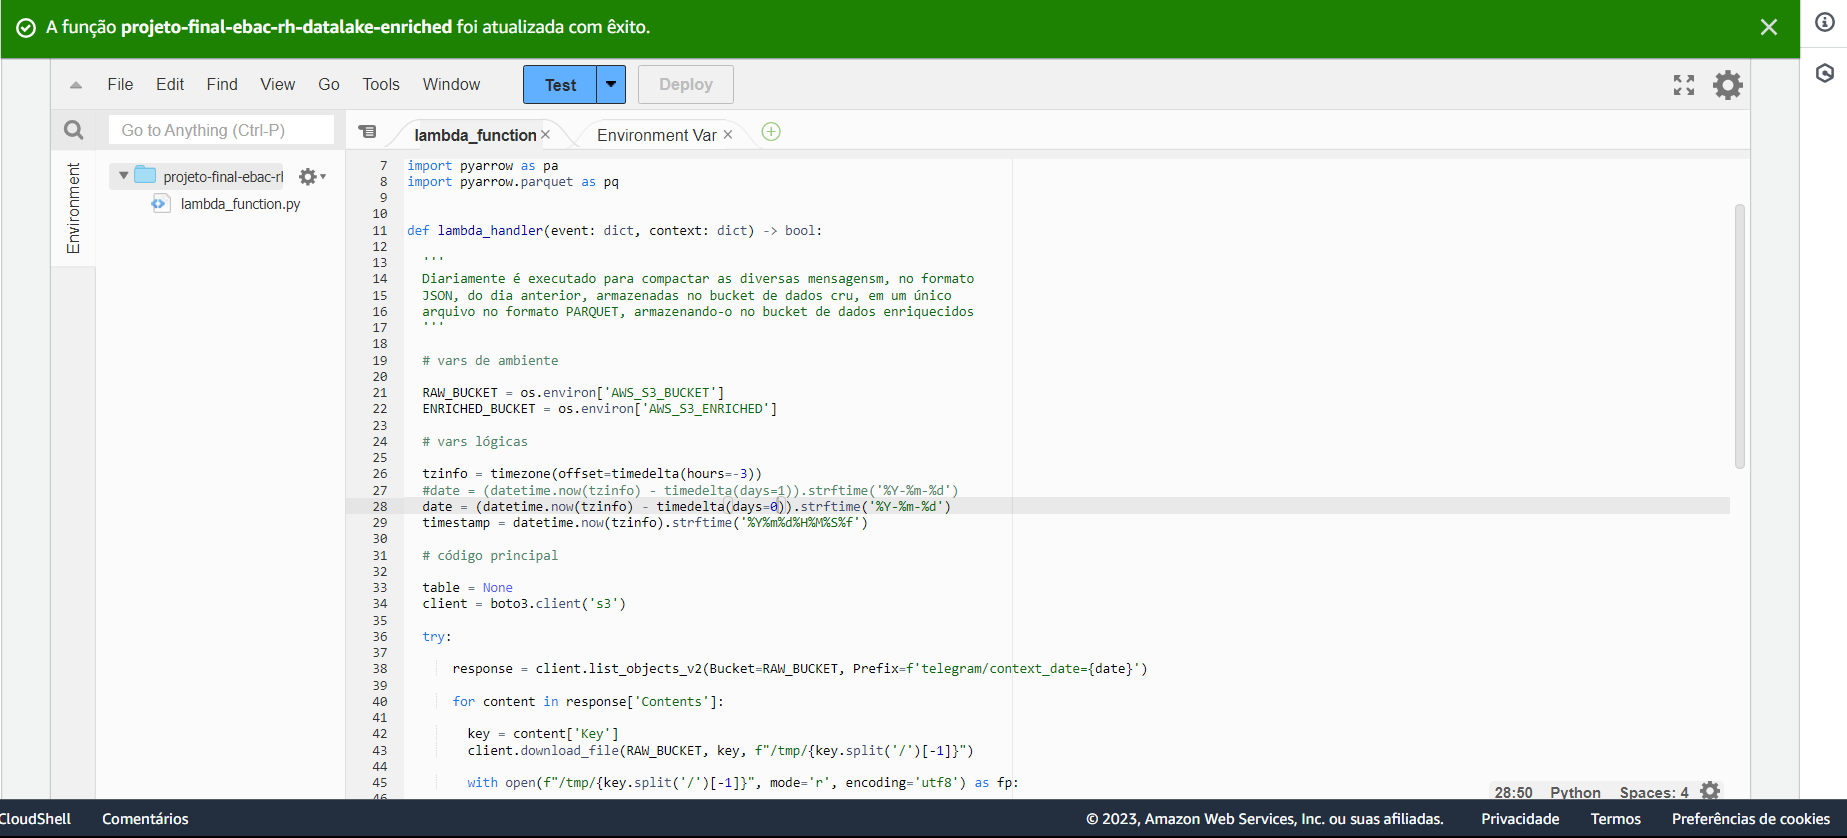

In [ ]:
display(Image(filename='imagem20.png'))

> Acima colamos os códigos da função. E como anteriormente precisamos fazer algumas configurações antes de executar.



*   **Variáveis de Ambiente**



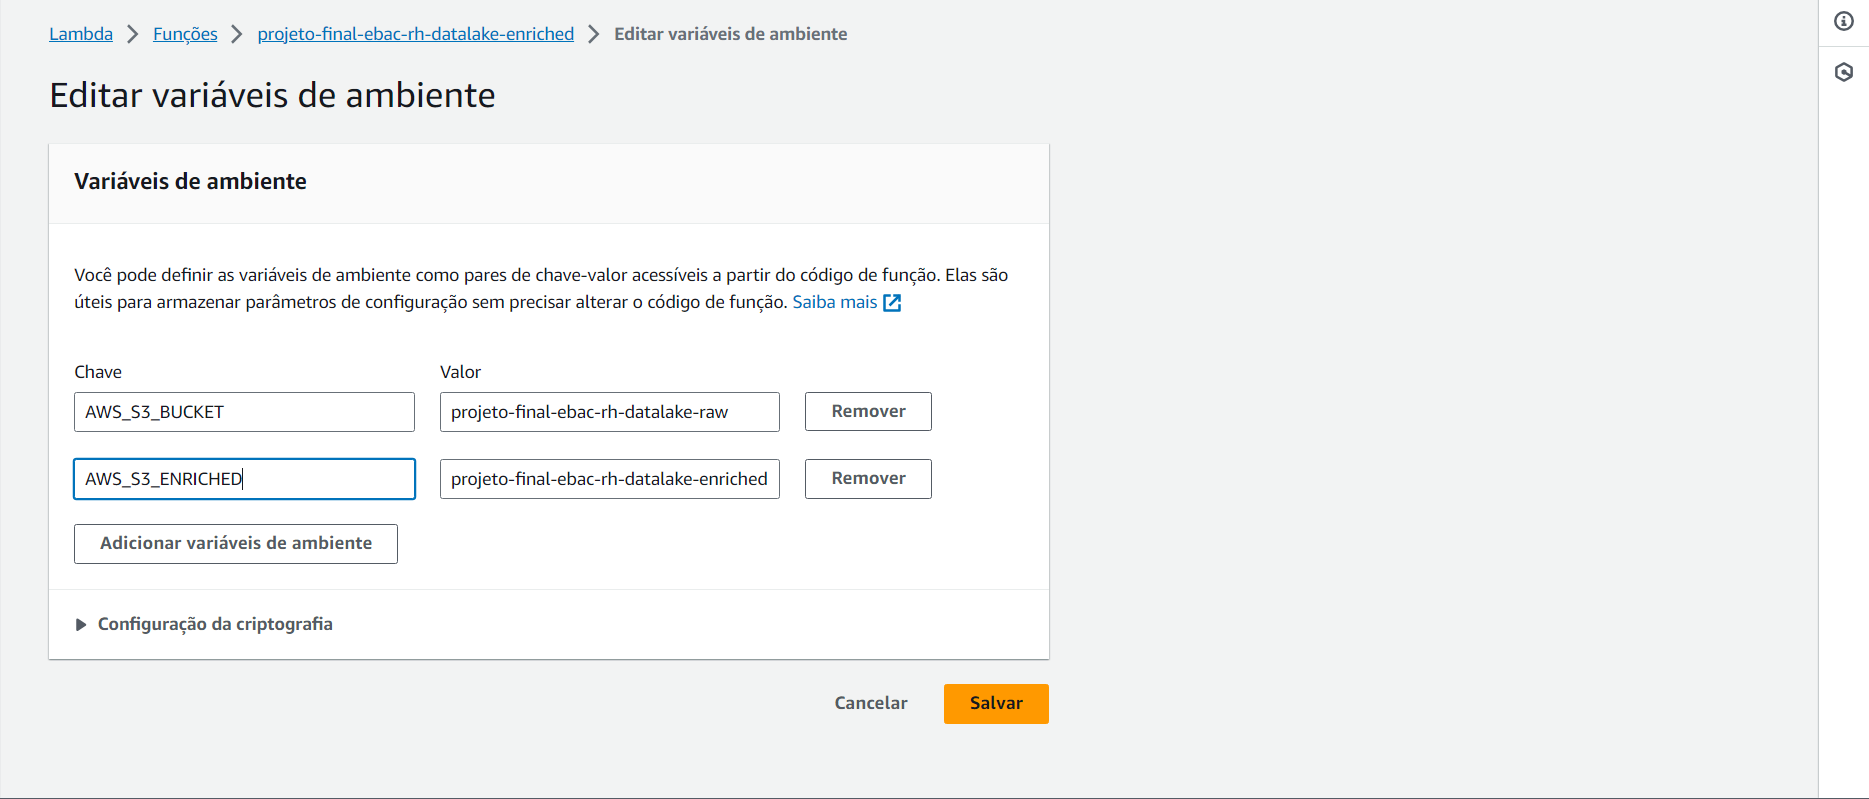

In [ ]:
display(Image(filename='imagem21.png'))

> Nessa parte estamos adicionamos nossas variáveis de ambiente: `AWS_S3_BUCKET` e `AWS_S3_ENRICHED`, referente aos nossos buckets: `projeto-final-ebac-rh-datalake-raw` e  `projeto-final-ebac-rh-datalake-enriched`.

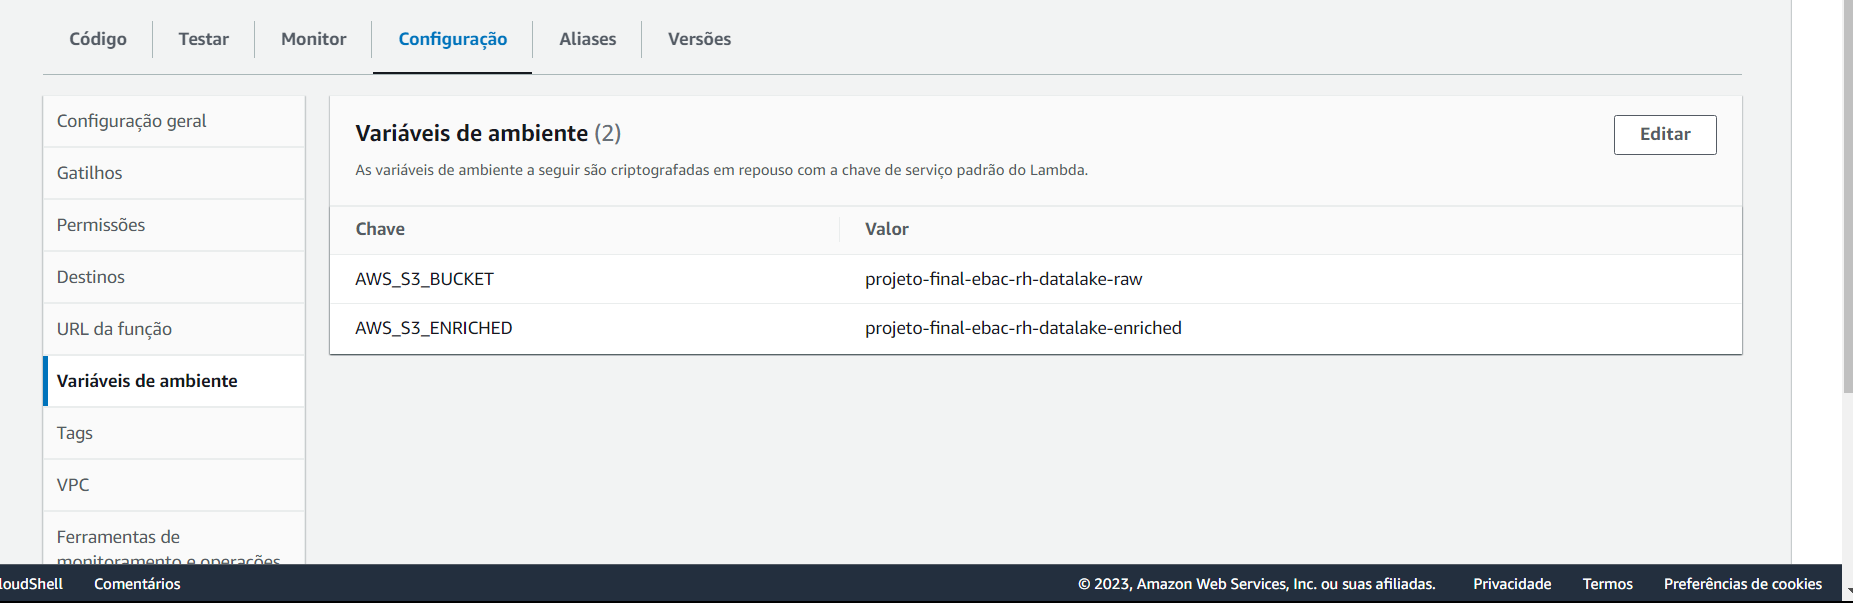

In [ ]:
display(Image(filename='imagem22.png'))

> Variáveis de ambiente criadas.

* **Permissão**

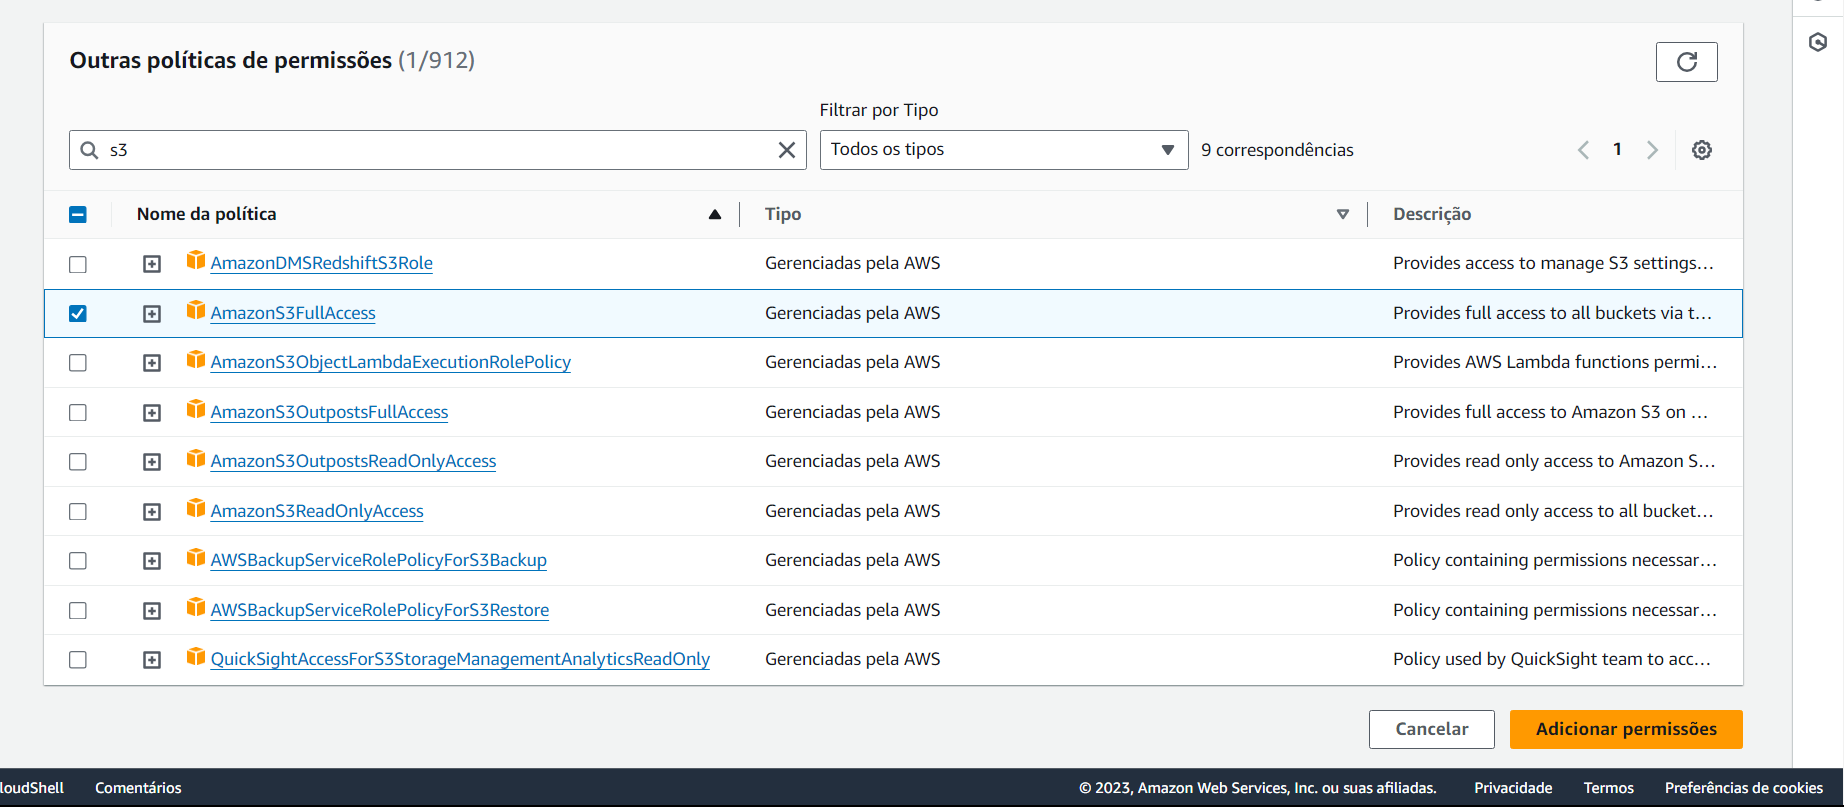

In [ ]:
display(Image(filename='imagem23.png'))

> No `AWS IAM` temos que adicionar a permissão de escrita nos buckets do `AWS S3` para a função do `AWS Lambda`.

* **Recursos**

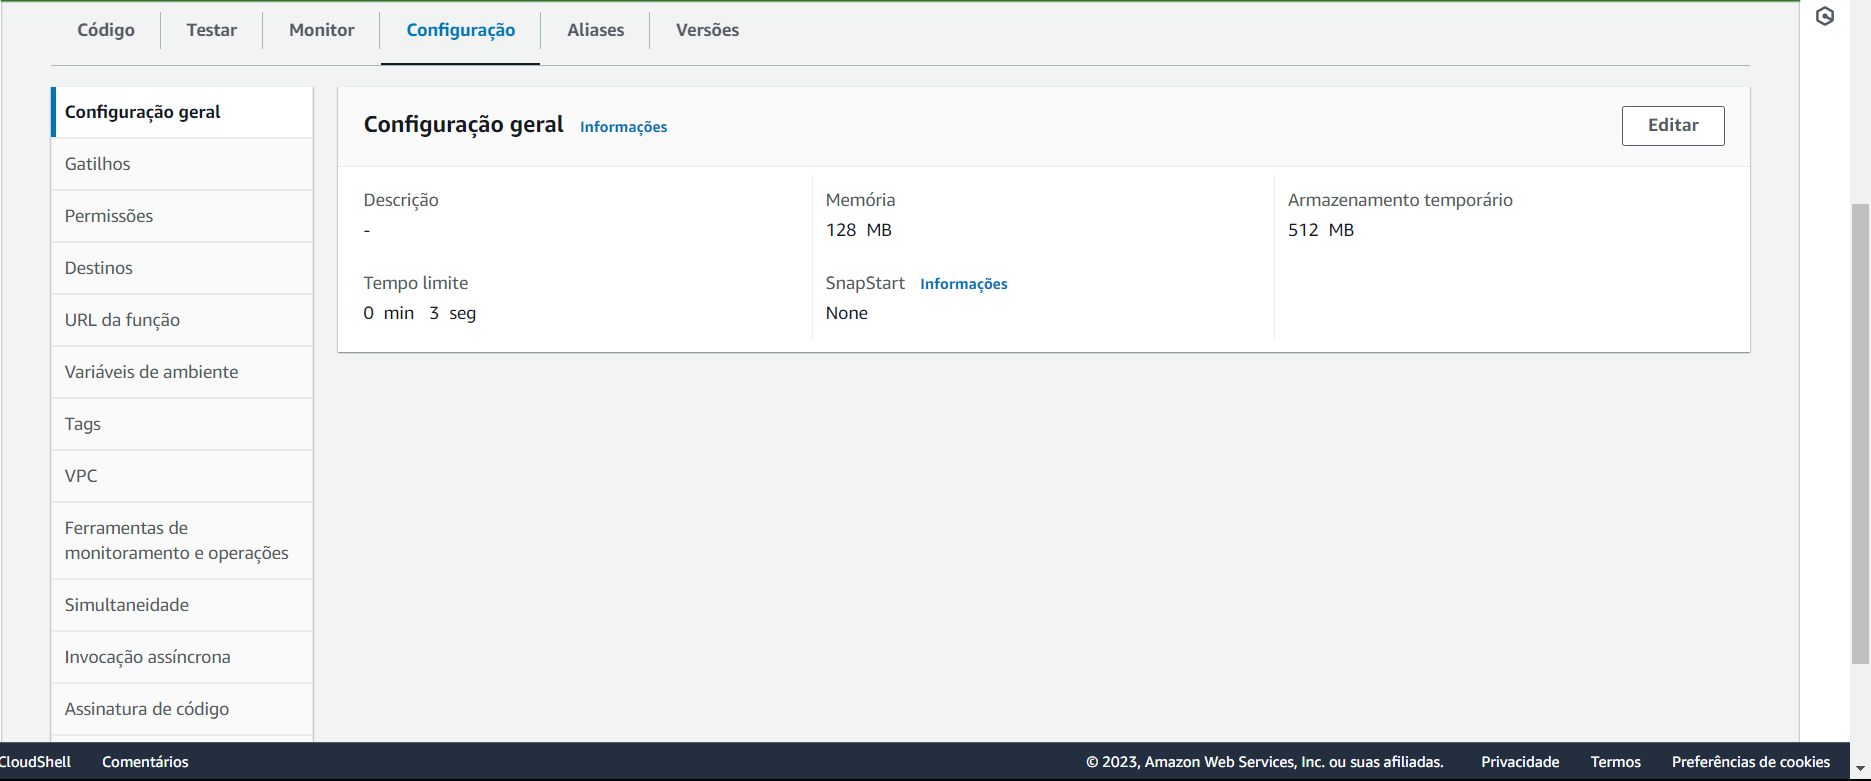

In [ ]:
display(Image(filename='imagem24.png'))

>O *timeout* padrão de funcões do `AWS Lambda` é de 3 segundos.

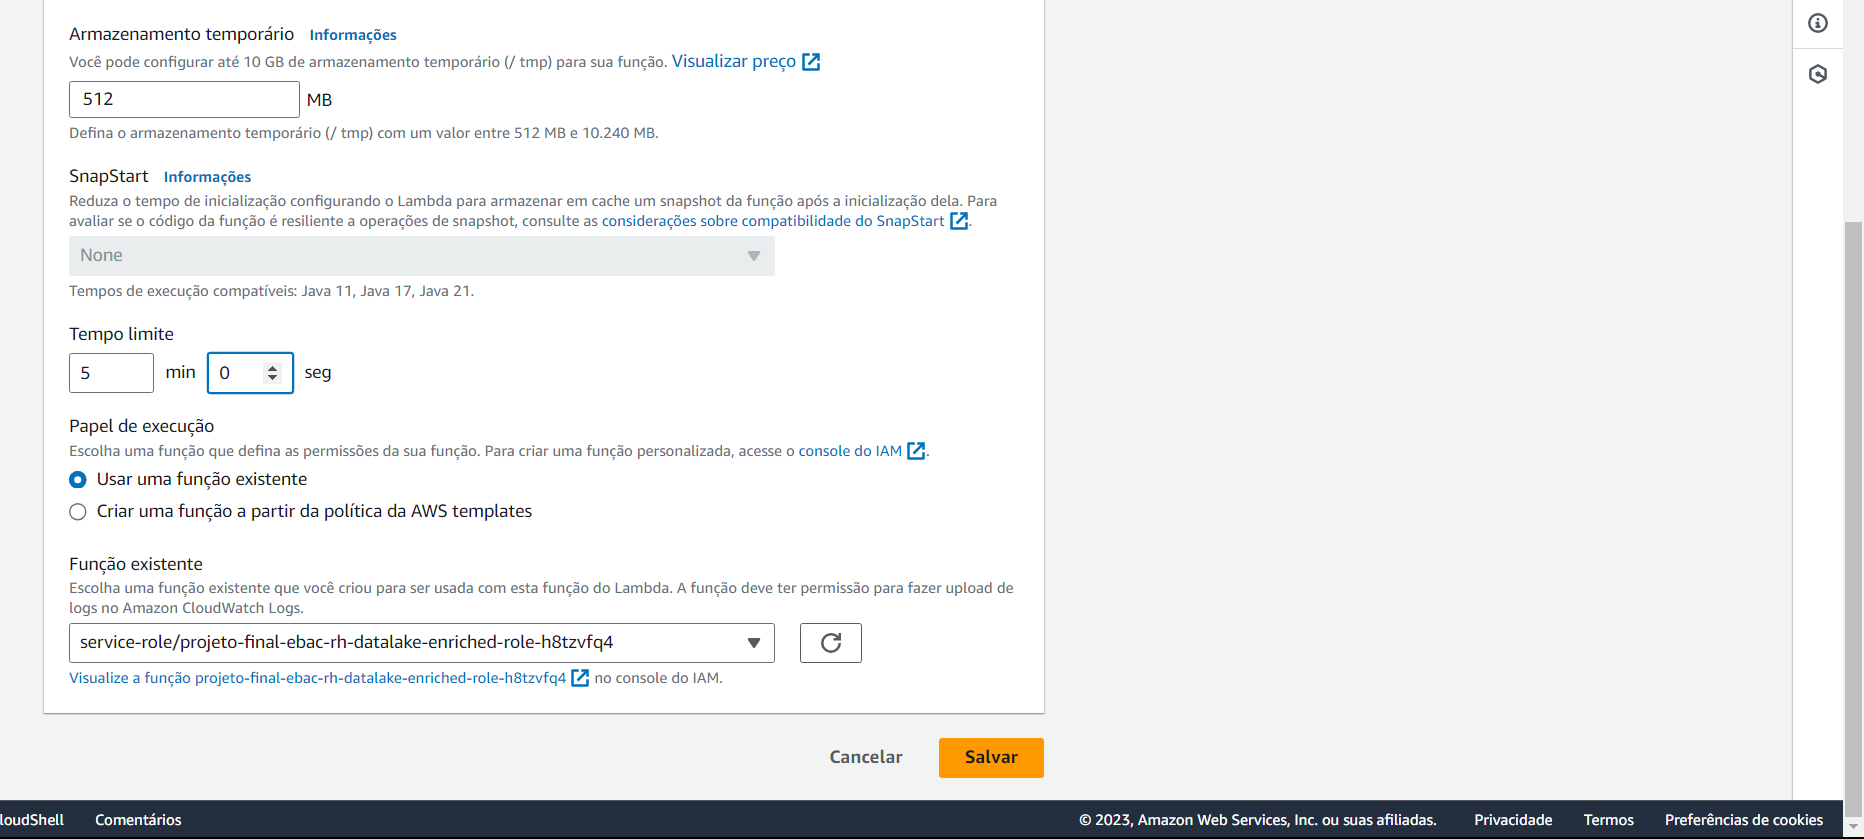

In [ ]:
display(Image(filename='imagem25.png'))

>  Para a função, vamos aumentar o tempo para 5 minutos, principalmente para lidar com o IO (*input/output*) de arquivos do `AWS S3`.

* **Camadas**

Para adicionar pacotes externos no ambiente de execução do AWS Lambda, é necessário criar uma camada ou layer. Uma camada é um pacote de código Python que pode ser compartilhado por várias funções do Lambda.
 Para criar uma camada a partir de um bucket do `AWS S3`, é necessário:

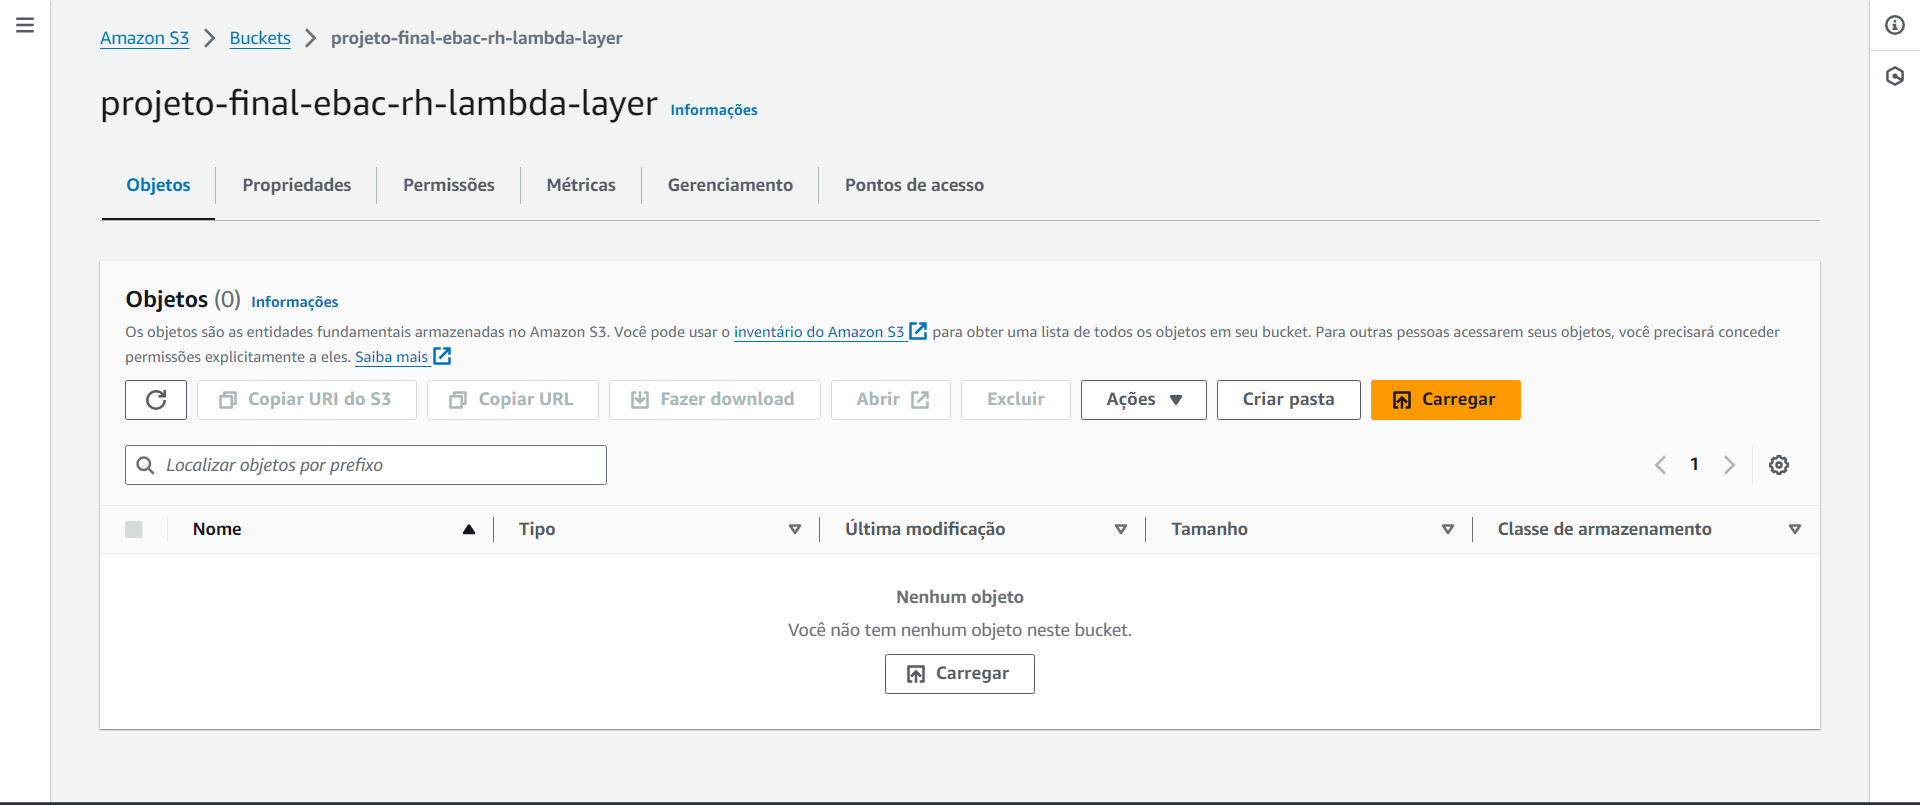

In [ ]:
display(Image(filename='imagem26.png'))

> Aqui criamos o bucket que iremos armazenar o pacote do código fonte do PyArrow.

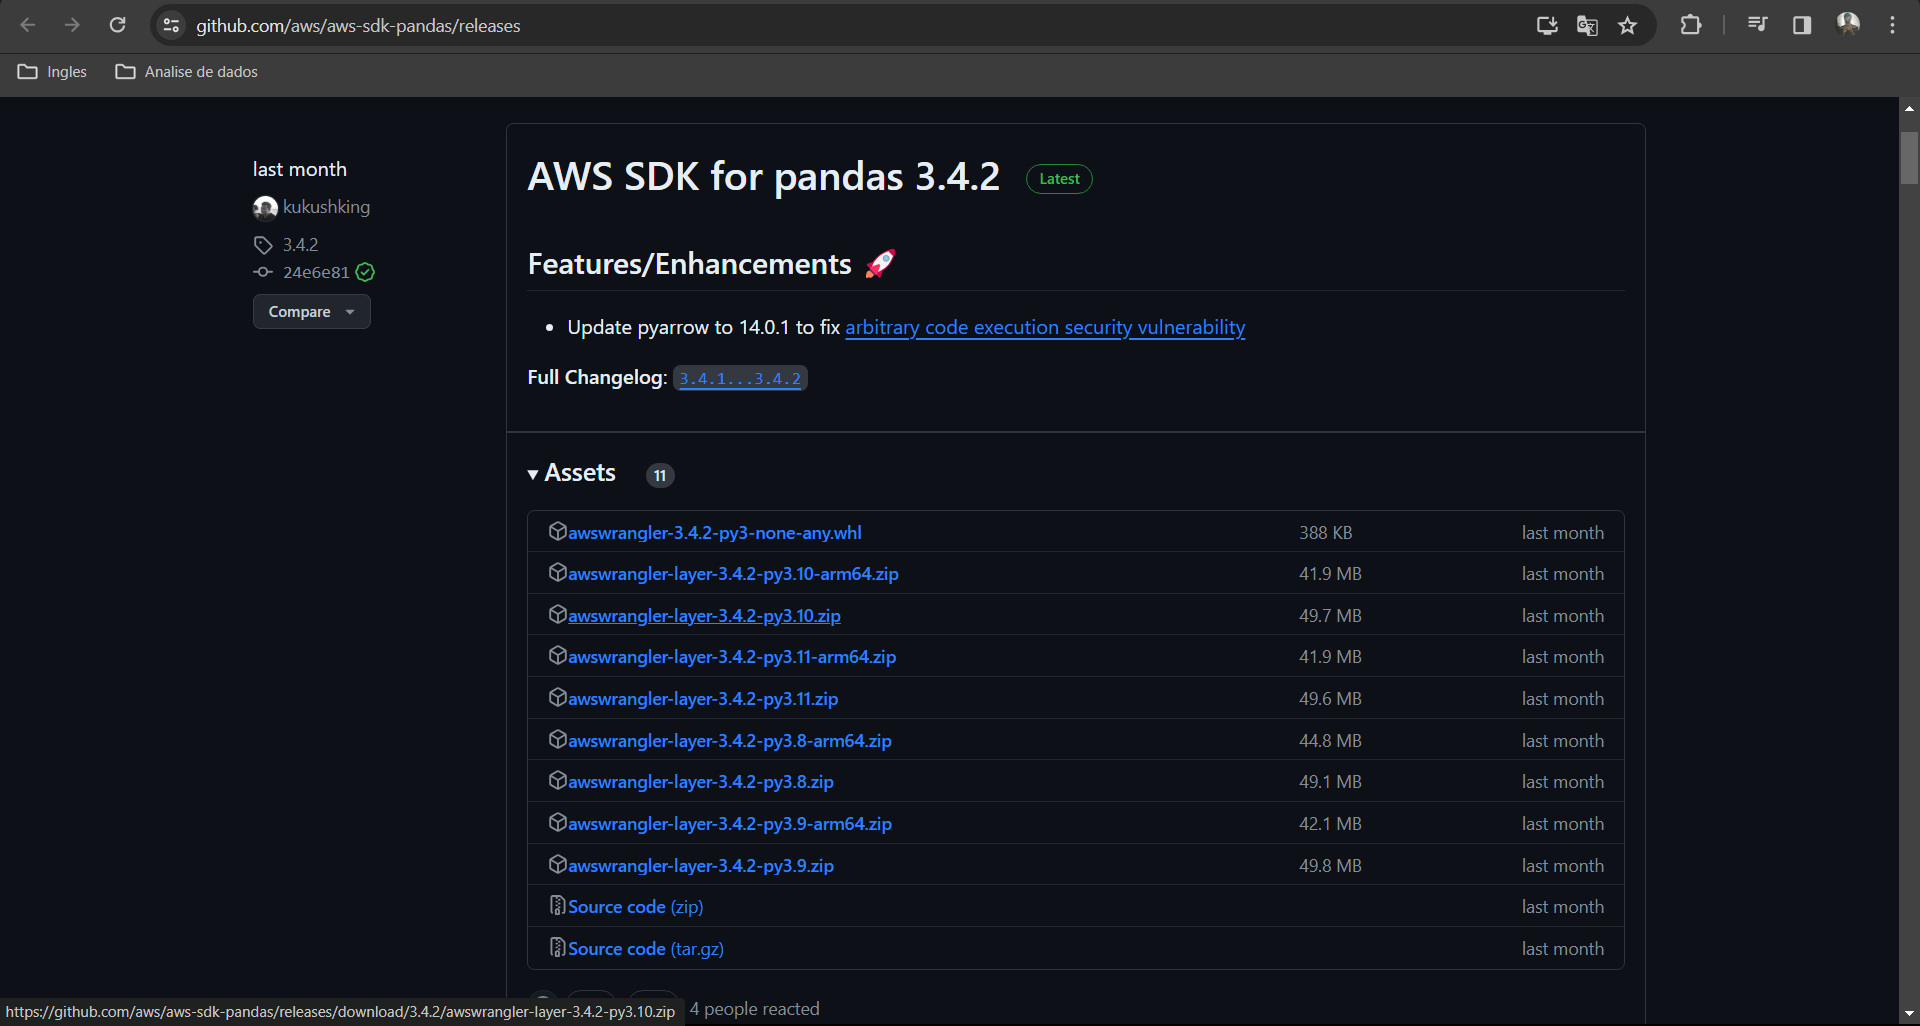

In [ ]:
display(Image(filename='imagem27.png'))

> Aqui estamos baixando um arquivo com os pacotes Python do código-fonte do Pyarrow de interesse. Fazer o *upload* do código do pacote Python do PyArrow (*download* neste [link](https://github.com/awslabs/aws-data-wrangler/releases))

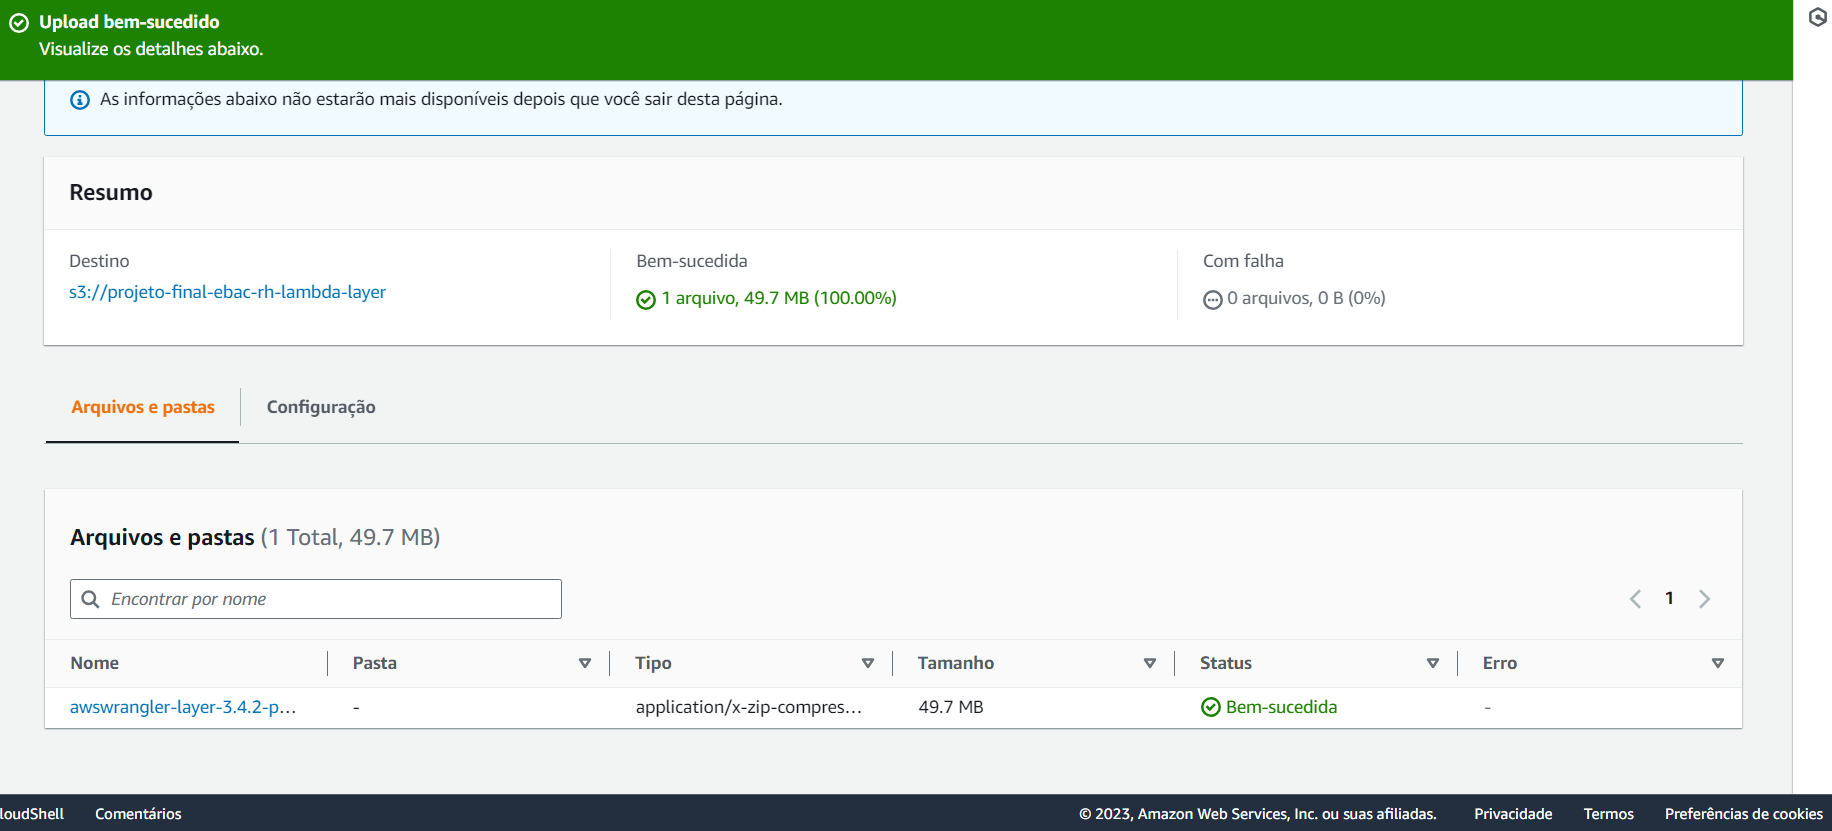

In [ ]:
display(Image(filename='imagem28.png'))

> Carregamos o arquivo no bucket, agora temos que acessar a função lambda e carregar a layer.

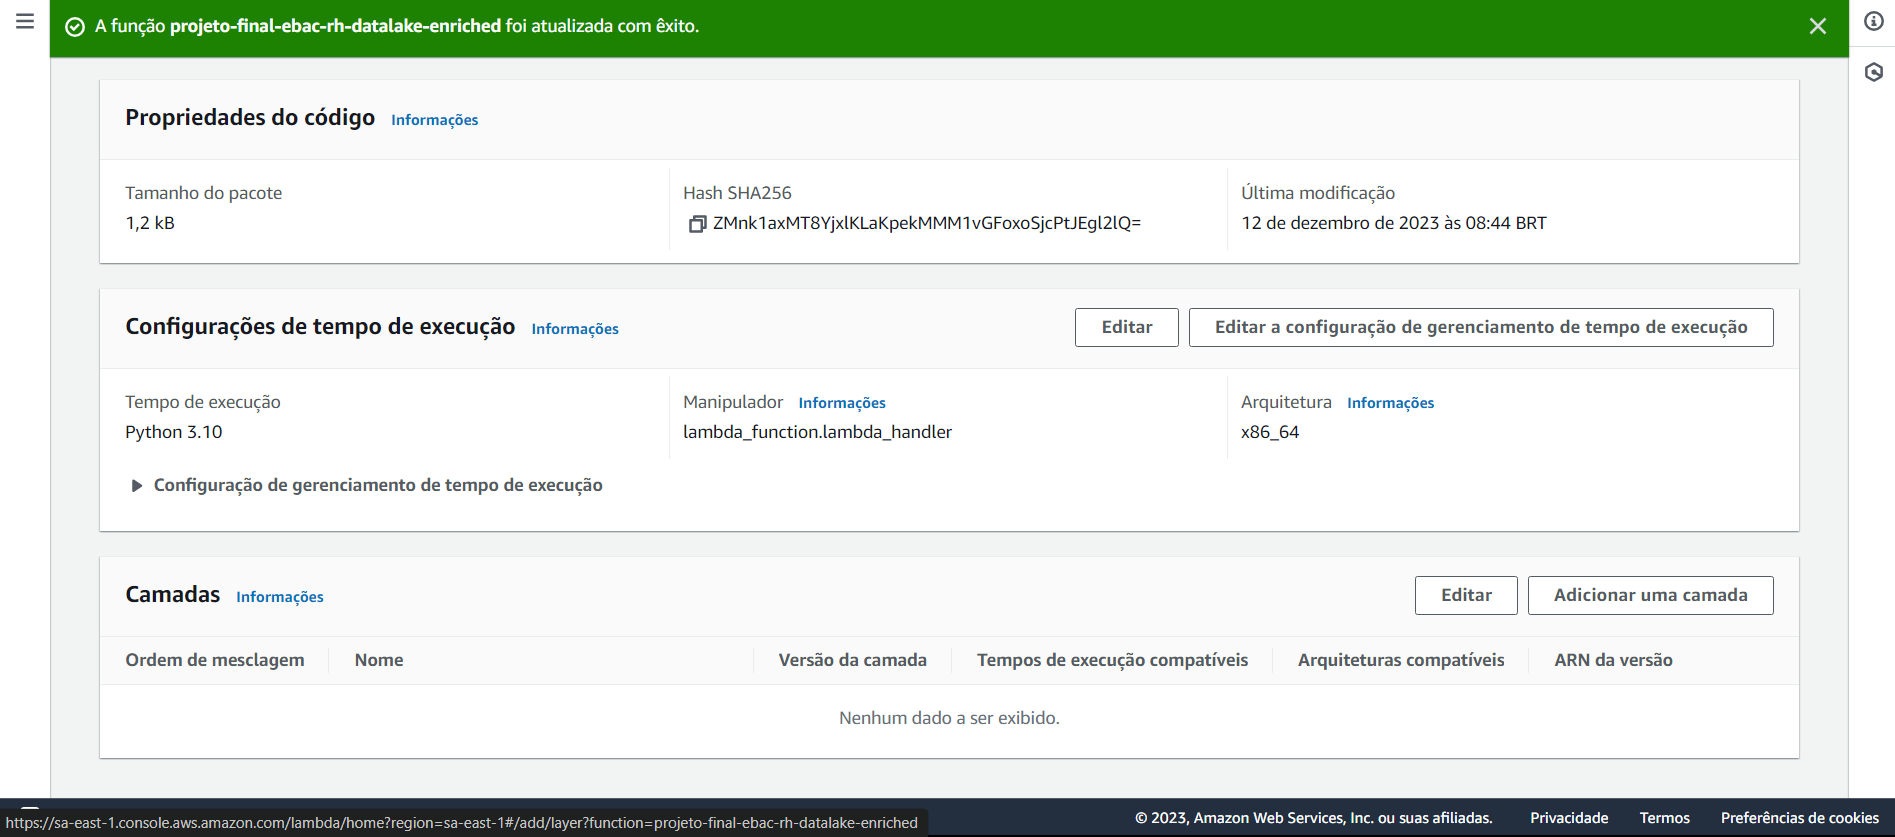

In [ ]:
display(Image(filename='imagem29.png'))

> Aqui clicamos em adicionar uma camada.

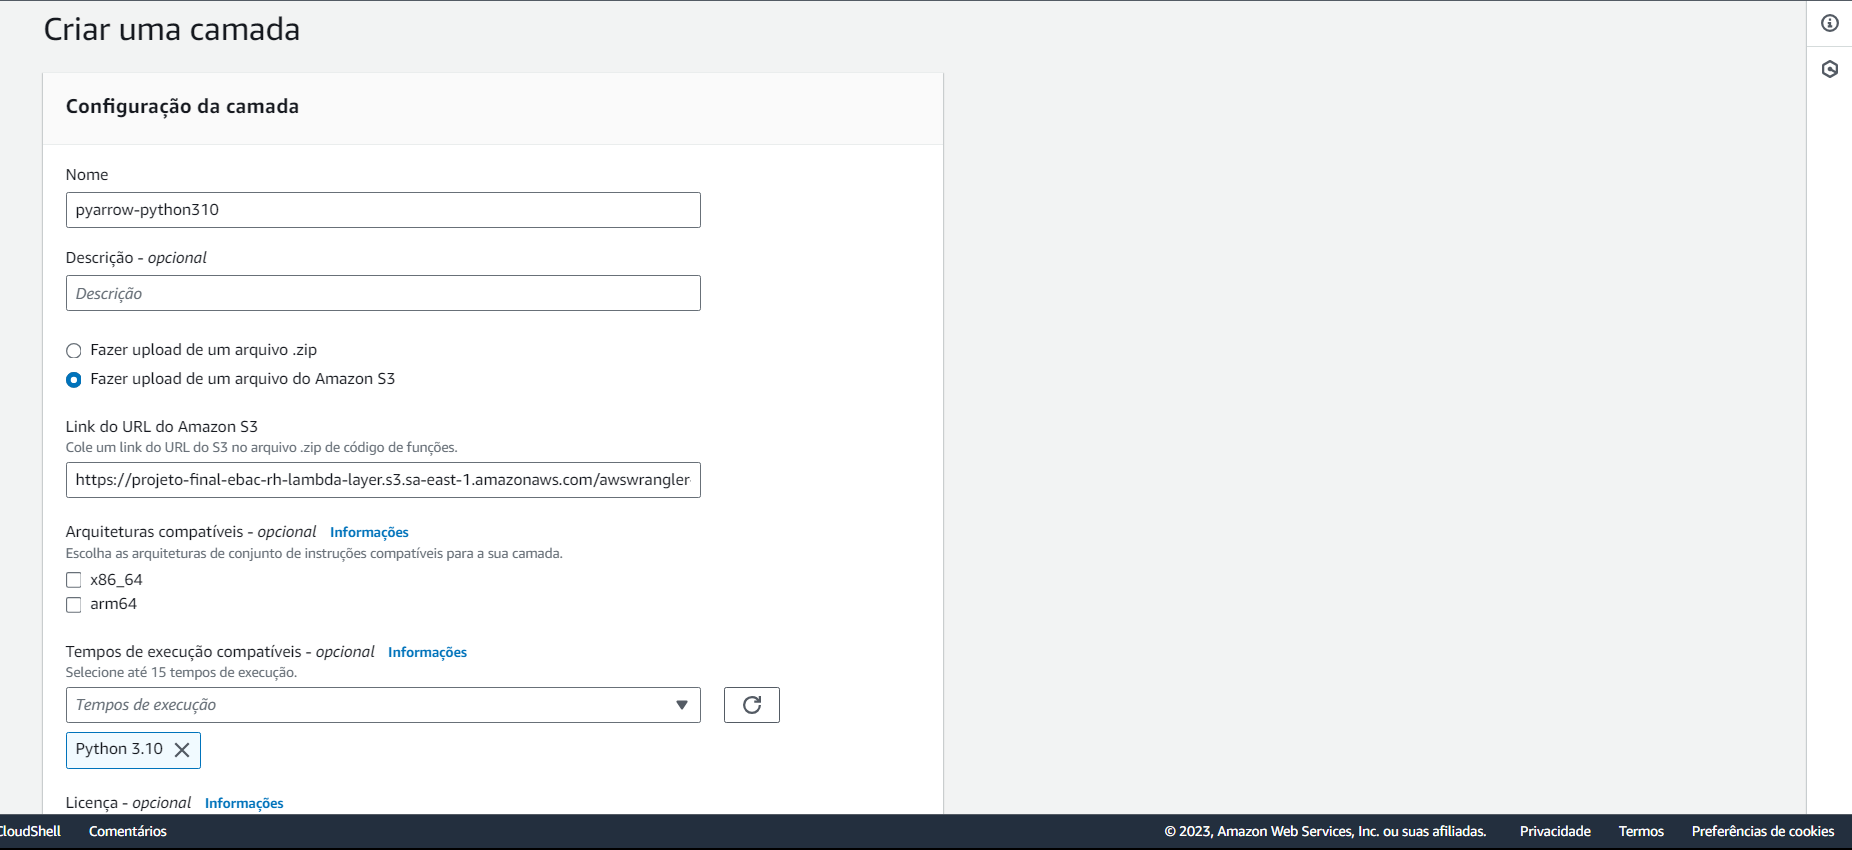

In [ ]:
display(Image(filename='imagem30.png'))

> Como não temos nenhuma camada, temos que criar uma e passar como caminho o link do bucket que armazenamos o código fonte do PyArrow.

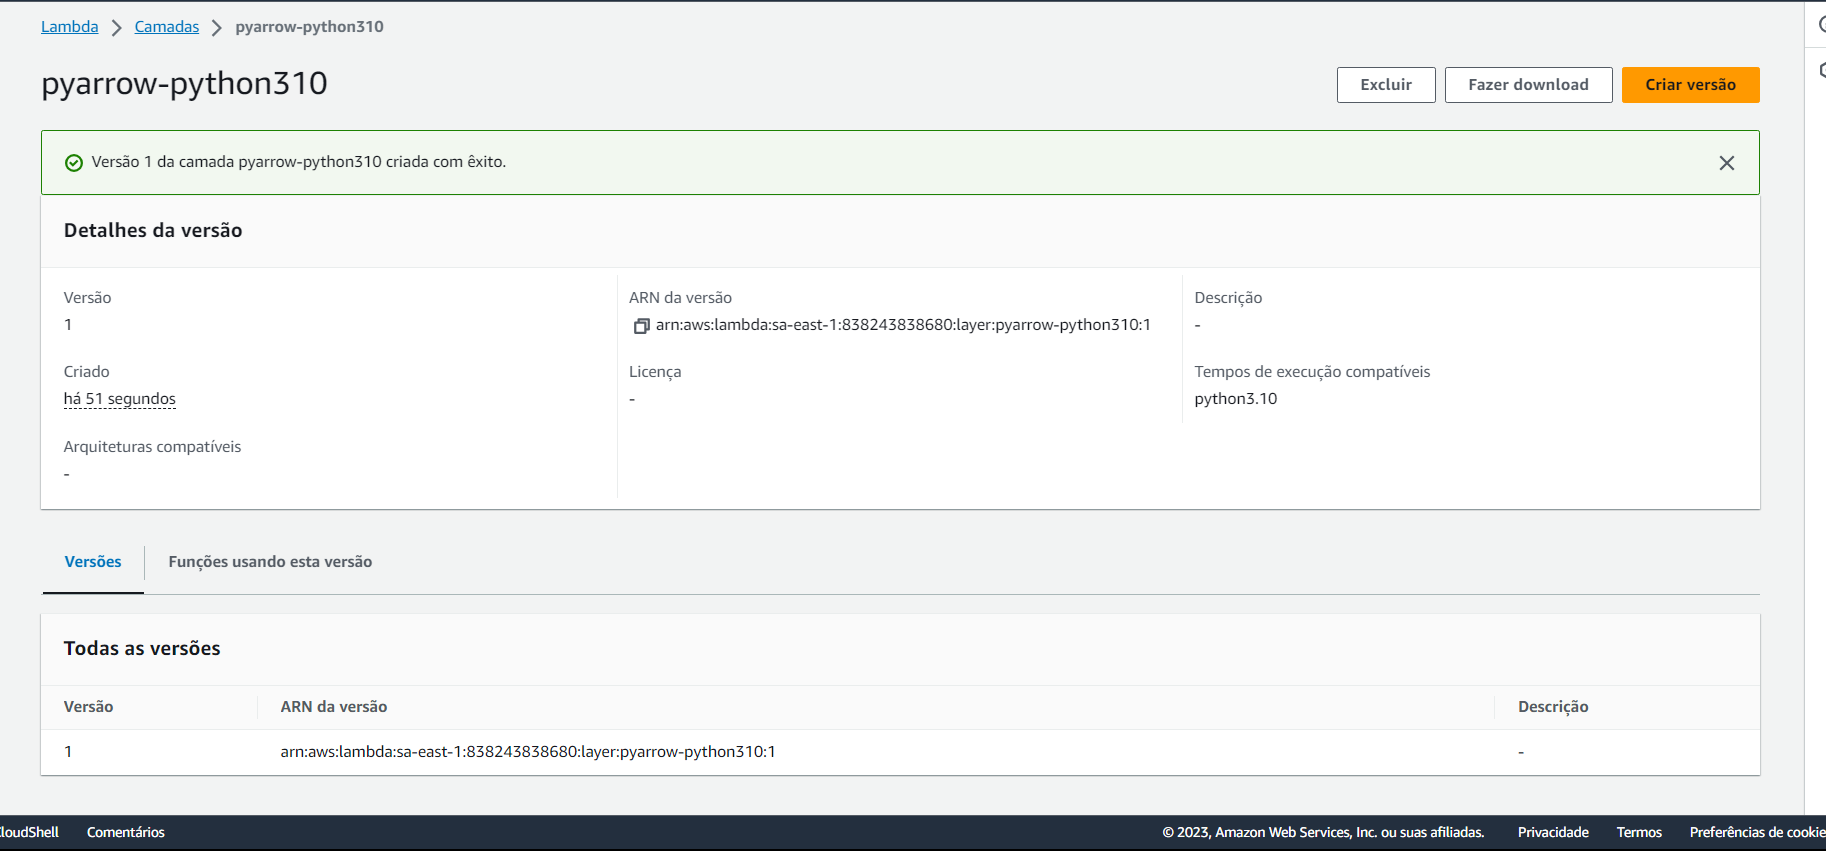

In [ ]:
display(Image(filename='imagem31.png'))

> Aqui temos uma visão geral da nossa camada, criada com sucesso.

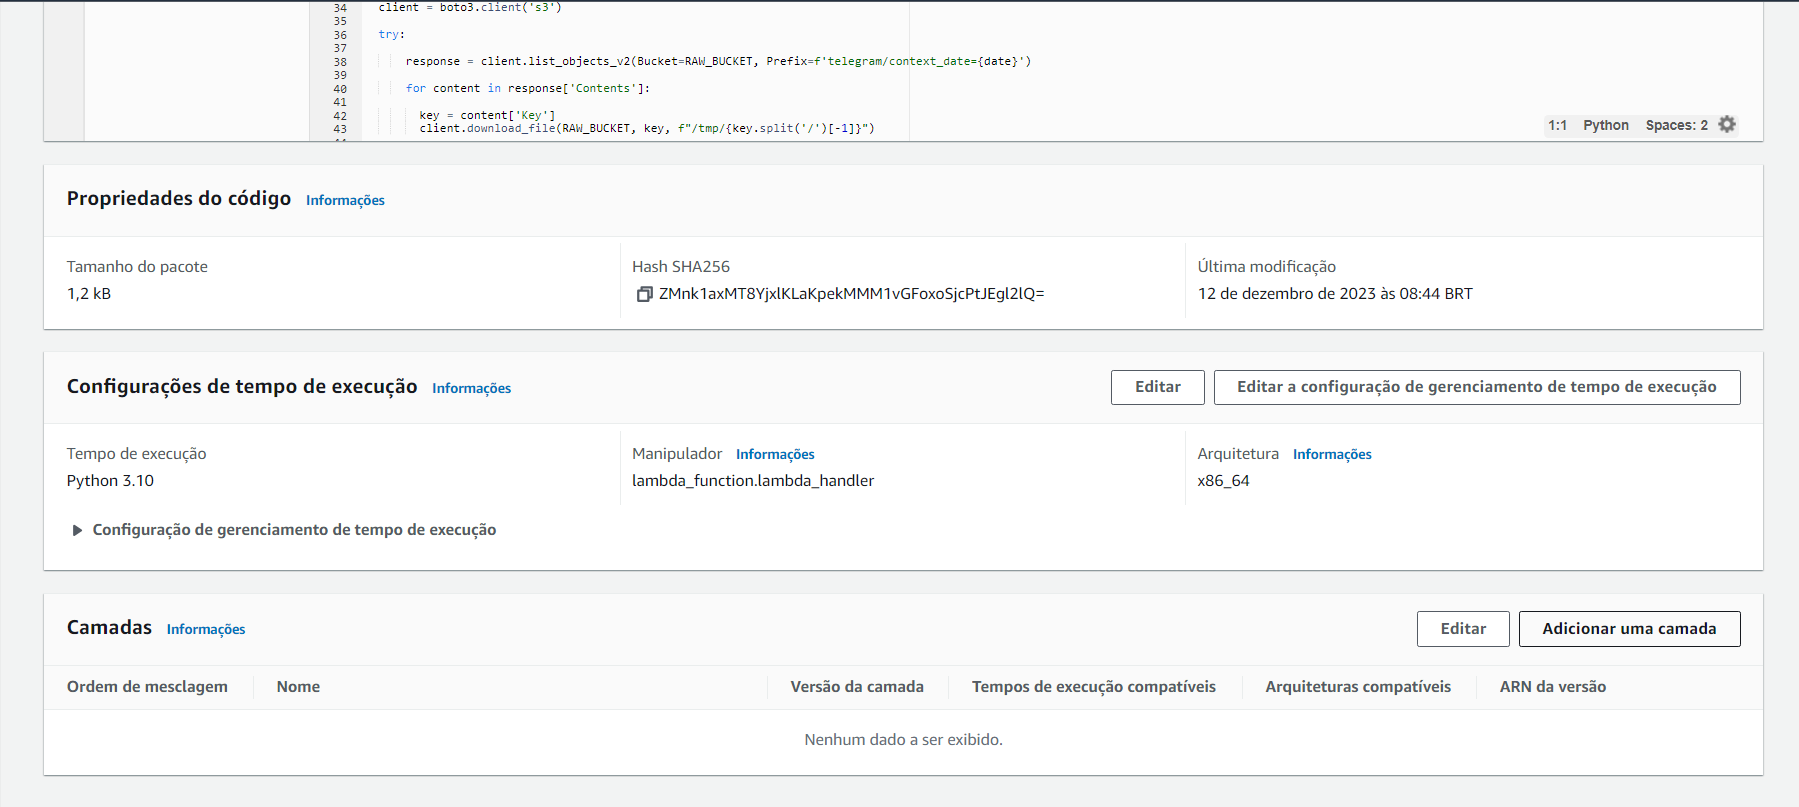

In [ ]:
display(Image(filename='imagem32.png'))

> Agora temos que ir em adicionar uma camada novamente.

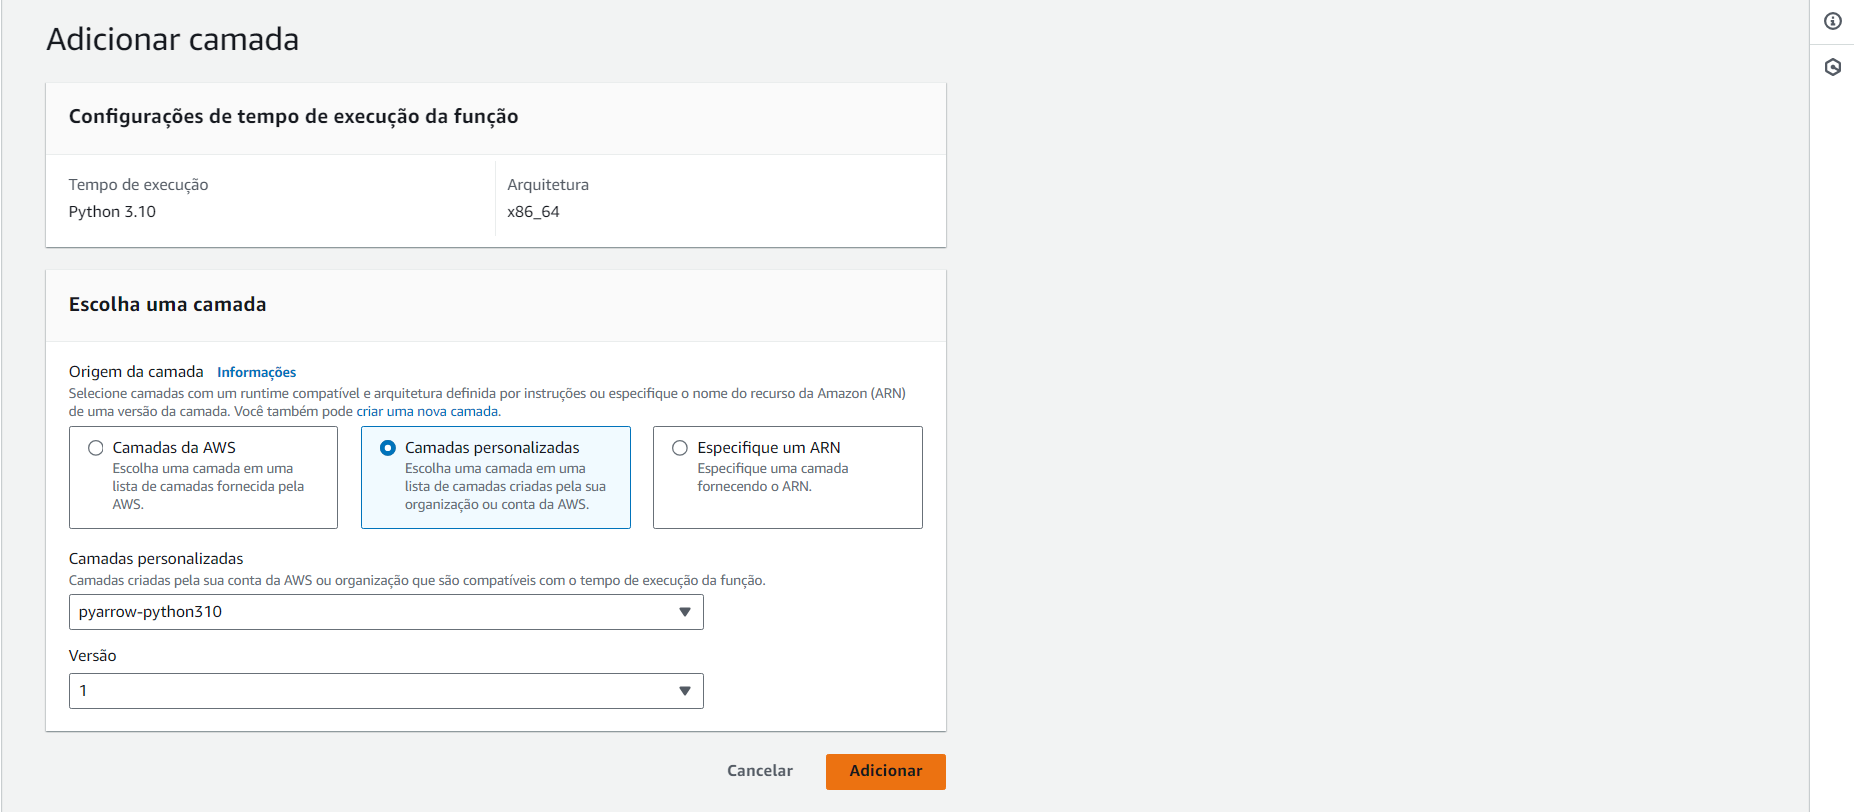

In [ ]:
display(Image(filename='imagem33.png'))

> Selecionamos camada personalizada e escolhemos a nossa camada criada. Assim conectamos nossa função com a camada que acabamos de criar.

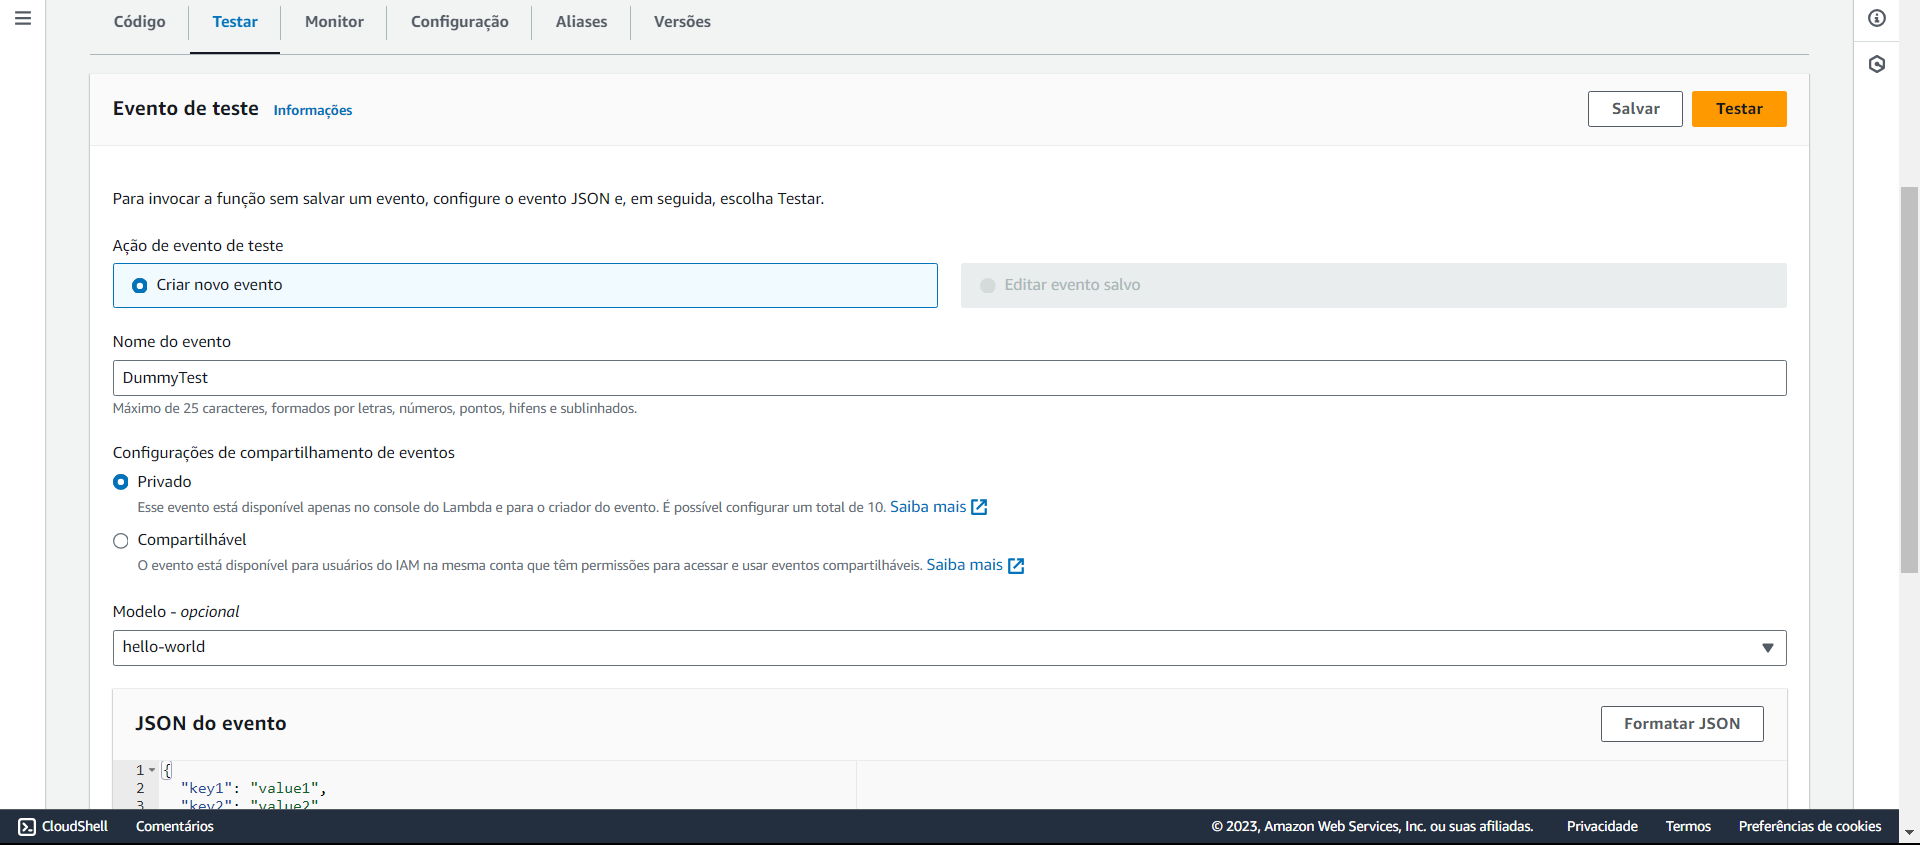

In [ ]:
display(Image(filename='imagem34.png'))

> Com a função lambda totalmente configurada, está na hora de configuramos o ambiente de teste.

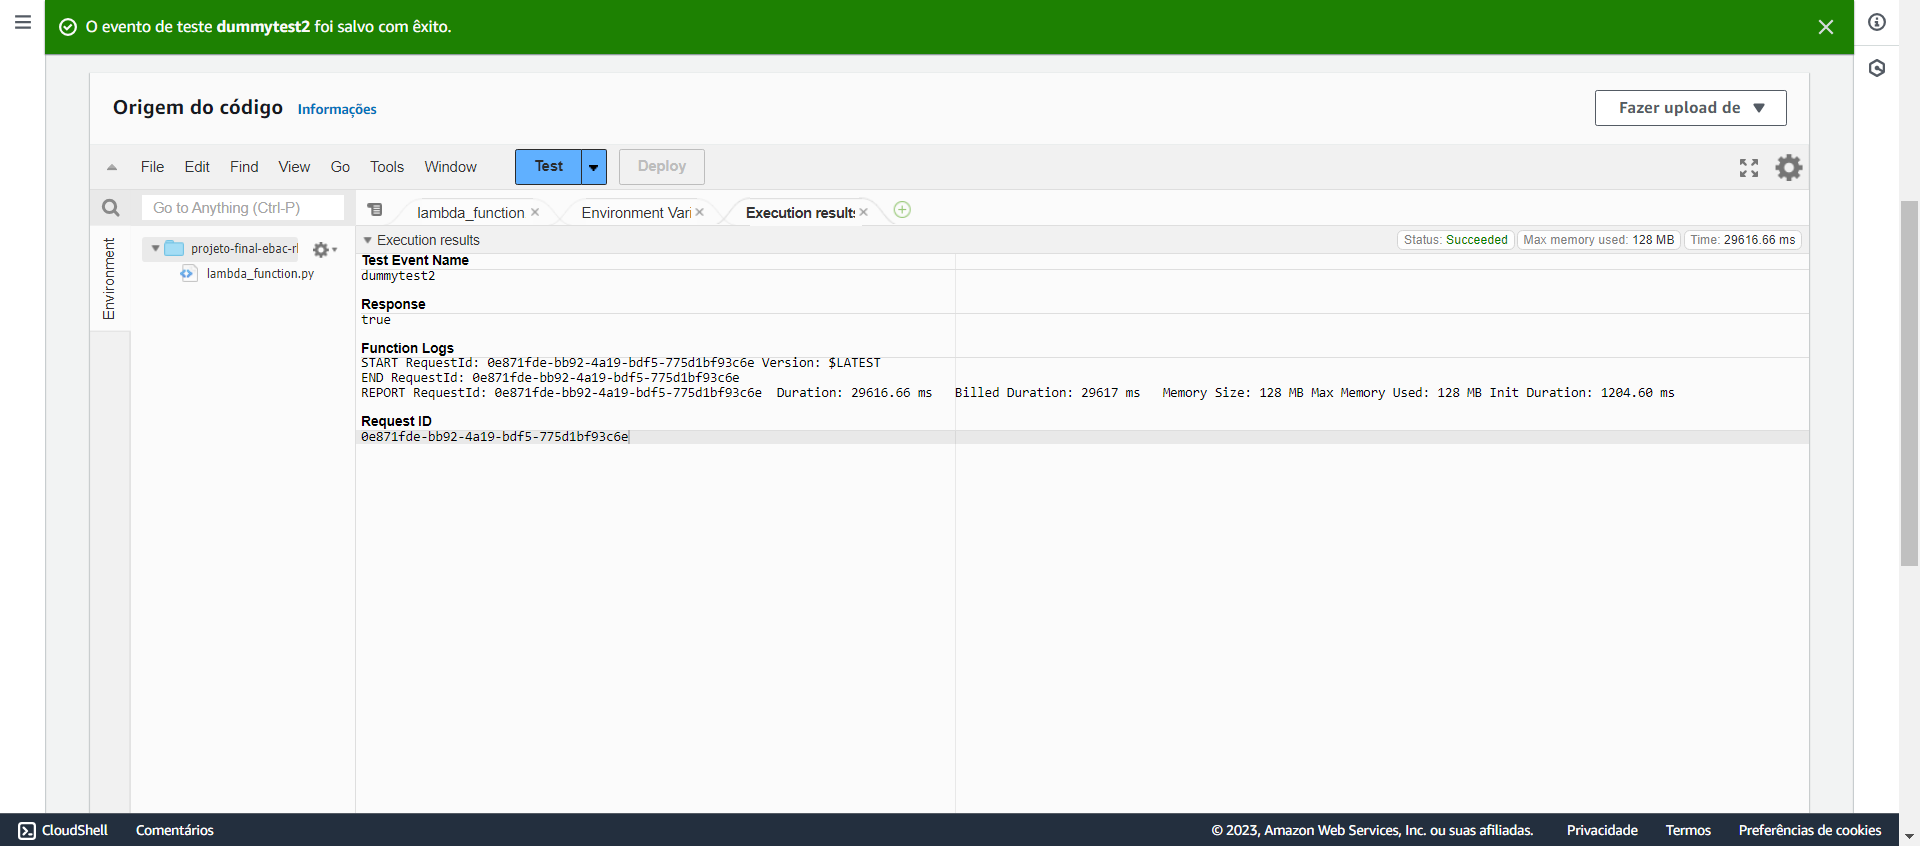

In [ ]:
display(Image(filename='imagem36.png'))

> Recebemos como resposta do teste um "true", o que significa que chegamos ao final do processo.

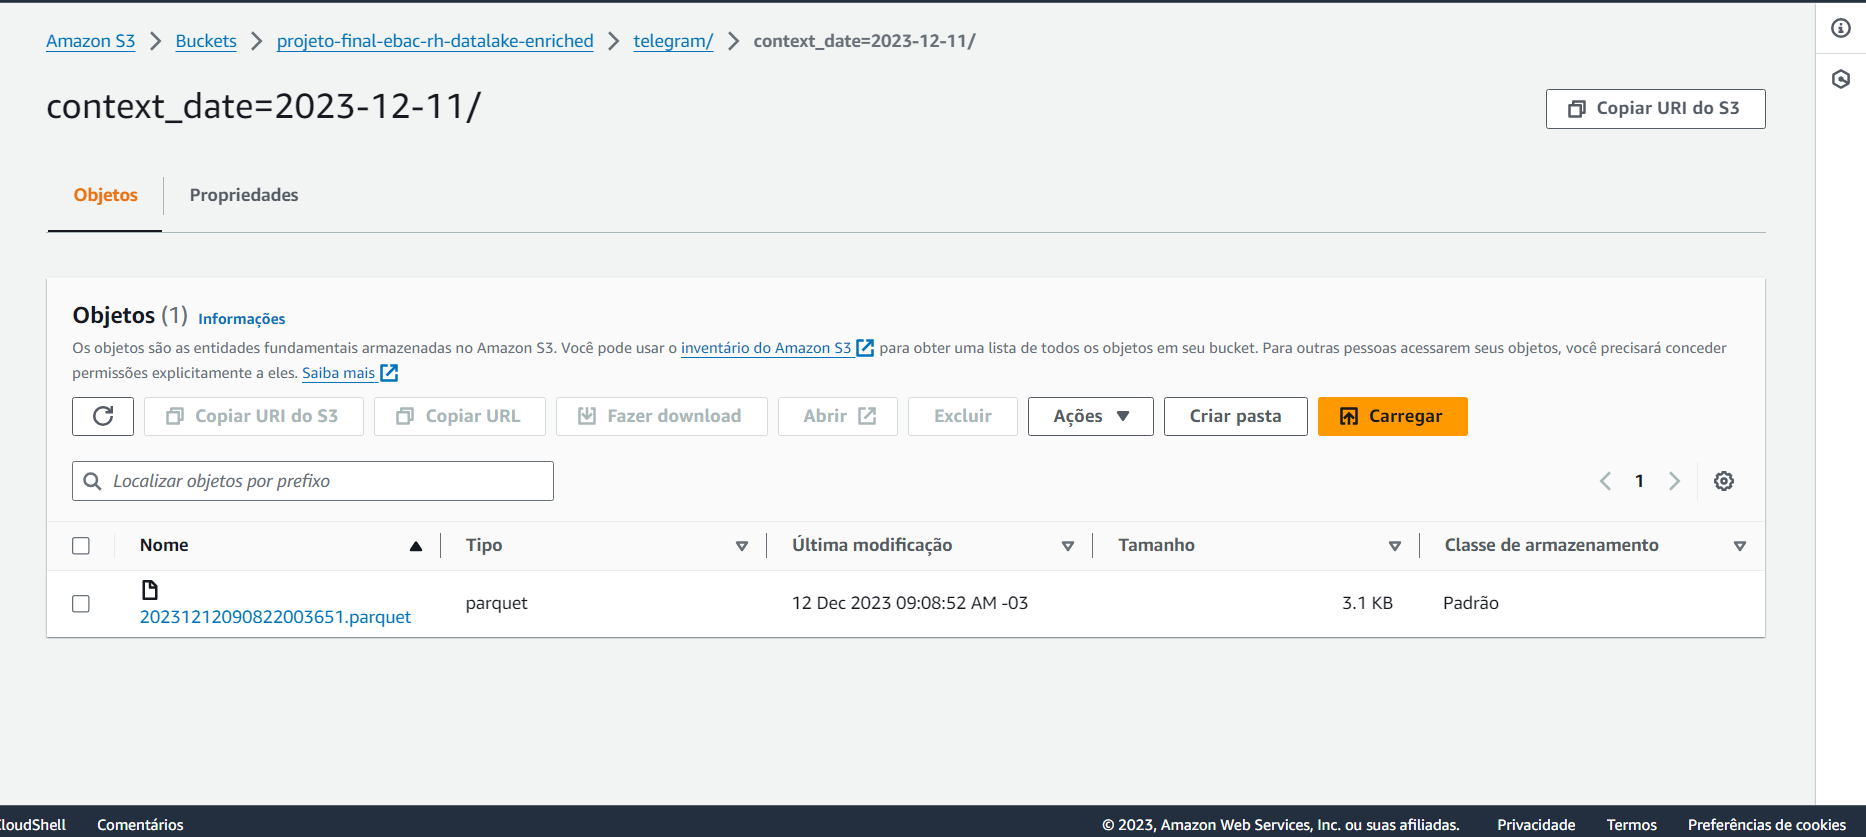

In [ ]:
display(Image(filename='imagem37.png'))

> Ao irmos no bucket de dados enriquecidos, vemos que tudo ocorreu conforma planejado e temos o arquivo parquet referente as mensagens produzidas.

### AWS Event Bridge

Na etapa de **ETL**, o `AWS Event Bridge` tem a função de ativar diariamente a função de **ETL** do `AWS Lambda`, funcionando assim como um *scheduler*.

> **Nota**: Atente-se ao fato de que a função processa as mensagens do dia anterior (D-1).

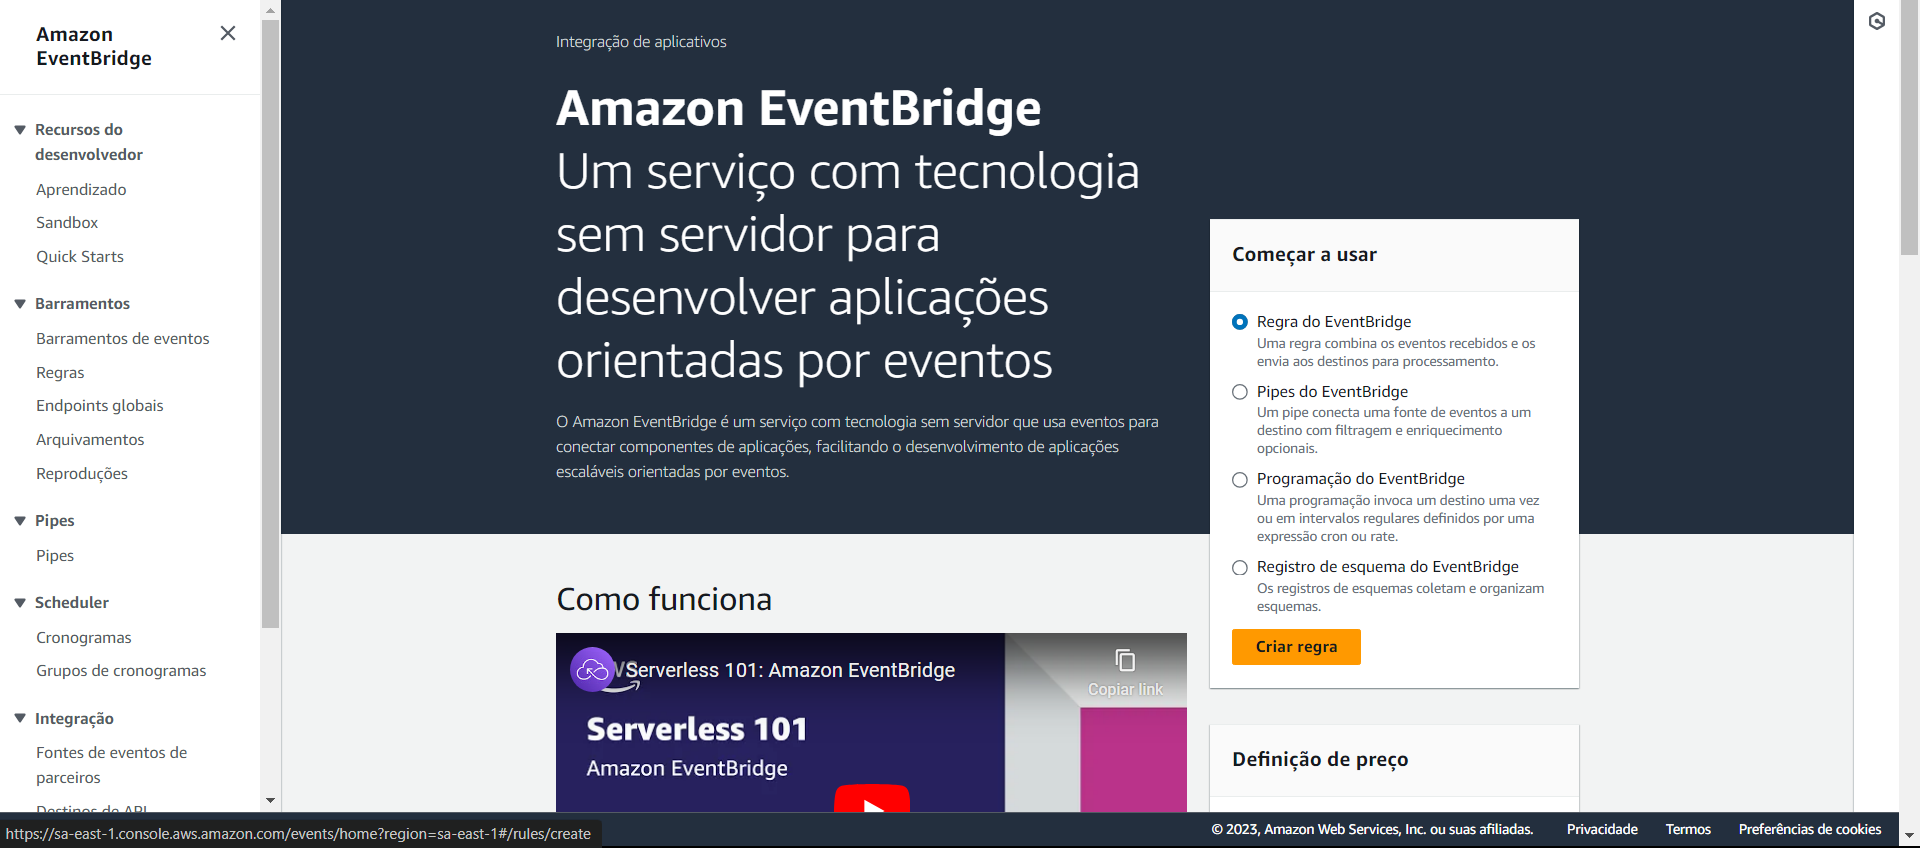

In [ ]:
display(Image(filename='imagem38.png'))

> Na página incial do event bridge clicamos em criar nova regra.

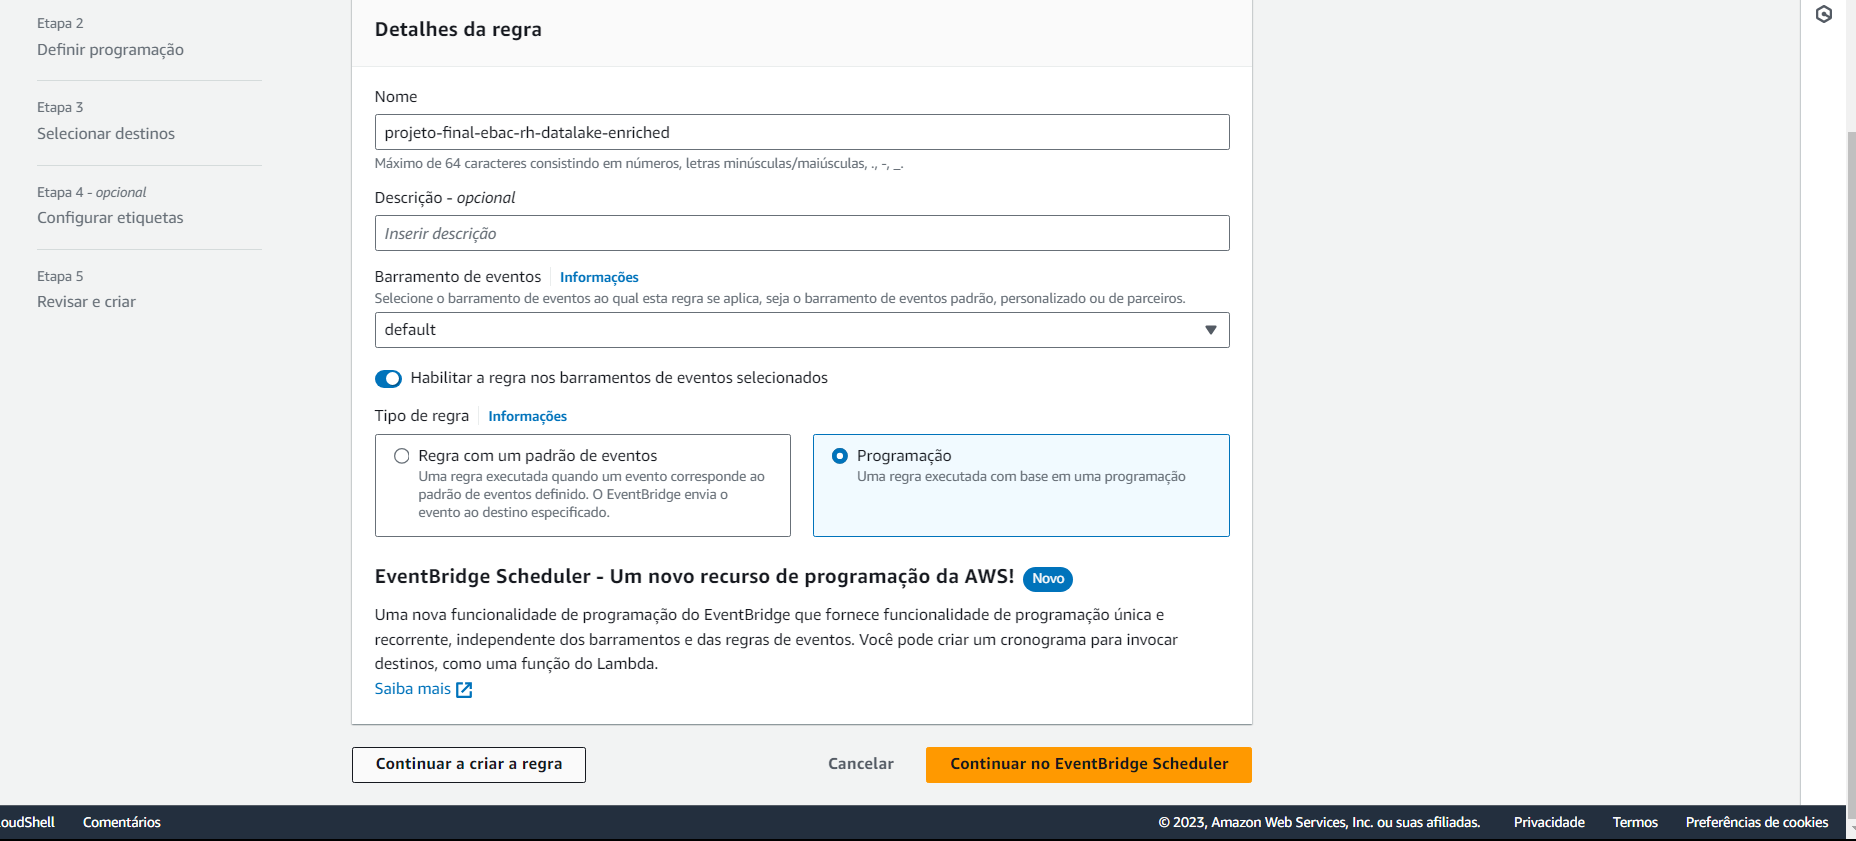

In [ ]:
display(Image(filename='imagem39.png'))

> Seguimos o mesmo nome como padrão e selecionamos o tipo da regra como programação.

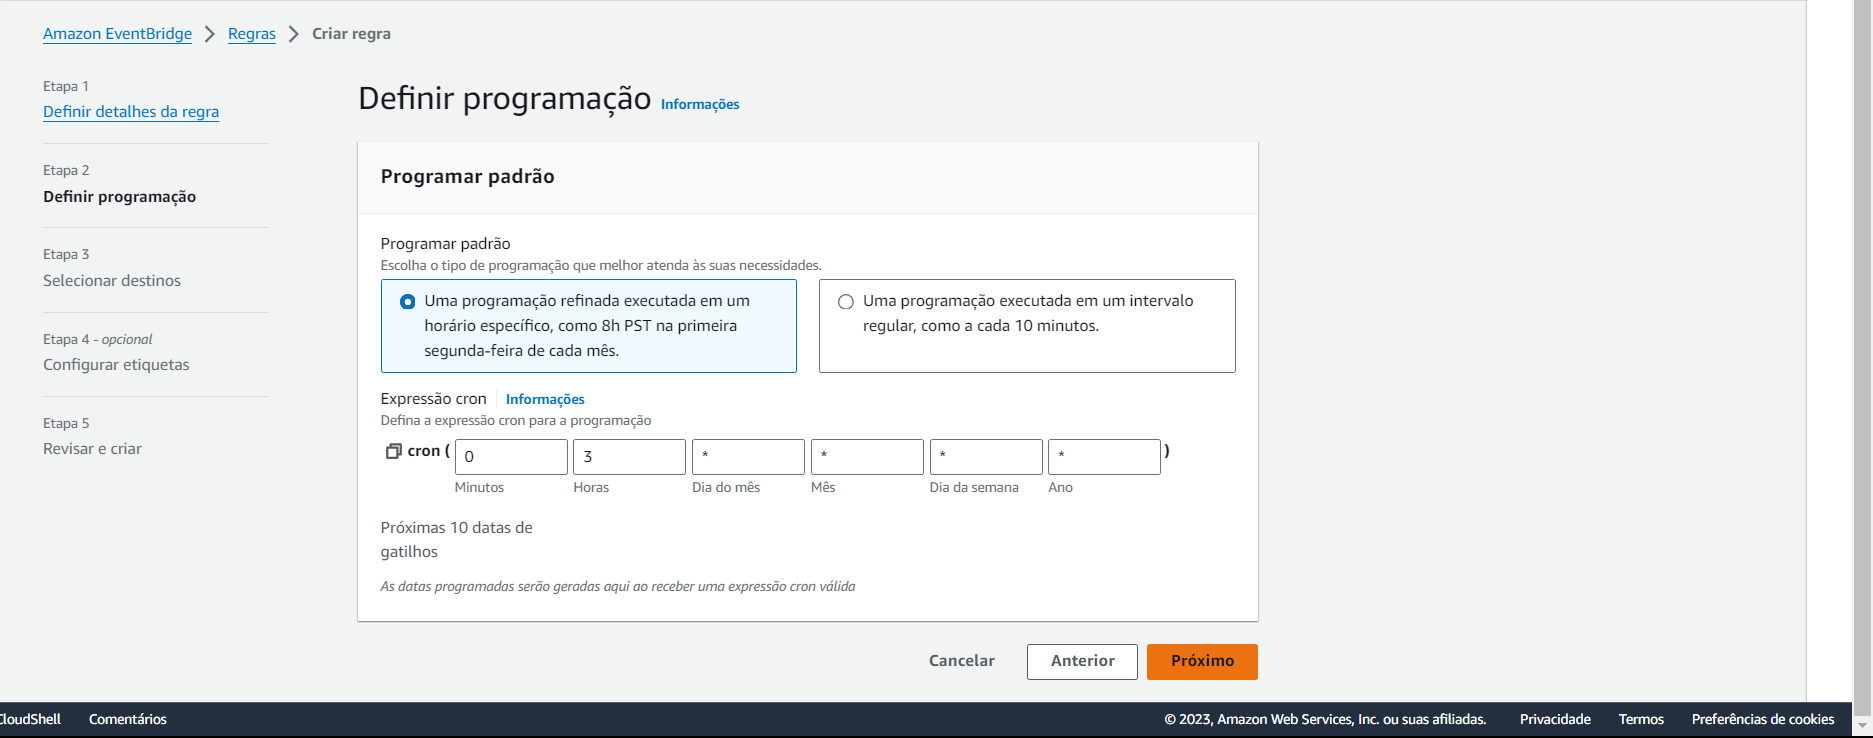

In [ ]:
display(Image(filename='imagem40.png'))

> Aqui estamos definindo uma expressão cronológica para a execução, ou seja, a cada dia a três da manhã o nosso código será executado e ele consumirá o dado do dia anterior, assim ficará disponível para o usuário antes dele acordar.

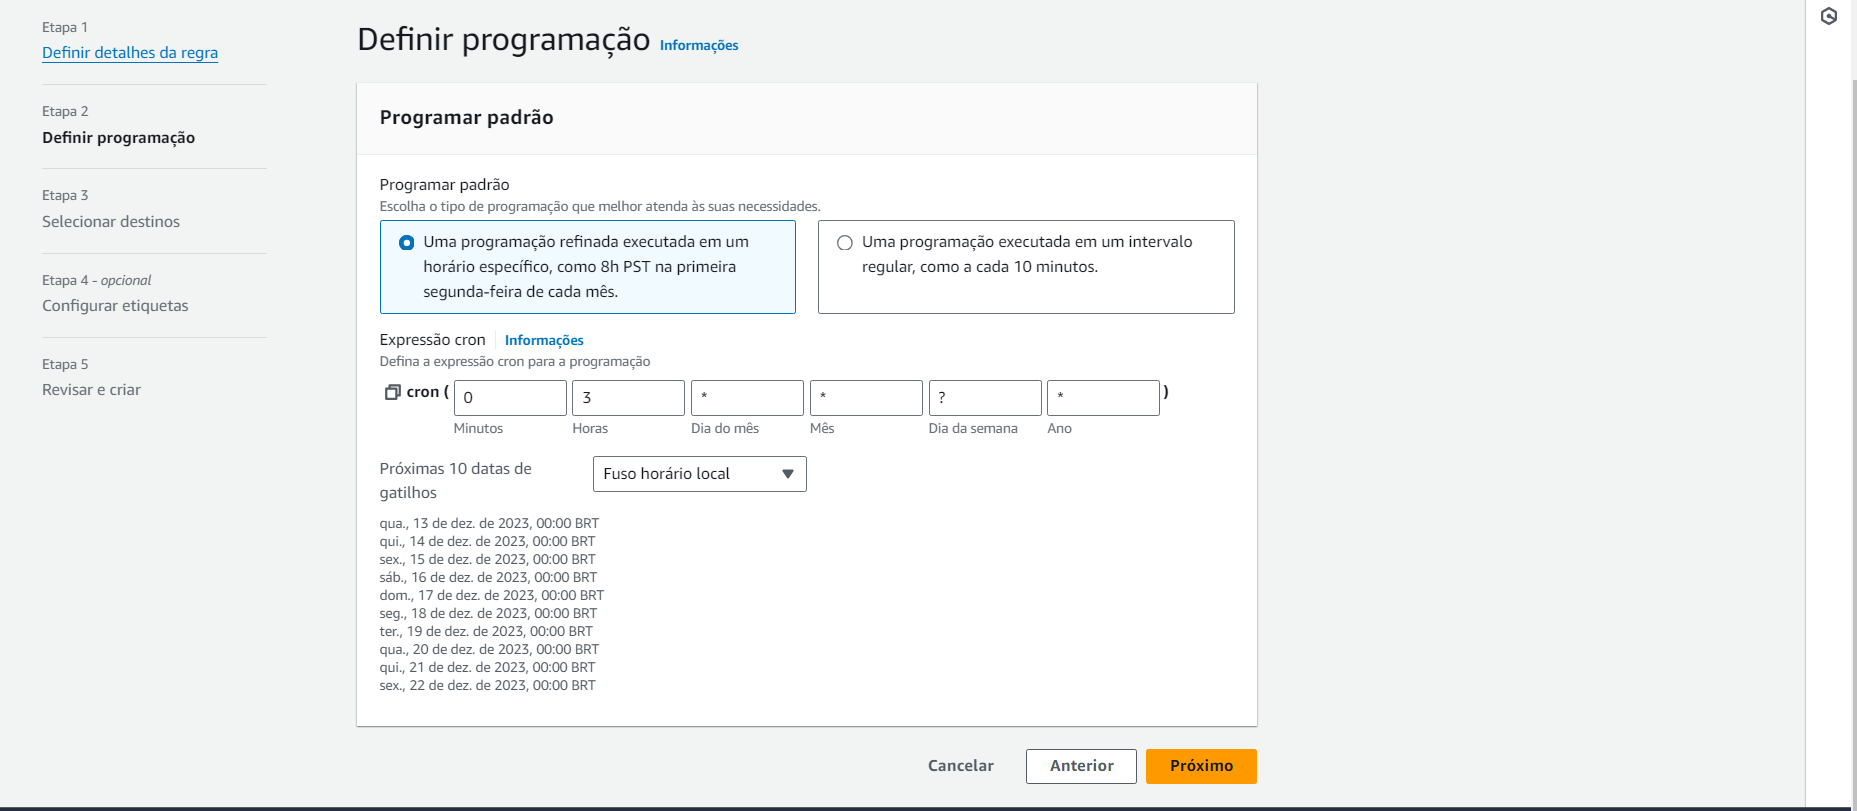

In [ ]:
display(Image(filename='imagem41.png'))

> Aqui temos as datas que ele será executado, todos os dias a meia-noite.

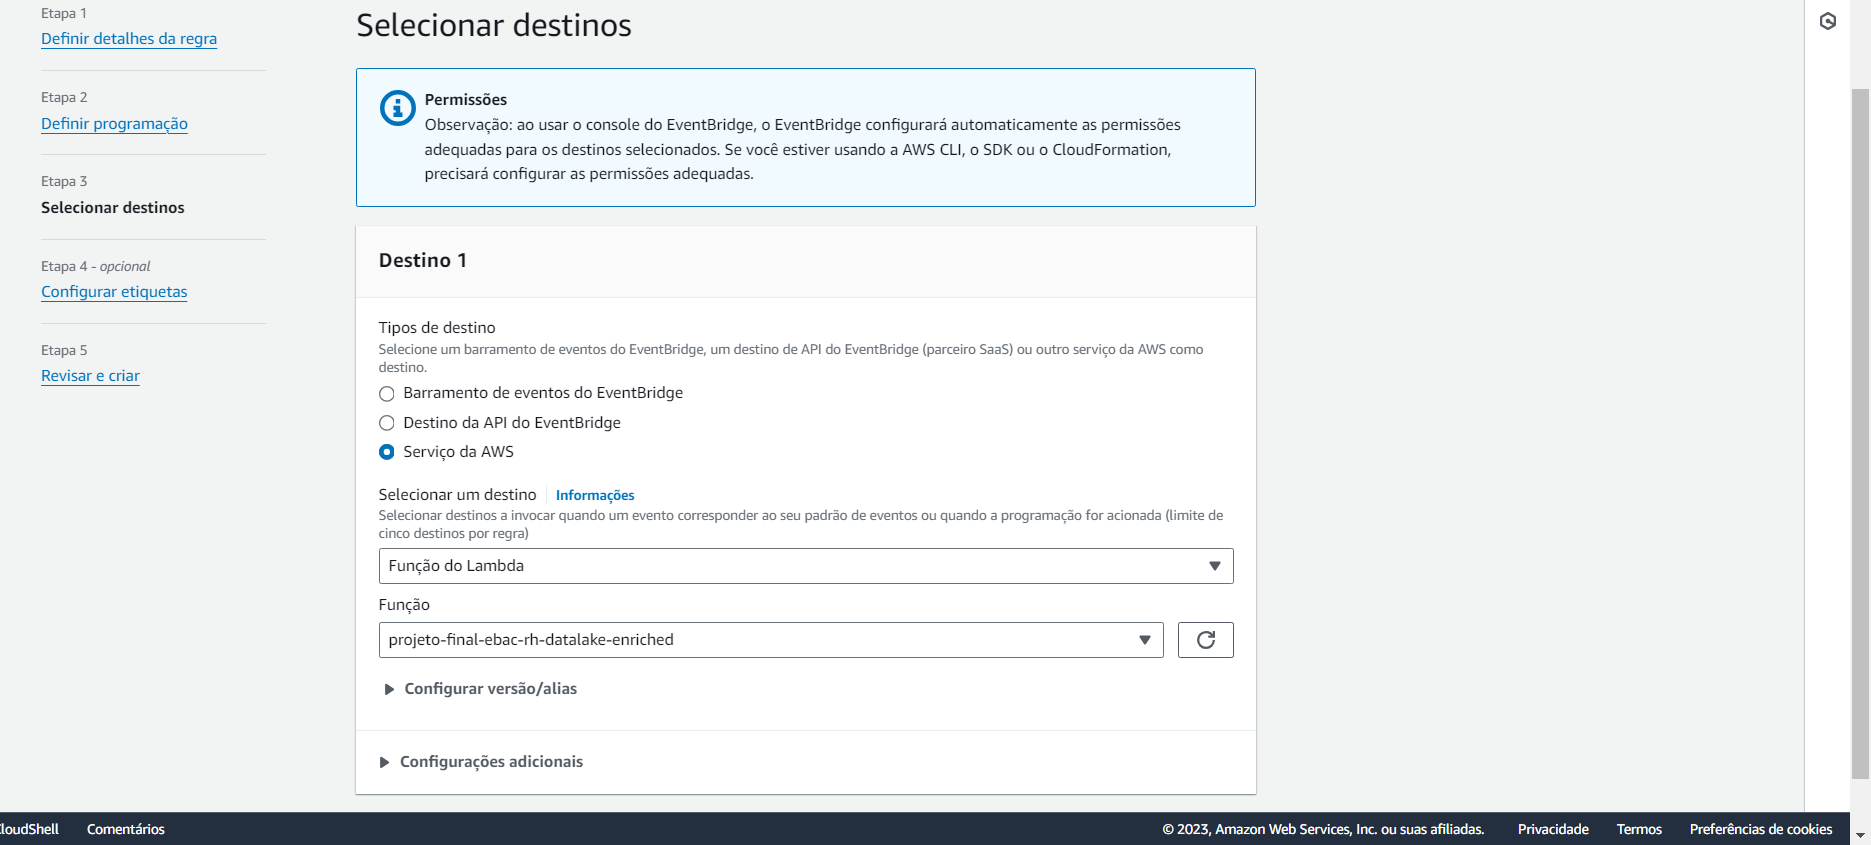

In [ ]:
display(Image(filename='imagem42.png'))

> Vamos agora nos conectar a um serviço da AWS, no caso a função lambda, nos referindo a função que acabamos de criar.

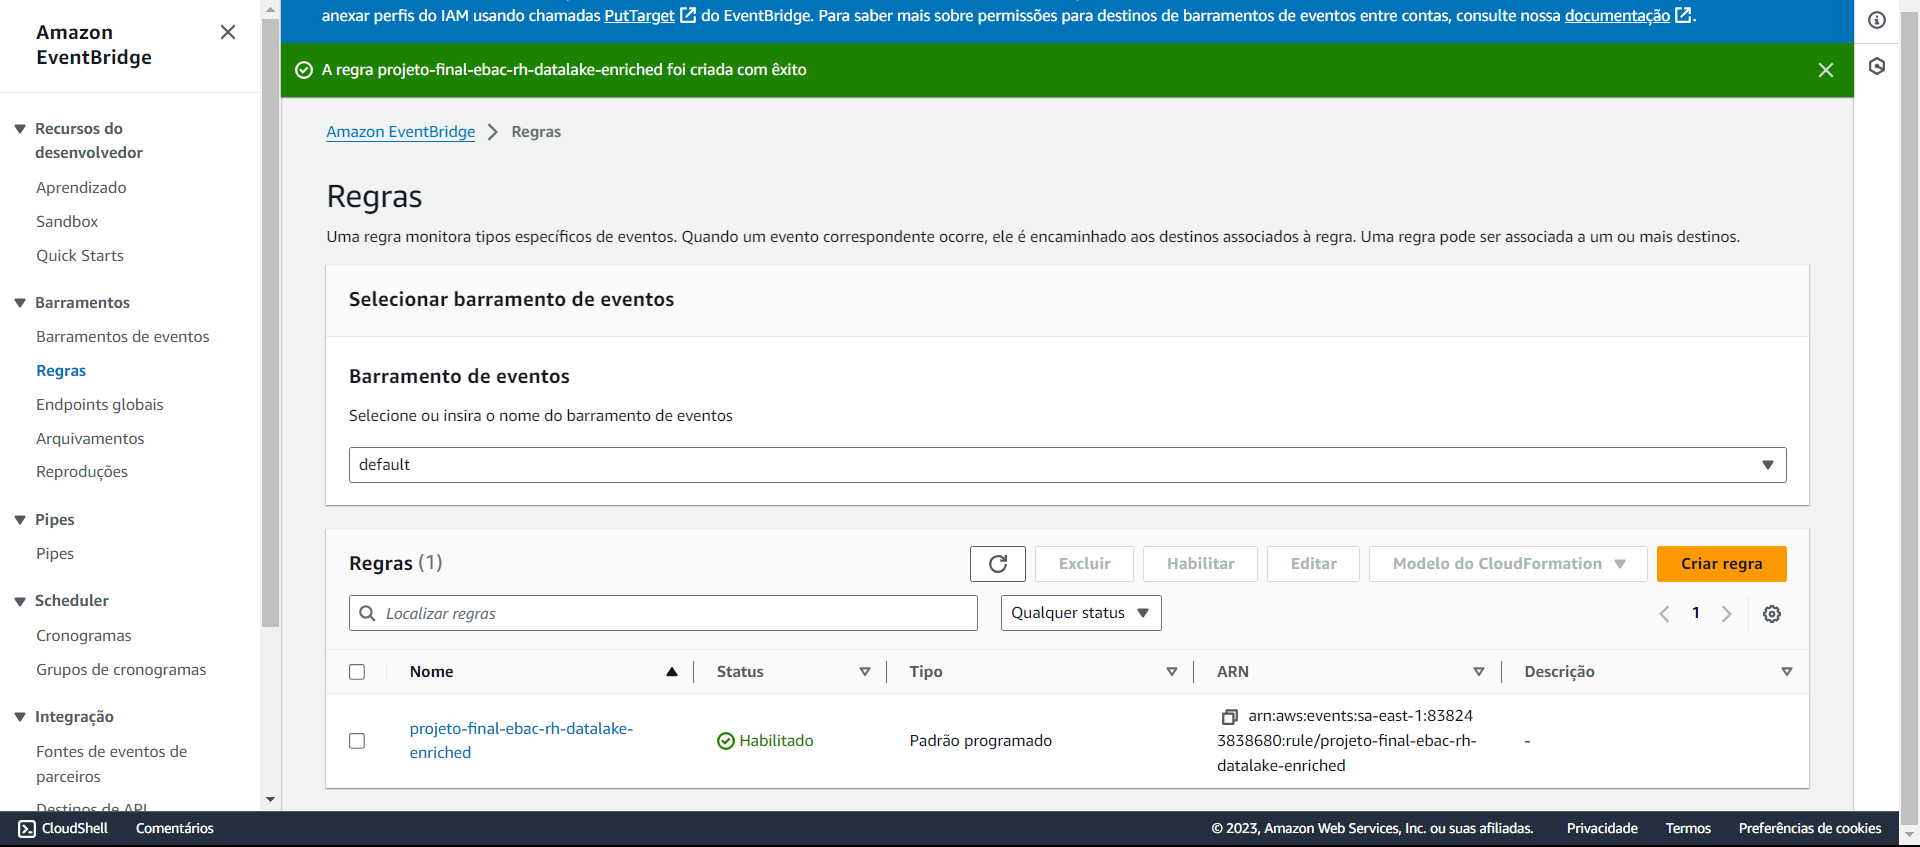

In [ ]:
display(Image(filename='imagem43.png'))

> Aqui visualizamos a regra criada. Então todo dia a meia-noite a função será executada e fará toda etapa de ETL que acabamos de criar.

## Apresentação

A etapa de apresentação de dados é responsável por disponibilizar os dados para os usuários e sistemas que os utilizarão. Essa etapa é a única que a maioria dos usuários terá acesso, portanto, é importante que ela seja fácil de usar e que entregue dados de qualidade. Os dados que são apresentados na etapa de apresentação devem ser armazenados em camadas refinadas. Isso significa que os dados devem estar limpos, padronizados e transformados de forma a atender às necessidades dos usuários. A apresentação de dados de qualidade é essencial para que os usuários possam obter insights e tomar decisões informadas.

### AWS Athena

Na etapa de **apresentação**, o `AWS Athena` tem função de entregar o dados através de uma interface SQL para os usuários do sistema analítico. Para criar a interface, basta criar uma tabela externa sobre o dado armazenado na camada mais refinada da arquitetura, a camada enriquecida.

```sql
CREATE EXTERNAL TABLE `telegram`(
  `message_id` bigint,
  `user_id` bigint,
  `user_is_bot` boolean,
  `user_first_name` string,
  `chat_id` bigint,
  `chat_type` string,
  `text` string,
  `date` bigint)
PARTITIONED BY (
  `context_date` date)
ROW FORMAT SERDE
  'org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe'
STORED AS INPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat'
OUTPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat'
LOCATION
  's3://projeto-final-ebac-rh-datalake-enriched/telegram/'
```

Vamos carregar nossas partições:

```sql
MSCK REPAIR TABLE `telegram`;

```

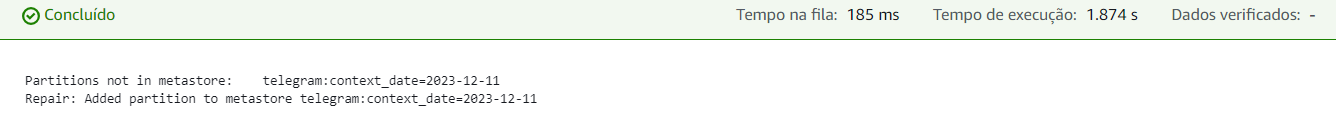

In [ ]:
display(Image(filename='imagem44.png'))

> Partições carregadas com sucesso.

* **Query-1**: Visualizar as 10 primeiras linhas.

```sql
SELECT * FROM "telegram" LIMIT 10;
```

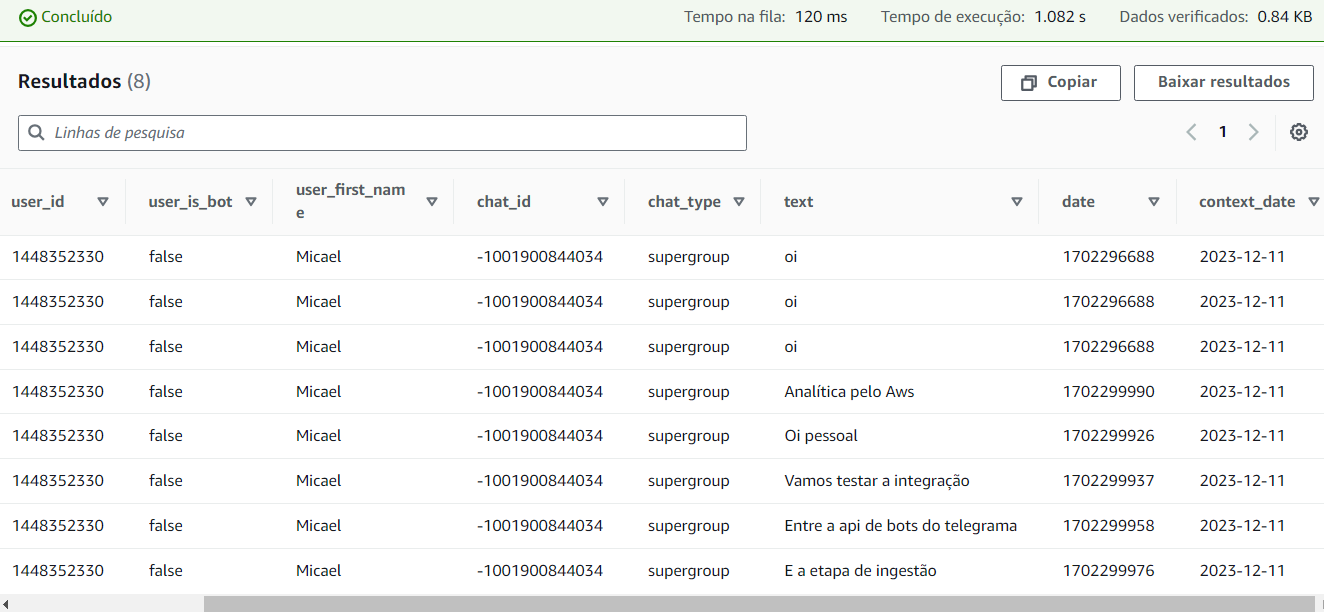

In [ ]:
display(Image(filename='imagem45.png'))

> Aqui visualizamos as dez primeiras linhas dos dados do bot, incluindo o nome do usuário, a mensagem enviada e a data de envio.

### Analytics

Com o dado disponível, usuário podem executar as mais variadas consultas analíticas. Seguem alguns exemplos:



*  **Query_2**: Quantidade de mensagens por dia.



```sql
SELECT
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY context_date
ORDER BY context_date DESC
```

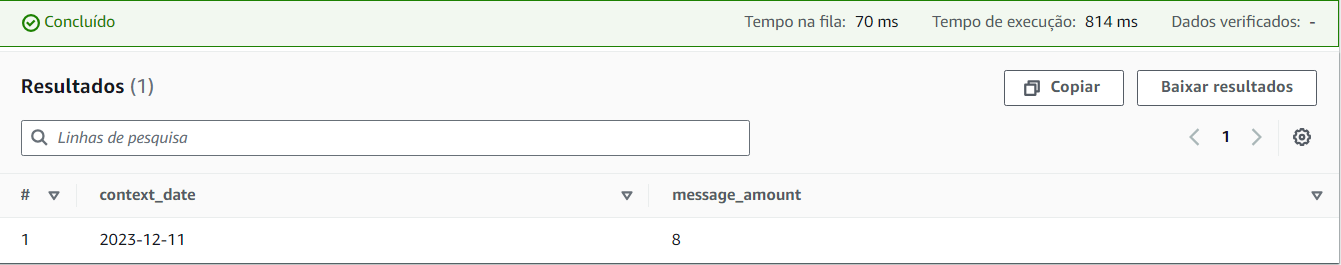

In [ ]:
display(Image(filename='imagem46.png'))

> Aqui temos a contagem de mensagens enviadas de acordo com o dia.

* **Query_3**: Quantidade de mensagens por usuário e por dia.

```sql
  SELECT
  user_id,
  user_first_name,
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC
```

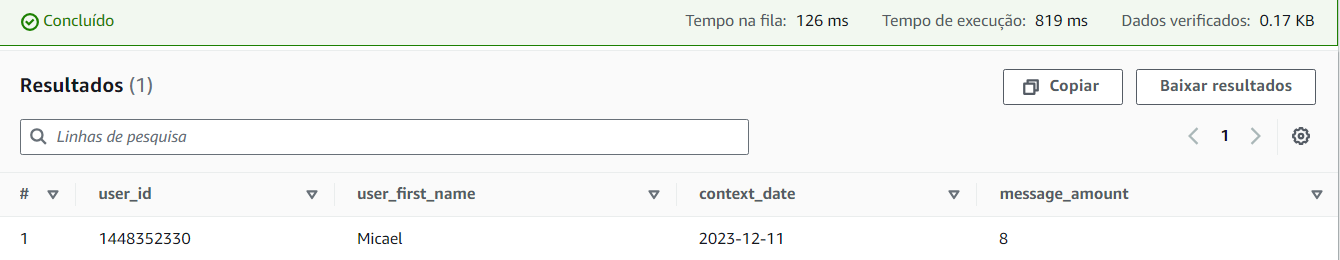

In [ ]:
display(Image(filename='imagem47.png'))

> Agora temos a contagem de mensagens de acordo com o id do usuário, o primeior nome do usuário e a data.

* **Query_4**: Média do tamanho das mensagens por usuário e por dia.

```sql
SELECT
  user_id,
  user_first_name,
  context_date,
  CAST(AVG(length(text)) AS INT) AS "average_message_length"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC
```

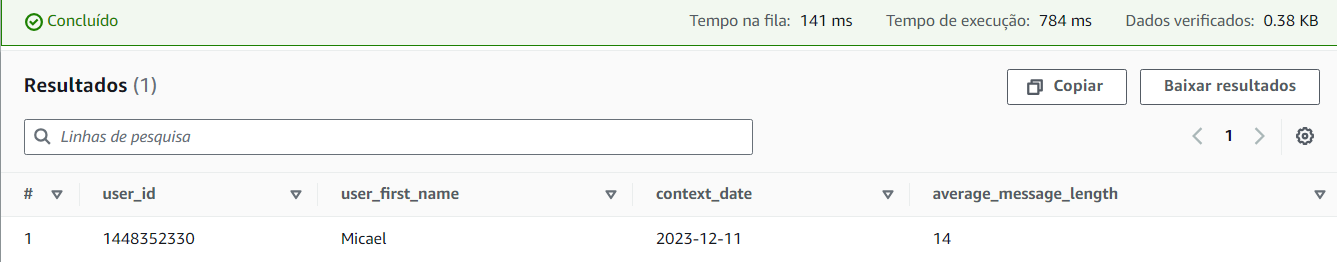

In [ ]:
display(Image(filename='imagem48.png'))

> Aqui temos a média do comprimento das mensagens de acordo com o usuário e a data de envio.

* **Query_5**: Quantidade de mensagens por hora, por dia da semana e por número da semana.

```sql
WITH
parsed_date_cte AS (
    SELECT
        *,
        CAST(date_format(from_unixtime("date"),'%Y-%m-%d %H:%i:%s') AS timestamp) AS parsed_date
    FROM "telegram"
),
hour_week_cte AS (
    SELECT
        *,
        EXTRACT(hour FROM parsed_date) AS parsed_date_hour,
        EXTRACT(dow FROM parsed_date) AS parsed_date_weekday,
        EXTRACT(week FROM parsed_date) AS parsed_date_weeknum
    FROM parsed_date_cte
)
SELECT
    parsed_date_hour,
    parsed_date_weekday,
    parsed_date_weeknum,
    count(1) AS "message_amount"
FROM hour_week_cte
GROUP BY
    parsed_date_hour,
    parsed_date_weekday,
    parsed_date_weeknum
ORDER BY
    parsed_date_weeknum,
    parsed_date_weekday
```

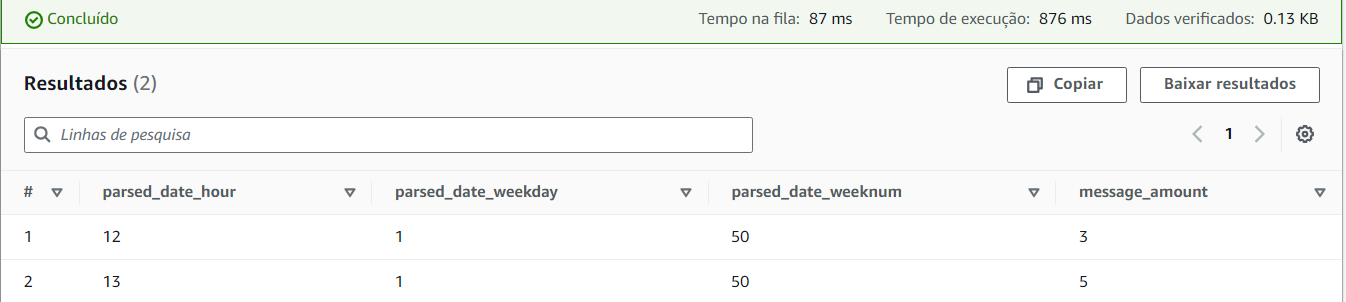

In [ ]:
display(Image(filename='imagem49.png'))

> Aqui temos a quantidade de mensagens enviadas para o bot do telegram por hora, dia da semana e semana do ano. Ele organiza os resultados de forma que seja fácil identificar padrões e tendências nas mensagens enviadas.

## Orientação a Coluna: RH


Orientação a coluna é um modelo de armazenamento de dados em que os dados são organizados em colunas, ao invés de linhas. Isso significa que os dados de uma mesma coluna são armazenados juntos, independentemente da linha em que estão presentes. Há uma melhora no desempenho de consultas com agregações, porque os dados da coluna a ser agregada estão todos armazenados juntos, o que permite que o sistema processe a consulta sem precisar acessar cada linha do conjunto de dados. E também usam menos memória do que sistemas orientados a linha, pois não precisam armazenar dados duplicados.  Os dados organizados em colunas são mais fáceis de comprimir do que os dados organizados em linhas, pois os de uma mesma coluna, geralmente têm valores semelhantes, o que permite que o sistema de compressão use técnicas mais eficientes.

### Apache parquet

O `Apache Parquet` é o formato de arquivo **orientado a coluna** mais utilizado no ecossistema de *big data* ([documentação](https://parquet.apache.org/)). Entre suas funcionalidades, podemos destacar:

  - indexação por coluna (processamento);
  - tipagem por coluna (processamento e armazenamento);
  - compressão por coluna (armazenamento).

Vamos criar a coluna `reference_date` a partir da coluna `DateofHire'` no formato YYYY-MM-DD e entender se ela será uma boa coluna de partição.

In [ ]:
HR['reference_date'] = HR['DateofHire'] = pd.to_datetime(HR['DateofHire'], format='%Y-%m-%d')

In [ ]:
HR = HR.dropna(subset=['DateofHire'])

Vamos filtrar apenas as colunas de interesse:

In [ ]:
HR.drop(['DOB','DateofTermination','LastPerformanceReview_Date'], axis=1, inplace=True)

In [ ]:
HR.head()

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  \
0            1       5            4                       0   62506      0   
1            5       3            3                       0  104437      1   
2            5       5            3                       0   64955      1   
3            1       5            3                       0   64991      0   
4            5       5            3                       0   50825      1   

   PositionID                  Position State   Zip Sex MaritalDesc  \
0          19   Production Technician I    MA  1960  M       Single   
1          27                   Sr. DBA    MA  2148  M      Married   
2          20  Production Technician II    MA  1810   F     Married   
3          19   Production Technician I    MA  1886   F     Married   
4          19   Production Technician I    MA  2169   F    Divorced   

  CitizenDesc HispanicLatino RaceDesc DateofHire         TermReason  \
0  US Citizen             No    White 2011-07-05  N/A-StillEmployed   
1  US Citizen             No    White 2015-03-30      career change   
2  US Citizen             No    White 2011-07-05              hours   
3  US Citizen             No    White 2008-01-07  N/A-StillEmployed   
4  US Citizen             No    White 2011-07-11   return to school   

         EmploymentStatus         Department     ManagerName  ManagerID  \
0                  Active  Production         Michael Albert       22.0   
1  Voluntarily Terminated              IT/IS      Simon Roup        4.0   
2  Voluntarily Terminated  Production         Kissy Sullivan       20.0   
3                  Active  Production           Elijiah Gray       16.0   
4  Voluntarily Terminated  Production         Webster Butler       39.0   

  RecruitmentSource PerformanceScore  EngagementSurvey  EmpSatisfaction  \
0          LinkedIn          Exceeds              4.60                5   
1            Indeed      Fully Meets              4.96                3   
2          LinkedIn      Fully Meets              3.02                3   
3            Indeed      Fully Meets              4.84                5   
4     Google Search      Fully Meets              5.00                4   

   SpecialProjectsCount  DaysLateLast30  Absences reference_date  
0                     0               0         1     2011-07-05  
1                     6               0        17     2015-03-30  
2                     0               0         3     2011-07-05  
3                     0               0        15     2008-01-07  
4                     0               0         2     2011-07-11

  Vamos definir o filename referente ao nosso dataset:

In [ ]:
filename = './HR'

 - Salvar um `Pandas` DataFrame para um arquivo `csv`:

In [ ]:
HR.to_csv('./HR.csv',sep=',', index=False)

- Salvar um `Pandas` DataFrame para um arquivo `Apache Parquet`:

In [ ]:
HR.to_parquet('./HR.parquet', engine='pyarrow')

 - Salvar um `Pandas` DataFrame para um arquivo `Apache Parquet` comprimido:

In [ ]:
HR.to_parquet('./HR.parquet.gzip', engine='pyarrow', compression='gzip')

Vamos utilizar o método `getsize` do pacote nativo `os` para estimar o tamanho dos arquivos na memória persistente (ROM/SSD):

In [ ]:
import os

extensions = ['csv', 'parquet', 'parquet.gzip']

for extension in extensions:

  size = os.path.getsize(f'{filename}.{extension}')
  size_mb = round(size / 1024 / 1024, 2)

  print(f'{extension}: {size_mb} MB')

csv: 0.07 MB
parquet: 0.04 MB
parquet.gzip: 0.04 MB


### Aparche Arrow

O `Apache Arrow` é uma estrutura de dados **orientado a coluna** muito utilizada no ecossistema de *big data* ([documentação](https://arrow.apache.org/)). É equivalente ao `Apache Parquet`, mas em memória, como listas, dicionários e objetos Python. O pacote Python `PyArrow` ([documentação](https://arrow.apache.org/docs/python/install.html)) permite a criação e manipulação das estruturas de dados do `Apache Arrow`.

In [ ]:
from pyarrow import csv
import pyarrow as pa
import pandas as pd

filename = './HR'

table = csv.read_csv(f'{filename}.csv')
df = pd.read_csv(f'./{filename}.csv')

O `PyArrow` trabalha com uma estrutura de dados orientada a coluna conhecida como `table` (tabela), similar aos DataFrames `Pandas`.

In [ ]:
table.shape

(311, 34)

In [ ]:
table

pyarrow.Table
Employee_Name: string
EmpID: int64
MarriedID: int64
MaritalStatusID: int64
GenderID: int64
EmpStatusID: int64
DeptID: int64
PerfScoreID: int64
FromDiversityJobFairID: int64
Salary: int64
Termd: int64
PositionID: int64
Position: string
State: string
Zip: int64
Sex: string
MaritalDesc: string
CitizenDesc: string
HispanicLatino: string
RaceDesc: string
DateofHire: date32[day]
TermReason: string
EmploymentStatus: string
Department: string
ManagerName: string
ManagerID: double
RecruitmentSource: string
PerformanceScore: string
EngagementSurvey: double
EmpSatisfaction: int64
SpecialProjectsCount: int64
DaysLateLast30: int64
Absences: int64
reference_date: date32[day]
----
Employee_Name: [["Adinolfi, Wilson  K","Ait Sidi, Karthikeyan   ","Akinkuolie, Sarah","Alagbe,Trina","Anderson, Carol ",...,"Woodson, Jason","Ybarra, Catherine ","Zamora, Jennifer","Zhou, Julia","Zima, Colleen"]]
EmpID: [[10026,10084,10196,10088,10069,...,10135,10301,10010,10043,10271]]
MarriedID: [[0,1,1,1,0,

Agora vamos realizar operações de agregação para comparar a similaridade do pandas com o PyArrow.



*   **Pandas**



In [ ]:
agg_df = df['State'].value_counts()

In [ ]:
agg_df

MA    276
CT      6
TX      3
VT      2
UT      1
AZ      1
ND      1
OR      1
MT      1
NV      1
ID      1
KY      1
NC      1
FL      1
GA      1
CO      1
NY      1
PA      1
RI      1
NH      1
TN      1
IN      1
OH      1
CA      1
WA      1
AL      1
VA      1
ME      1
Name: State, dtype: int64



*   **PyArrow**



In [ ]:
agg_table = table.group_by('State').aggregate([('State', 'count')])

In [ ]:
agg_table

pyarrow.Table
State_count: int64
State: string
----
State_count: [[276,3,6,1,2,...,1,1,1,1,1]]
State: [["MA","TX","CT","VA","VT",...,"MT","OR","ND","AZ","ME"]]

Vamos utilizar o método `getsizeof` do pacote nativo `sys` para estimar o tamanho dos objetos na memória de trabalho (RAM):

In [ ]:
import sys

objects = [{'pandas': df}, {'pyarrow': table}]

for obj_dict in objects:
  for id, obj in obj_dict.items():

    size = sys.getsizeof(obj)
    size_mb = round(size / 1024 / 1024, 2)

    print(f'{id}: {size_mb} MB')

pandas: 0.36 MB
pyarrow: 0.1 MB


Vemos que o objeto gerado pelo `PyArrow` (`table`) é bem  menor que o objeto (`dataframe`) utilizado `Pandas`.

### Particionamento

Vamos obsevar os benefícios que o **particionamento** trás para o armazenamento de grandes volumes de dados

Uma coluna que separa os dados em grupos bem distribuidos é uma boa candidata a uma coluna de partição. Vamos contar as ocorrências de funcionários (logo, linhas) em cada um dos dias da coluna `reference_date` criada anteriormente.

In [ ]:
agg_df = pd.DataFrame(df['reference_date'].value_counts()).sort_index().reset_index()
agg_df = agg_df.rename(columns={'reference_date': 'amount'})
agg_df = agg_df.rename(columns={'index': 'reference_date'})

In [ ]:
agg_df.head()

reference_date  amount
0     2006-01-09       1
1     2007-06-25       1
2     2007-11-05       1
3     2008-01-07       1
4     2008-09-02       1

In [ ]:
agg_df.tail()

reference_date  amount
96      2017-01-07       1
97      2017-02-10       1
98      2017-02-15       2
99      2017-04-20       2
100     2018-07-09       1

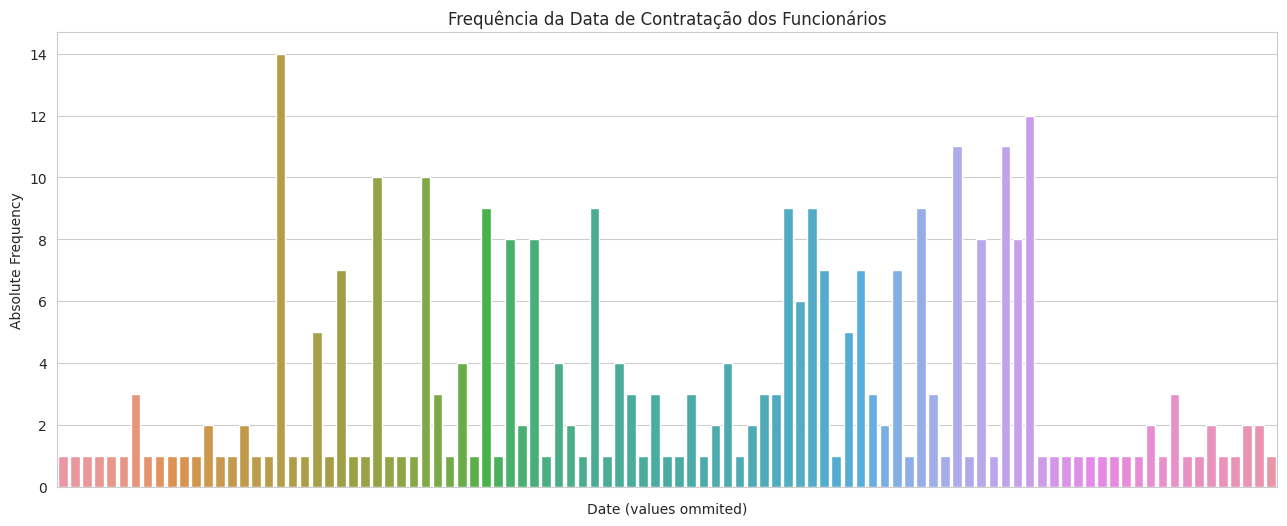

In [ ]:
import seaborn as sns

with sns.axes_style('whitegrid'):

  chart = sns.barplot(x='reference_date', y='amount', data=agg_df)
  chart.set(xticklabels=[])
  chart.set(title='Frequência da Data de Contratação dos Funcionários', xlabel='Date (values ommited)', ylabel='Absolute Frequency');
  chart.figure.set_size_inches(w=40/2.54, h=15/2.54)

Observa-se que a coluna `reference_date` de fato não divide os dados em grupos equilibrados, o que pode causar problemas na criação das partições, o que acabou ocorrendo nesse projeto. Sendo assim, vamos salvar o `DataFrame` Pandas em arquivos comprimidos no formato `Parquet`, particionados pela coluna `reference_date`.

In [ ]:
df.to_parquet('./HR', engine='pyarrow', compression='gzip', partition_cols='reference_date')

Vamos também salver o `DataFrame` Pandas no formato `CSV` para garantir que os arquivos de ambas as abordagens possuem a coluna `reference_date`.

In [ ]:
df.to_csv('./HR_enriched.csv', sep=',', index=False)

## Conclusão

Vimos como a automação de um bot no Telegram pode ser utilizada para tarefas de análise de dados com o uso de funções Python realizada sobre o dataset de Recursos Humanos. Trabalhamos em etapas como ingestão dos dado, que seria processo de coleta de dados e transferência de dados brutos para um sistema de armazenamento central, contribuindo para a disponibilidade dos dados para processamento e análise, além de garantirmos a qualidade e integridade dos dados. Tivemos a etapa de ETL, que envolveu a extração e transformação de dados para atender as necessidades do usuário final. E também a etapa de apresentação A apresentação, responsável por fornecer aos usuários as informações de que precisam para tomar decisões informadas mediante consultas que podem ser realizadas por analistas e cientistas, por exemplo. E por fim, trazemos alguns conceitos de big data, como orientação a coluna, em que utilizamos o dataset de RH para reduzir o uso da memória, facilidade de compreensão de dados, melhora no desempenho e velocidade.

## Referências

* https://ebaconline.com.br/
* https://youtu.be/_RQw5Nw7Op0?si=VuYOn8Xp9gRkMWho